___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, XGBoost,and Neural Network*** algorithms and ***Unbalanced Data Techniques*** . Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***other libraries*** in a variety of ways. Also, you will calibrate your model outputs.

Data drift and model drirft are key consepts about ML and MLOPS, you can monitor and check your data and models with plenty of ways and tools. ***Deepchecks*** is one of them and the leading tool for testing and for validating your machine learning models and data, and it enables doing so with minimal effort. In this project, you will apply ***Data Integrity, Train-Test Validation, and Model Evaluation*** checks.
Deepchecks Introduction : https://youtu.be/7ELdizoi6BU

After the ML Deployment Course, you will able to deploy your model by ***Streamlit API***.

Before diving into the project, please take a look at the Determines and Tasks.

---
---


# #Determines
The dataset was collected from credit card transactions made by European cardholders in 2023, with sensitive information removed to ensure privacy and compliance with ethical guidelines. It has **550,000** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for small amount of all transactions.

**Feature Information:**

- **id:** Unique identifier for each transaction
- **V1-V28:** Anonymized features representing various transaction attributes (e.g., time, location, etc.)
- **Amount:** The transaction amount
- **Class:** Binary label indicating whether the transaction is fraudulent (1) or not (0)

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can display the distribution of the target variable's classes over other variables.
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with.

Start with Logistic Regression and evaluate model performance. You will apply the Unbalanced Data Techniques used to increase the performance. Next, observe their effects.

Then, you will use four different algorithms in the model building phase.

In the final step, you will prapare your model for deployment.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Apply data integrity checks
- Exploratory Data Analysis
- Data Cleaning
    
#### 2. Data Preprocessing

- Train - Test Split
- Train - Test Split Validation Checks
- Scaling

#### 3. Model Building

- Logistic Regression
- Random Forest Classifier
- XGBoost Classifier
- Neural Network

#### 4. Model Deployement

- Save and Export the Best Model
- Save and Export Variables




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (7,4)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [2]:
df0 = pd.read_csv("creditcard.csv")
df = df0.copy()

In [3]:
df.shape

(284807, 31)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    284807 non-null  float64
 1   v1      284807 non-null  float64
 2   v2      284807 non-null  float64
 3   v3      284807 non-null  float64
 4   v4      284807 non-null  float64
 5   v5      284807 non-null  float64
 6   v6      284807 non-null  float64
 7   v7      284807 non-null  float64
 8   v8      284807 non-null  float64
 9   v9      284807 non-null  float64
 10  v10     284807 non-null  float64
 11  v11     284807 non-null  float64
 12  v12     284807 non-null  float64
 13  v13     284807 non-null  float64
 14  v14     284807 non-null  float64
 15  v15     284807 non-null  float64
 16  v16     284807 non-null  float64
 17  v17     284807 non-null  float64
 18  v18     284807 non-null  float64
 19  v19     284807 non-null  float64
 20  v20     284807 non-null  float64
 21  v21     28

In [7]:
df.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount', 'class'], dtype='object')

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
v1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
v2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
v3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
v4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
v5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
v6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
v7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
v8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
v9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [9]:
df.duplicated().sum()

1081

In [10]:
df[df.duplicated()]

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,0.872490,0.851636,-0.571745,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,0.005356,-0.541998,0.745036,-0.375165,-0.068227,-0.795939,-0.497901,-0.134224,-1.004958,0.086074,-0.207620,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,-0.828015,-1.192581,0.944989,1.372532,-0.036493,-0.208747,0.320086,-0.204910,-0.024821,-0.468859,0.031950,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,-0.830603,-1.191774,0.942870,1.372621,-0.037988,-0.208490,0.321883,-0.205951,-0.025225,-0.468427,0.023667,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,-1.449823,-0.508930,0.600035,-0.627313,1.017499,-0.887384,0.420096,1.856497,1.315099,1.096112,-0.821707,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    283726 non-null  float64
 1   v1      283726 non-null  float64
 2   v2      283726 non-null  float64
 3   v3      283726 non-null  float64
 4   v4      283726 non-null  float64
 5   v5      283726 non-null  float64
 6   v6      283726 non-null  float64
 7   v7      283726 non-null  float64
 8   v8      283726 non-null  float64
 9   v9      283726 non-null  float64
 10  v10     283726 non-null  float64
 11  v11     283726 non-null  float64
 12  v12     283726 non-null  float64
 13  v13     283726 non-null  float64
 14  v14     283726 non-null  float64
 15  v15     283726 non-null  float64
 16  v16     283726 non-null  float64
 17  v17     283726 non-null  float64
 18  v18     283726 non-null  float64
 19  v19     283726 non-null  float64
 20  v20     283726 non-null  float64
 21  v21     283726 

In [14]:
# Rename a single column
df = df.rename(columns={'class': 'fraud'})

In [15]:
df.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount', 'fraud'], dtype='object')

In [16]:
df.fraud.value_counts()

fraud
0    283253
1       473
Name: count, dtype: int64

## Apply Data Integrity Checks
* link: https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_data_integrity.html

In [17]:
from deepchecks.tabular import Dataset

ds = Dataset(df, cat_features=[df.columns[0]], label='fraud')

In [18]:
from deepchecks.tabular.suites import data_integrity

# Run Suite:
integ_suite = data_integrity()
suite_result = integ_suite.run(ds)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_R8FHWHNQYNH6TTZRX72MJOKSV">Data Integrity Sui…

### Exploratory Data Analysis

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    283726 non-null  float64
 1   v1      283726 non-null  float64
 2   v2      283726 non-null  float64
 3   v3      283726 non-null  float64
 4   v4      283726 non-null  float64
 5   v5      283726 non-null  float64
 6   v6      283726 non-null  float64
 7   v7      283726 non-null  float64
 8   v8      283726 non-null  float64
 9   v9      283726 non-null  float64
 10  v10     283726 non-null  float64
 11  v11     283726 non-null  float64
 12  v12     283726 non-null  float64
 13  v13     283726 non-null  float64
 14  v14     283726 non-null  float64
 15  v15     283726 non-null  float64
 16  v16     283726 non-null  float64
 17  v17     283726 non-null  float64
 18  v18     283726 non-null  float64
 19  v19     283726 non-null  float64
 20  v20     283726 non-null  float64
 21  v21     283726 

### Data Cleaning
Check Missing Values and Outliers

Feature Information:

- id: Unique identifier for each transaction
- V1-V28: Anonymized features representing various transaction attributes (e.g., time, location, etc.)
- amount: The transaction amount
- fraud: Binary label indicating whether the transaction is fraudulent (1) or not (0)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    283726 non-null  float64
 1   v1      283726 non-null  float64
 2   v2      283726 non-null  float64
 3   v3      283726 non-null  float64
 4   v4      283726 non-null  float64
 5   v5      283726 non-null  float64
 6   v6      283726 non-null  float64
 7   v7      283726 non-null  float64
 8   v8      283726 non-null  float64
 9   v9      283726 non-null  float64
 10  v10     283726 non-null  float64
 11  v11     283726 non-null  float64
 12  v12     283726 non-null  float64
 13  v13     283726 non-null  float64
 14  v14     283726 non-null  float64
 15  v15     283726 non-null  float64
 16  v16     283726 non-null  float64
 17  v17     283726 non-null  float64
 18  v18     283726 non-null  float64
 19  v19     283726 non-null  float64
 20  v20     283726 non-null  float64
 21  v21     283726 

In [21]:
# No missing value
df.isna().sum().sum()

0

In [22]:
# Data handling strategies

#1. Class weight
#2. Imbalance
#3. Remove outliers

---
---


## 2. Cluster Analysis
- Try to find hidden patterns in data with the help of unsupervised learning algorithms.

In [23]:
df1 = df.copy()

In [24]:
X=df1.drop(["fraud"], axis=1)
y=df1["fraud"]

### K mean

In [25]:
from sklearn.cluster import KMeans

In [26]:
K_means_model = KMeans(n_clusters=5,
                random_state=42)

In [27]:
K_means_model.fit(X)

KMeans(n_clusters=5, random_state=42)

In [28]:
# function to compute hopkins's statistic for the dataframe X
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform


def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    # a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    # a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    # initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    # u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    # w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    # distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    # compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [29]:
hopkins(X, 0.05)

0.9981069672876394

In [30]:
ssd = []

K = range(2,31)

for k in K:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

# Note that we start range from 2, if we start from 1, we will always see 2 as optimal k from elbow.
#
# Inertia is the sum of the distances of the observations in the clusters from their centroids.
# Note that inertia focuses only intra cluster distance.
# The smaller the inertia, the better the clusters surrounded their centroids.

Text(0.5, 1.0, 'elbow method')

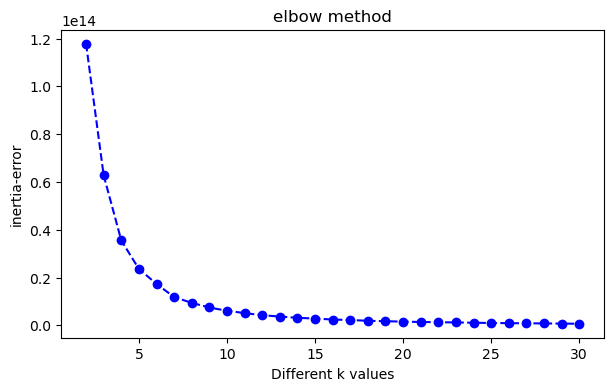

In [31]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

# Try 20 - 30 K value

In [32]:
K = range(2, 31)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(X)

    # distances from each observation to each cluster centroid
    distances = kmeanModel.transform(X)
    labels = kmeanModel.labels_
    result = []
    for i in range(k):

        # distances from observations in each cluster to their own centroid
        cluster_distances = distances[labels == i, i]

        # calculate the mean of squared distances from observations in each
        # cluster to their own centroid and add it to the result list
        result.append(np.mean(cluster_distances ** 2))

    # sum the means of all clusters and add it to the distortion list
    distortion.append(sum(result))

Text(0.5, 1.0, 'elbow method')

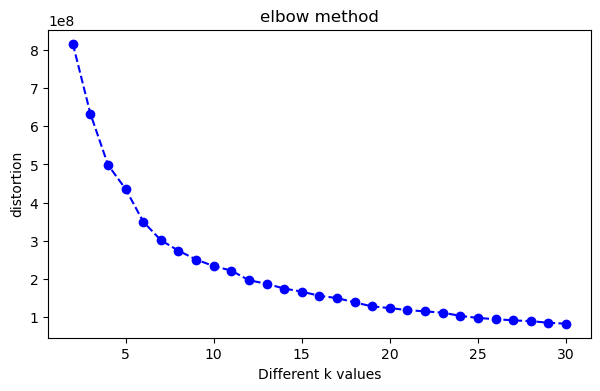

In [33]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

In [34]:
#

## 3. Data Preprocessing

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    283726 non-null  float64
 1   v1      283726 non-null  float64
 2   v2      283726 non-null  float64
 3   v3      283726 non-null  float64
 4   v4      283726 non-null  float64
 5   v5      283726 non-null  float64
 6   v6      283726 non-null  float64
 7   v7      283726 non-null  float64
 8   v8      283726 non-null  float64
 9   v9      283726 non-null  float64
 10  v10     283726 non-null  float64
 11  v11     283726 non-null  float64
 12  v12     283726 non-null  float64
 13  v13     283726 non-null  float64
 14  v14     283726 non-null  float64
 15  v15     283726 non-null  float64
 16  v16     283726 non-null  float64
 17  v17     283726 non-null  float64
 18  v18     283726 non-null  float64
 19  v19     283726 non-null  float64
 20  v20     283726 non-null  float64
 21  v21     283726 

#### Train - Test Split

In [36]:
X = df.drop('fraud',axis=1)
y = df['fraud']

## Train-Test Validation Checks
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_train_test_validation.html

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
seed = 42

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.20, random_state=seed
)

In [40]:
train_ds = Dataset(X_train, label=y_train,features=X.columns)
test_ds = Dataset(X_test, label=y_test,features=X.columns)

deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 0 categorical features were inferred.
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 0 categorical features were inferred.


In [41]:
# Train Test Validation

from deepchecks.tabular.suites import train_test_validation

validation_suite = train_test_validation()
suite_result = validation_suite.run(train_ds, test_ds)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_FIO5KXH0FFG0MKHTBUAS5CMPK">Train Test Validat…

#### Scaling

In [42]:
from sklearn.preprocessing import StandardScaler

---
---


## 4. Model Building
It was previously stated that you need to make class prediction with four different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset, we can use undersampling and oversampling or class weight and optimum thresold techniques.

### Logistic Regression

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating and Tuning*
   
   *iv. Plot Precision and Recall Curve*

***i. Import Libraries***

In [43]:
from sklearn.linear_model import LogisticRegression

***ii. Model Training***

In [44]:
from sklearn.pipeline import Pipeline

In [45]:
# operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]
# logreg_model = Pipeline(steps=operations)

# logreg_model.fit(X_train, y_train)

In [46]:
from sklearn.model_selection import cross_validate

In [47]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

logregcv_model = Pipeline(steps=operations)

# In classification problems, the cross-validation (CV)
# algorithm preserves the class ratios from the original 
# dataset in each iteration.

scores = cross_validate(logregcv_model,
                        X_train,
                        y_train,
                        scoring = ['precision',
                                   'recall',
                                   'f1',
                                   'accuracy',
                                   'average_precision'],
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1,11))
df_scores

,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_accuracy,train_accuracy,test_average_precision,train_average_precision
1,0.277471,0.020145,0.900000,0.877551,0.486486,0.630499,0.631579,0.733788,0.999075,0.999236,0.703191,0.771983
2,0.228397,0.018678,0.916667,0.873984,0.594595,0.630499,0.721311,0.732538,0.999251,0.999231,0.795376,0.764036
3,0.215072,0.017784,0.826087,0.882845,0.500000,0.620588,0.622951,0.728843,0.998987,0.999231,0.675858,0.770960
4,0.175195,0.013637,0.892857,0.870833,0.657895,0.614706,0.757576,0.720690,0.999295,0.999207,0.785780,0.761072
5,0.226100,0.018855,0.787879,0.875519,0.684211,0.620588,0.732394,0.726334,0.999163,0.999222,0.743239,0.767104
6,0.255964,0.016651,0.846154,0.878661,0.578947,0.617647,0.687500,0.725389,0.999119,0.999222,0.789662,0.761367
7,0.195457,0.018808,0.846154,0.873950,0.578947,0.611765,0.687500,0.719723,0.999119,0.999207,0.779495,0.762937
8,0.187387,0.016019,0.840000,0.872951,0.552632,0.626471,0.666667,0.729452,0.999075,0.999227,0.689751,0.775792
9,0.205215,0.013734,0.823529,0.871901,0.736842,0.620588,0.777778,0.725086,0.999295,0.999217,0.785938,0.760122
10,0.246202,0.019085,0.896552,0.870833,0.684211,0.614706,0.776119,0.720690,0.999339,0.999207,0.836047,0.757542


In [48]:
logregcv_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

***iii. Prediction and Model Evaluating  and Tuning***

In [49]:
y_pred = logregcv_model.predict(X_test)

In [50]:
y_pred_proba = logregcv_model.predict_proba(X_test)

In [51]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,fraud,pred,pred_proba
19833,30587.0,1.279719,0.229979,0.300798,0.508142,-0.222332,-0.698722,0.080109,-0.190857,0.038217,-0.076560,-0.616193,0.345721,0.667911,0.158716,1.040322,0.436753,-0.618940,-0.410552,0.064418,-0.043508,-0.282188,-0.818844,0.064504,-0.112276,0.289862,0.123730,-0.029532,0.015962,9.99,0,0,0.000095
7755,10799.0,1.266542,0.015942,0.623743,-0.050315,-0.513566,-0.469132,-0.423446,-0.067397,1.470987,-0.408524,2.095040,-1.801558,1.557498,1.778119,-0.141884,0.677570,0.009015,0.479510,0.239627,-0.098823,-0.256529,-0.522403,0.058309,-0.000197,0.101932,0.869285,-0.102920,-0.010869,2.14,0,0,0.000030
121287,76139.0,-0.612917,0.756104,1.031958,-0.120313,0.040623,0.024858,1.176054,0.052119,-0.563075,-0.458568,1.192051,0.357163,-0.829660,0.515620,-0.179048,0.266302,-0.715426,0.033987,-1.196983,-0.272271,0.183949,0.442790,-0.085088,-0.004304,0.142365,-0.522919,-0.064092,-0.028054,111.21,0,0,0.000231
231178,146643.0,2.103841,-0.148881,-1.661488,-0.063963,0.691056,0.146631,-0.004712,-0.016874,0.358743,0.238862,-0.042123,0.674183,0.085088,0.413459,-0.525704,0.438230,-0.949092,0.026709,0.854323,-0.152583,-0.314932,-0.851155,0.230858,-0.354456,-0.169659,0.211366,-0.081796,-0.074070,2.68,0,0,0.000083
45559,42401.0,0.970574,-0.406243,1.663906,1.530176,-1.152672,0.854107,-1.036469,0.520597,1.094880,-0.127393,0.887602,1.137140,-0.749534,-0.387166,-0.985075,-0.242516,0.102340,0.019676,-0.272895,-0.163811,0.093570,0.536998,-0.039802,0.234478,0.326564,-0.269590,0.098294,0.030973,32.65,0,0,0.000536
257866,158378.0,1.954498,-1.032432,-1.977261,-1.810989,1.538611,3.505575,-1.209669,0.945449,1.396413,-0.375874,0.095627,0.453417,0.067002,0.131457,1.594074,0.165575,-0.599428,-0.044269,-0.068524,0.001687,0.201400,0.552240,0.182653,0.777393,-0.315674,0.721310,-0.026068,-0.051139,49.00,0,0,0.000070
203773,134958.0,2.267620,-1.430871,-1.091776,-1.818814,-0.820579,0.095652,-1.179407,-0.089814,-1.486052,1.674218,-0.011410,0.300224,1.886540,-0.623209,-0.845880,-0.108693,-0.193918,0.548710,0.424231,-0.270717,-0.143655,0.113110,0.078840,-1.139538,-0.115357,-0.131594,0.023871,-0.061476,37.40,0,0,0.000074
201079,133723.0,1.978710,-0.686330,-1.693067,-0.620884,1.722732,3.909900,-1.264600,1.057245,1.315476,-0.144968,-0.223016,0.496345,-0.052496,-0.001647,0.893182,-0.000163,-0.583829,0.073346,-0.355514,-0.161707,0.186340,0.696524,0.166519,0.726160,-0.056817,-0.191387,0.062612,-0.044411,1.00,0,0,0.000133
145023,86570.0,2.141250,-1.118708,-0.593212,-0.869604,-1.064076,-0.403740,-1.081952,-0.103932,0.252880,0.721174,-1.379793,-0.576235,0.615391,-0.656417,0.277385,1.392512,-0.148795,-0.761969,0.553137,0.067845,0.442029,1.342043,-0.038455,-0.517714,-0.013102,0.071148,0.014296,-0.047559,41.95,0,0,0.000183
140371,83684.0,-2.062348,1.985964,-0.225669,0.014813,-0.901510,-1.079035,0.240705,0.558123,-0.440033,-0.123605,-0.938155,-0.129111,-0.580219,0.963205,0.565870,0.130321,0.093995,-0.174916,0.063757,-0.524979,0.236643,0.142296,0.027540,0.390141,-0.385665,0.144977,-1.400875,-0.238362,42.81,0,0,0.000221


In [52]:
from sklearn.metrics import confusion_matrix, classification_report, average_precision_score

In [53]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    y_pred_proba=model.predict_proba(X_test)
    y_train_pred_proba=model.predict_proba(X_train)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("avg_pre_0 :", average_precision_score(y_test, y_pred_proba[:,0], pos_label=0))
    print("avg_pre_1 :", average_precision_score(y_test, y_pred_proba[:,1]))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print("avg_pre_0 :", average_precision_score(y_train, y_train_pred_proba[:,0], pos_label=0))
    print("avg_pre_1 :", average_precision_score(y_train, y_train_pred_proba[:,1]))

In [54]:
eval_metric(logregcv_model, X_train, y_train, X_test, y_test)

Test_Set
[[56641    10]
 [   40    55]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.85      0.58      0.69        95

    accuracy                           1.00     56746
   macro avg       0.92      0.79      0.84     56746
weighted avg       1.00      1.00      1.00     56746

avg_pre_0 : 0.9998873968162837
avg_pre_1 : 0.6919665484964556

Train_Set
[[226570     32]
 [   148    230]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       0.88      0.61      0.72       378

    accuracy                           1.00    226980
   macro avg       0.94      0.80      0.86    226980
weighted avg       1.00      1.00      1.00    226980

avg_pre_0 : 0.9999699284614699
avg_pre_1 : 0.7631746123218474



You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


In [55]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, roc_curve,\
                            average_precision_score, precision_recall_curve

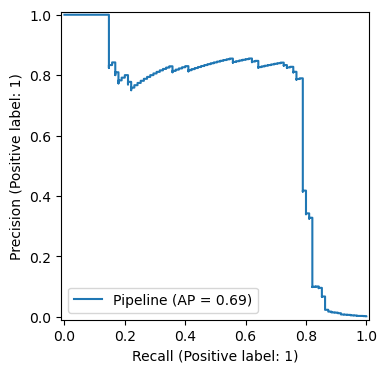

In [56]:
PrecisionRecallDisplay.from_estimator(logregcv_model, X_test, y_test, pos_label=1);

- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class matrics is not sufficient, apply "unbalanced data tecniques".

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [57]:
from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, logregcv_model)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 9 seconds


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_TS1LURXJ151Z3VDRA2T7ITOG1">Model Evaluation S…

### Logistic Regression with Unbalanced Data Techniques

***i. Train-Test Split (Again)***

In [58]:
####### No need to resplit again #######

***ii. Model Training***

***Prediction and Model Evaluating and Tuning***

In [59]:
from sklearn.model_selection import GridSearchCV

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

penalty = ["l1", "l2"]
C = [0.01, 0.1, 1, 5]
class_weight= ["balanced", None]

# In imbalanced datasets, we can use `class_weight="balanced"` to balance the classes.
#
# When the data is balanced, the model increases the **precision score** for the minority
# class, thereby improving its **recall score**.

# The "balanced" mode uses the values of y to automatically adjust weights inversely
# proportional to class frequencies in the input data
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"logistic__penalty" : penalty,
              "logistic__C" : C,
              "logistic__class_weight":class_weight,
              "logistic__solver":solver}



# In classification problems, the `GridSearchCV` algorithm preserves the class ratios
# from the original dataset in each iteration.

logreg_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall",   #f1_0 = make_scorer(f1_score, pos_label =0)
                          n_jobs = -1,
                          return_train_score=True)

# Since `GridSearchCV` also performs cross-validation,
# we set `return_train_score=True` to obtain both validation
# and training set scores.

# (The `scoring` parameter only returns the metric score specified.)

In [60]:
logreg_grid_model.fit(X_train, y_train)

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.01, 0.1, 1, 5],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['lbfgs', 'liblinear', 'sag',
                                              'saga']},
             return_train_score=True, scoring='recall')

In [61]:
eval_metric(logreg_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[55405  1246]
 [   12    83]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.87      0.12        95

    accuracy                           0.98     56746
   macro avg       0.53      0.93      0.55     56746
weighted avg       1.00      0.98      0.99     56746

avg_pre_0 : 0.999914328823078
avg_pre_1 : 0.6981888704109329

Train_Set
[[221772   4830]
 [    32    346]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    226602
           1       0.07      0.92      0.12       378

    accuracy                           0.98    226980
   macro avg       0.53      0.95      0.56    226980
weighted avg       1.00      0.98      0.99    226980

avg_pre_0 : 0.9999793564642772
avg_pre_1 : 0.7469751526620327


***iv.  Plot Precision and Recall Curve***


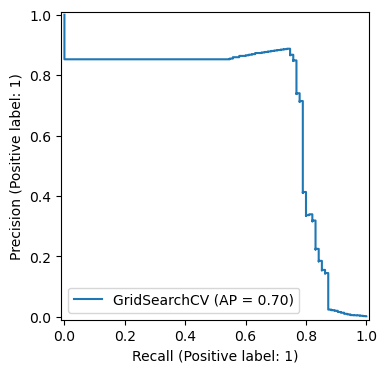

In [62]:
PrecisionRecallDisplay.from_estimator(logreg_grid_model, X_test, y_test, pos_label=1);

In [63]:
# Surprisingly, the balanced class weighted model performs worse

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [64]:
# Model Evaluation: Logistic Regression CV

from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, logregcv_model)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 8 seconds


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_WCMLAAK5W9ZGE9SXT7VRHDLES">Model Evaluation S…

***vi. Calibrate your model predictions***
- https://webcache.googleusercontent.com/search?q=cache:https://ai.plainenglish.io/model-calibration-secret-sauce-of-super-accurate-models-b401d98d37e0&sca_esv=600219767&strip=1&vwsrc=0
- https://towardsdatascience.com/a-comprehensive-guide-on-model-calibration-part-1-of-4-73466eb5e09a

### Random Forest Classifier with Unbalanced Data Techniques
   

In [65]:
from sklearn.ensemble import RandomForestClassifier

***i. Model Training***

In [66]:
# from scipy.stats import randint

In [67]:
# params = {
#     'class_weight': [{0:1, 1:50}, {0:1, 1:100}, 'balanced'],
#     'max_depth': randint(5, 15),
#     'min_samples_leaf': randint(10, 50),
#     'max_features': ['sqrt', 0.3, 0.5],
#     'n_estimators': randint(300, 1000),
# }

In [68]:
rf_model = RandomForestClassifier(
                n_estimators=200,
                max_depth=8, #(e.g. 5-9) 
                min_samples_leaf=5,
                max_features='sqrt',
                class_weight='balanced',  # Fine tune the class weights
                random_state=42
            )

In [69]:
# from sklearn.model_selection import RandomizedSearchCV

In [70]:
# rf_rscv_model = RandomizedSearchCV(
#     rf_model, 
#     params, 
#     n_iter=50, 
#     scoring='average_precision',  # Focus on precision-recall AUC
#     cv=5, 
#     n_jobs=-1
# )

In [71]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, min_samples_leaf=5,
                       n_estimators=200, random_state=42)

***ii. Prediction and Model Evaluating and Tuning***

In [72]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[56636    15]
 [   22    73]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.83      0.77      0.80        95

    accuracy                           1.00     56746
   macro avg       0.91      0.88      0.90     56746
weighted avg       1.00      1.00      1.00     56746

avg_pre_0 : 0.9999325220269539
avg_pre_1 : 0.7780619251918773

Train_Set
[[226519     83]
 [    20    358]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       0.81      0.95      0.87       378

    accuracy                           1.00    226980
   macro avg       0.91      0.97      0.94    226980
weighted avg       1.00      1.00      1.00    226980

avg_pre_0 : 0.9999998064337567
avg_pre_1 : 0.943556002681558


***iii. Plot Precision and Recall Curve***


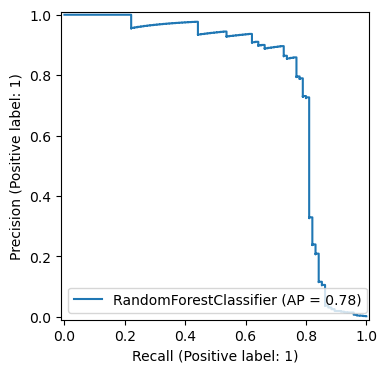

In [73]:
PrecisionRecallDisplay.from_estimator(rf_model, X_test, y_test);

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [74]:
# Model Evaluation: Random Forest

from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, rf_model)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_KMSXZZMI1WCRTCIZFLLS1B607">Model Evaluation S…

***vi. Calibrate your model predictions***
- https://webcache.googleusercontent.com/search?q=cache:https://ai.plainenglish.io/model-calibration-secret-sauce-of-super-accurate-models-b401d98d37e0&sca_esv=600219767&strip=1&vwsrc=0
- https://towardsdatascience.com/a-comprehensive-guide-on-model-calibration-part-1-of-4-73466eb5e09a

### XGBoost Classifier with Unbalanced Data Techniques

In [75]:
import xgboost
from xgboost import XGBClassifier

***i. Model Training***

In [76]:
# Further split the training set into training and validation sets

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, stratify=y_train, test_size=0.10, random_state=seed
)

In [77]:
ratio = float(np.sum(y_train == 0)) / np.sum(y_train == 1)
ratio

599.8294117647059

In [78]:
from sklearn.metrics import precision_score, make_scorer

In [79]:
precision_scorer = make_scorer(precision_score, average='binary')  # Use 'macro' for multiclass

In [80]:
weights = np.where(y_train == 0, 1, 5)
weights 

array([1, 1, 1, ..., 1, 1, 1])

In [81]:
# Initialize model
xgb_model = XGBClassifier(
                scale_pos_weight=ratio, 
                eval_metric='aucpr',
                use_label_encoder=False,
                early_stopping_rounds=20
            )

In [82]:
from sklearn.model_selection import RandomizedSearchCV

In [83]:
xgb_rs_model = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,                   # Number of random combinations
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

In [84]:
xgb_rs_model.fit(X_train, y_train, eval_set=[(X_val, y_val)])

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver",

[0]	validation_0-aucpr:0.46237
[0]	validation_0-aucpr:0.12079
[1]	validation_0-aucpr:0.50026
[0]	validation_0-aucpr:0.57949
[1]	validation_0-aucpr:0.55392
[2]	validation_0-aucpr:0.71402
[2]	validation_0-aucpr:0.80031
[1]	validation_0-aucpr:0.76055
[3]	validation_0-aucpr:0.79543
[0]	validation_0-aucpr:0.60854
[3]	validation_0-aucpr:0.80720
[2]	validation_0-aucpr:0.79930
[4]	validation_0-aucpr:0.80270
[0]	validation_0-aucpr:0.49422
[1]	validation_0-aucpr:0.56208
[5]	validation_0-aucpr:0.80099
[3]	validation_0-aucpr:0.82057
[4]	validation_0-aucpr:0.80827
[1]	validation_0-aucpr:0.72597
[6]	validation_0-aucpr:0.80338
[2]	validation_0-aucpr:0.61062
[4]	validation_0-aucpr:0.82207
[0]	validation_0-aucpr:0.57949
[3]	validation_0-aucpr:0.75073
[0]	validation_0-aucpr:0.12079
[7]	validation_0-aucpr:0.80254
[2]	validation_0-aucpr:0.72878
[5]	validation_0-aucpr:0.84616
[5]	validation_0-aucpr:0.80968
[1]	validation_0-aucpr:0.76055
[4]	validation_0-aucpr:0.80976
[1]	validation_0-aucpr:0.55392
[8]	vali

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[53]	validation_0-aucpr:0.91375
[61]	validation_0-aucpr:0.90502
[55]	validation_0-aucpr:0.91531
[54]	validation_0-aucpr:0.91996
[6]	validation_0-aucpr:0.80901
[56]	validation_0-aucpr:0.91663
[55]	validation_0-aucpr:0.90437
[49]	validation_0-aucpr:0.91602
[55]	validation_0-aucpr:0.92043
[52]	validation_0-aucpr:0.91729
[54]	validation_0-aucpr:0.91414
[55]	validation_0-aucpr:0.92043
[57]	validation_0-aucpr:0.91634
[56]	validation_0-aucpr:0.91553
[62]	validation_0-aucpr:0.90490
[55]	validation_0-aucpr:0.91440
[7]	validation_0-aucpr:0.80405
[56]	validation_0-aucpr:0.92048
[58]	validation_0-aucpr:0.91656
[57]	validation_0-aucpr:0.91512
[56]	validation_0-aucpr:0.90446
[8]	validation_0-aucpr:0.80393
[56]	validation_0-aucpr:0.91376
[50]	validation_0-aucpr:0.91522
[53]	validation_0-aucpr:0.91552
[56]	validation_0-aucpr:0.92048
[58]	validation_0-aucpr:0.91595
[63]	validation_0-aucpr:0.90558
[54]	validation_0-aucpr:0.91605
[57]	validation_0-aucpr:0.92079
[59]	validation_0-aucpr:0.91637
[9]	validat

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[9]	validation_0-aucpr:0.83294
[62]	validation_0-aucpr:0.91503
[10]	validation_0-aucpr:0.83155
[63]	validation_0-aucpr:0.91526
[2]	validation_0-aucpr:0.80031
[11]	validation_0-aucpr:0.84594
[64]	validation_0-aucpr:0.91394
[3]	validation_0-aucpr:0.80720
[12]	validation_0-aucpr:0.84004
[13]	validation_0-aucpr:0.86150
[65]	validation_0-aucpr:0.91471
[4]	validation_0-aucpr:0.80827
[66]	validation_0-aucpr:0.91586
[14]	validation_0-aucpr:0.85887
[5]	validation_0-aucpr:0.80968
[15]	validation_0-aucpr:0.89074
[67]	validation_0-aucpr:0.91625
[6]	validation_0-aucpr:0.81129
[16]	validation_0-aucpr:0.88879
[68]	validation_0-aucpr:0.91682
[69]	validation_0-aucpr:0.91695
[7]	validation_0-aucpr:0.81308
[17]	validation_0-aucpr:0.89042
[70]	validation_0-aucpr:0.91585
[18]	validation_0-aucpr:0.89177
[8]	validation_0-aucpr:0.81455
[71]	validation_0-aucpr:0.91549
[9]	validation_0-aucpr:0.81584
[72]	validation_0-aucpr:0.91657
[10]	validation_0-aucpr:0.81714
[19]	validation_0-aucpr:0.89203
[73]	validation_0

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver",

[74]	validation_0-aucpr:0.91645
[21]	validation_0-aucpr:0.89262
[12]	validation_0-aucpr:0.82263
[13]	validation_0-aucpr:0.82410
[22]	validation_0-aucpr:0.89412
[0]	validation_0-aucpr:0.46237
[75]	validation_0-aucpr:0.91709
[14]	validation_0-aucpr:0.89726
[23]	validation_0-aucpr:0.89380
[76]	validation_0-aucpr:0.91750
[15]	validation_0-aucpr:0.89871
[1]	validation_0-aucpr:0.50026
[24]	validation_0-aucpr:0.89626
[16]	validation_0-aucpr:0.89425
[0]	validation_0-aucpr:0.60854
[0]	validation_0-aucpr:0.49422
[25]	validation_0-aucpr:0.89576
[1]	validation_0-aucpr:0.56208
[17]	validation_0-aucpr:0.89718
[2]	validation_0-aucpr:0.71402
[1]	validation_0-aucpr:0.72597
[77]	validation_0-aucpr:0.91729
[2]	validation_0-aucpr:0.61062
[18]	validation_0-aucpr:0.89748
[26]	validation_0-aucpr:0.89522
[3]	validation_0-aucpr:0.75073
[78]	validation_0-aucpr:0.91755
[27]	validation_0-aucpr:0.89490
[2]	validation_0-aucpr:0.72878
[19]	validation_0-aucpr:0.89668
[3]	validation_0-aucpr:0.79543
[4]	validation_0-au

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[96]	validation_0-aucpr:0.91793
[20]	validation_0-aucpr:0.89325
[3]	validation_0-aucpr:0.75073
[19]	validation_0-aucpr:0.88283
[18]	validation_0-aucpr:0.89177
[21]	validation_0-aucpr:0.89532
[14]	validation_0-aucpr:0.89726
[8]	validation_0-aucpr:0.79809
[21]	validation_0-aucpr:0.86363
[4]	validation_0-aucpr:0.80976
[46]	validation_0-aucpr:0.90274
[39]	validation_0-aucpr:0.90443
[97]	validation_0-aucpr:0.91798
[15]	validation_0-aucpr:0.89871
[9]	validation_0-aucpr:0.79940
[19]	validation_0-aucpr:0.89203
[47]	validation_0-aucpr:0.90315
[20]	validation_0-aucpr:0.88757
[22]	validation_0-aucpr:0.86304
[5]	validation_0-aucpr:0.81398
[22]	validation_0-aucpr:0.89971
[16]	validation_0-aucpr:0.89425
[98]	validation_0-aucpr:0.91842
[21]	validation_0-aucpr:0.89243
[6]	validation_0-aucpr:0.81562
[20]	validation_0-aucpr:0.89072
[23]	validation_0-aucpr:0.89897
[40]	validation_0-aucpr:0.90994
[48]	validation_0-aucpr:0.90328
[23]	validation_0-aucpr:0.87821
[21]	validation_0-aucpr:0.89262
[10]	validatio

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[78]	validation_0-aucpr:0.91710
[66]	validation_0-aucpr:0.92040
[79]	validation_0-aucpr:0.92037
[11]	validation_0-aucpr:0.79716
[80]	validation_0-aucpr:0.90608
[79]	validation_0-aucpr:0.91724
[67]	validation_0-aucpr:0.92110
[68]	validation_0-aucpr:0.91682
[81]	validation_0-aucpr:0.90611
[12]	validation_0-aucpr:0.80488
[63]	validation_0-aucpr:0.91665
[80]	validation_0-aucpr:0.92018
[82]	validation_0-aucpr:0.90615
[13]	validation_0-aucpr:0.84941
[68]	validation_0-aucpr:0.92211
[69]	validation_0-aucpr:0.91695
[80]	validation_0-aucpr:0.91868
[83]	validation_0-aucpr:0.90622
[64]	validation_0-aucpr:0.91678
[81]	validation_0-aucpr:0.92015
[84]	validation_0-aucpr:0.90614
[81]	validation_0-aucpr:0.91783
[65]	validation_0-aucpr:0.91677
[69]	validation_0-aucpr:0.92098
[14]	validation_0-aucpr:0.88504
[70]	validation_0-aucpr:0.91585
[85]	validation_0-aucpr:0.90606
[86]	validation_0-aucpr:0.90607
[70]	validation_0-aucpr:0.92103
[82]	validation_0-aucpr:0.91866
[82]	validation_0-aucpr:0.91989
[87]	val

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[76]	validation_0-aucpr:0.91750
[88]	validation_0-aucpr:0.92005
[79]	validation_0-aucpr:0.92037
[72]	validation_0-aucpr:0.91746
[22]	validation_0-aucpr:0.89971
[2]	validation_0-aucpr:0.79930
[80]	validation_0-aucpr:0.92018
[23]	validation_0-aucpr:0.89897
[81]	validation_0-aucpr:0.92015
[73]	validation_0-aucpr:0.91748
[89]	validation_0-aucpr:0.92071
[77]	validation_0-aucpr:0.91729
[3]	validation_0-aucpr:0.82057
[24]	validation_0-aucpr:0.90247
[90]	validation_0-aucpr:0.92079
[74]	validation_0-aucpr:0.91834
[91]	validation_0-aucpr:0.92092
[4]	validation_0-aucpr:0.82207
[82]	validation_0-aucpr:0.91989
[78]	validation_0-aucpr:0.91755
[75]	validation_0-aucpr:0.91743
[5]	validation_0-aucpr:0.84616
[92]	validation_0-aucpr:0.92080
[25]	validation_0-aucpr:0.89920
[83]	validation_0-aucpr:0.92004
[79]	validation_0-aucpr:0.91753
[76]	validation_0-aucpr:0.91731
[6]	validation_0-aucpr:0.84087
[26]	validation_0-aucpr:0.89966
[80]	validation_0-aucpr:0.91757
[93]	validation_0-aucpr:0.92103
[84]	validati

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[8]	validation_0-aucpr:0.81455
[95]	validation_0-aucpr:0.92100
[26]	validation_0-aucpr:0.89522
[47]	validation_0-aucpr:0.91464
[0]	validation_0-aucpr:0.46237
[9]	validation_0-aucpr:0.81584
[48]	validation_0-aucpr:0.91447
[27]	validation_0-aucpr:0.89490
[96]	validation_0-aucpr:0.92120
[28]	validation_0-aucpr:0.89607
[49]	validation_0-aucpr:0.91532
[1]	validation_0-aucpr:0.50026
[97]	validation_0-aucpr:0.92132
[10]	validation_0-aucpr:0.81714
[29]	validation_0-aucpr:0.89784
[50]	validation_0-aucpr:0.91458
[98]	validation_0-aucpr:0.92135
[2]	validation_0-aucpr:0.71402
[51]	validation_0-aucpr:0.91481
[99]	validation_0-aucpr:0.92155
[11]	validation_0-aucpr:0.82001
[30]	validation_0-aucpr:0.89970
[52]	validation_0-aucpr:0.91405
[31]	validation_0-aucpr:0.89922
[53]	validation_0-aucpr:0.91375
[3]	validation_0-aucpr:0.79543
[12]	validation_0-aucpr:0.82263
[54]	validation_0-aucpr:0.91414
[4]	validation_0-aucpr:0.80270
[55]	validation_0-aucpr:0.91440
[32]	validation_0-aucpr:0.89844
[5]	validation_

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[10]	validation_0-aucpr:0.79813
[18]	validation_0-aucpr:0.89748
[59]	validation_0-aucpr:0.91334
[11]	validation_0-aucpr:0.80281
[37]	validation_0-aucpr:0.90144
[0]	validation_0-aucpr:0.60854
[0]	validation_0-aucpr:0.49422
[19]	validation_0-aucpr:0.89668
[60]	validation_0-aucpr:0.91521
[12]	validation_0-aucpr:0.80428
[20]	validation_0-aucpr:0.89527
[1]	validation_0-aucpr:0.72597
[1]	validation_0-aucpr:0.56208
[38]	validation_0-aucpr:0.90193
[21]	validation_0-aucpr:0.90184
[61]	validation_0-aucpr:0.91478
[2]	validation_0-aucpr:0.72878
[22]	validation_0-aucpr:0.89336
[2]	validation_0-aucpr:0.61062
[39]	validation_0-aucpr:0.90033
[13]	validation_0-aucpr:0.79495
[62]	validation_0-aucpr:0.91503
[14]	validation_0-aucpr:0.79578
[23]	validation_0-aucpr:0.90505
[3]	validation_0-aucpr:0.75647
[63]	validation_0-aucpr:0.91526
[3]	validation_0-aucpr:0.75073
[40]	validation_0-aucpr:0.90035
[4]	validation_0-aucpr:0.79975
[24]	validation_0-aucpr:0.89897
[64]	validation_0-aucpr:0.91394
[15]	validation_0

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[70]	validation_0-aucpr:0.91585
[21]	validation_0-aucpr:0.89243
[11]	validation_0-aucpr:0.81479
[0]	validation_0-aucpr:0.57949
[12]	validation_0-aucpr:0.80488
[31]	validation_0-aucpr:0.88748
[71]	validation_0-aucpr:0.91549
[48]	validation_0-aucpr:0.90328
[1]	validation_0-aucpr:0.76055
[22]	validation_0-aucpr:0.89117
[49]	validation_0-aucpr:0.90325
[13]	validation_0-aucpr:0.84941
[12]	validation_0-aucpr:0.81303
[72]	validation_0-aucpr:0.91657
[2]	validation_0-aucpr:0.79930
[73]	validation_0-aucpr:0.91623
[32]	validation_0-aucpr:0.89240
[3]	validation_0-aucpr:0.82057
[50]	validation_0-aucpr:0.90353
[23]	validation_0-aucpr:0.89122
[13]	validation_0-aucpr:0.82593
[33]	validation_0-aucpr:0.89199
[14]	validation_0-aucpr:0.88504
[24]	validation_0-aucpr:0.89319
[74]	validation_0-aucpr:0.91645
[34]	validation_0-aucpr:0.89408
[4]	validation_0-aucpr:0.82207
[51]	validation_0-aucpr:0.90400
[25]	validation_0-aucpr:0.89212
[14]	validation_0-aucpr:0.86704
[5]	validation_0-aucpr:0.84616
[0]	validation

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[42]	validation_0-aucpr:0.91311
[24]	validation_0-aucpr:0.89626
[32]	validation_0-aucpr:0.90401
[70]	validation_0-aucpr:0.90592
[5]	validation_0-aucpr:0.81398
[52]	validation_0-aucpr:0.91729
[17]	validation_0-aucpr:0.89718
[7]	validation_0-aucpr:0.80254
[92]	validation_0-aucpr:0.91858
[34]	validation_0-aucpr:0.90424
[25]	validation_0-aucpr:0.89576
[71]	validation_0-aucpr:0.90611
[6]	validation_0-aucpr:0.81562
[53]	validation_0-aucpr:0.91552
[18]	validation_0-aucpr:0.89748
[93]	validation_0-aucpr:0.91787
[35]	validation_0-aucpr:0.91290
[33]	validation_0-aucpr:0.90494
[8]	validation_0-aucpr:0.79809
[54]	validation_0-aucpr:0.91605
[26]	validation_0-aucpr:0.89522
[43]	validation_0-aucpr:0.91273
[72]	validation_0-aucpr:0.90639
[94]	validation_0-aucpr:0.91792
[7]	validation_0-aucpr:0.81310
[9]	validation_0-aucpr:0.79940
[36]	validation_0-aucpr:0.91775
[34]	validation_0-aucpr:0.90515
[55]	validation_0-aucpr:0.91531
[95]	validation_0-aucpr:0.91810
[10]	validation_0-aucpr:0.79813
[19]	validatio

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.startin

[79]	validation_0-aucpr:0.92037
[92]	validation_0-aucpr:0.92080
[64]	validation_0-aucpr:0.90560
[2]	validation_0-aucpr:0.72878
[50]	validation_0-aucpr:0.91522
[65]	validation_0-aucpr:0.91430
[65]	validation_0-aucpr:0.90568
[80]	validation_0-aucpr:0.92018
[93]	validation_0-aucpr:0.92103
[79]	validation_0-aucpr:0.91753
[47]	validation_0-aucpr:0.91802
[3]	validation_0-aucpr:0.75647
[66]	validation_0-aucpr:0.91469
[4]	validation_0-aucpr:0.79975
[51]	validation_0-aucpr:0.91610
[67]	validation_0-aucpr:0.91450
[94]	validation_0-aucpr:0.92105
[66]	validation_0-aucpr:0.90613
[48]	validation_0-aucpr:0.91869
[80]	validation_0-aucpr:0.91757
[81]	validation_0-aucpr:0.92015
[68]	validation_0-aucpr:0.91268
[52]	validation_0-aucpr:0.91592
[5]	validation_0-aucpr:0.80301
[95]	validation_0-aucpr:0.92100
[67]	validation_0-aucpr:0.90596
[6]	validation_0-aucpr:0.80901
[68]	validation_0-aucpr:0.90567
[82]	validation_0-aucpr:0.91989
[81]	validation_0-aucpr:0.91820
[53]	validation_0-aucpr:0.91626
[49]	validati

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_booste

[92]	validation_0-aucpr:0.92080
[38]	validation_0-aucpr:0.90193
[45]	validation_0-aucpr:0.91300
[4]	validation_0-aucpr:0.80270
[39]	validation_0-aucpr:0.90033
[5]	validation_0-aucpr:0.80099
[47]	validation_0-aucpr:0.91808
[46]	validation_0-aucpr:0.91456
[93]	validation_0-aucpr:0.92103
[6]	validation_0-aucpr:0.80338
[7]	validation_0-aucpr:0.80254
[48]	validation_0-aucpr:0.91816
[40]	validation_0-aucpr:0.90035
[47]	validation_0-aucpr:0.91464
[8]	validation_0-aucpr:0.79809
[41]	validation_0-aucpr:0.90068
[9]	validation_0-aucpr:0.79940
[94]	validation_0-aucpr:0.92105
[48]	validation_0-aucpr:0.91447
[49]	validation_0-aucpr:0.91853
[42]	validation_0-aucpr:0.90176
[0]	validation_0-aucpr:0.60854
[10]	validation_0-aucpr:0.79813
[0]	validation_0-aucpr:0.49422
[43]	validation_0-aucpr:0.90178
[49]	validation_0-aucpr:0.91532
[95]	validation_0-aucpr:0.92100
[1]	validation_0-aucpr:0.56208
[50]	validation_0-aucpr:0.91838
[50]	validation_0-aucpr:0.91458
[1]	validation_0-aucpr:0.72597
[11]	validation_0-

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[32]	validation_0-aucpr:0.90391
[12]	validation_0-aucpr:0.84004
[22]	validation_0-aucpr:0.86304
[17]	validation_0-aucpr:0.88996
[13]	validation_0-aucpr:0.86150
[33]	validation_0-aucpr:0.90342
[62]	validation_0-aucpr:0.90490
[67]	validation_0-aucpr:0.91450
[65]	validation_0-aucpr:0.91471
[63]	validation_0-aucpr:0.90558
[14]	validation_0-aucpr:0.85887
[0]	validation_0-aucpr:0.12079
[68]	validation_0-aucpr:0.91268
[64]	validation_0-aucpr:0.90560
[18]	validation_0-aucpr:0.89288
[66]	validation_0-aucpr:0.91586
[23]	validation_0-aucpr:0.87821
[15]	validation_0-aucpr:0.89074
[34]	validation_0-aucpr:0.90707
[65]	validation_0-aucpr:0.90568
[16]	validation_0-aucpr:0.88879
[1]	validation_0-aucpr:0.55392
[24]	validation_0-aucpr:0.88450
[17]	validation_0-aucpr:0.89042
[19]	validation_0-aucpr:0.89334
[35]	validation_0-aucpr:0.90704
[67]	validation_0-aucpr:0.91625
[66]	validation_0-aucpr:0.90613
[18]	validation_0-aucpr:0.89177
[36]	validation_0-aucpr:0.90674
[67]	validation_0-aucpr:0.90596
[2]	valida

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[40]	validation_0-aucpr:0.91221
[87]	validation_0-aucpr:0.90604
[43]	validation_0-aucpr:0.91932
[38]	validation_0-aucpr:0.90193
[8]	validation_0-aucpr:0.79809
[18]	validation_0-aucpr:0.89748
[53]	validation_0-aucpr:0.91626
[41]	validation_0-aucpr:0.91229
[88]	validation_0-aucpr:0.90593
[9]	validation_0-aucpr:0.79940
[39]	validation_0-aucpr:0.90033
[89]	validation_0-aucpr:0.91813
[89]	validation_0-aucpr:0.90594
[54]	validation_0-aucpr:0.91652
[19]	validation_0-aucpr:0.89668
[42]	validation_0-aucpr:0.91322
[44]	validation_0-aucpr:0.92037
[10]	validation_0-aucpr:0.79813
[40]	validation_0-aucpr:0.90035
[90]	validation_0-aucpr:0.90599
[43]	validation_0-aucpr:0.91254
[20]	validation_0-aucpr:0.89527
[41]	validation_0-aucpr:0.90068
[55]	validation_0-aucpr:0.91651
[11]	validation_0-aucpr:0.80281
[90]	validation_0-aucpr:0.91864
[45]	validation_0-aucpr:0.92059
[42]	validation_0-aucpr:0.90176
[56]	validation_0-aucpr:0.91663
[21]	validation_0-aucpr:0.90184
[12]	validation_0-aucpr:0.80428
[91]	valid

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[65]	validation_0-aucpr:0.91471[40]	validation_0-aucpr:0.90994

[6]	validation_0-aucpr:0.80901
[57]	validation_0-aucpr:0.90420
[76]	validation_0-aucpr:0.91731
[65]	validation_0-aucpr:0.92057
[7]	validation_0-aucpr:0.80405
[26]	validation_0-aucpr:0.89783
[30]	validation_0-aucpr:0.89923
[66]	validation_0-aucpr:0.91586
[41]	validation_0-aucpr:0.91211
[77]	validation_0-aucpr:0.91852
[66]	validation_0-aucpr:0.92040
[8]	validation_0-aucpr:0.80393
[27]	validation_0-aucpr:0.89751
[67]	validation_0-aucpr:0.92110
[58]	validation_0-aucpr:0.90425
[9]	validation_0-aucpr:0.80045
[42]	validation_0-aucpr:0.91577
[67]	validation_0-aucpr:0.91625
[78]	validation_0-aucpr:0.91710
[10]	validation_0-aucpr:0.79761
[28]	validation_0-aucpr:0.89621
[79]	validation_0-aucpr:0.91724
[31]	validation_0-aucpr:0.90285
[43]	validation_0-aucpr:0.91547
[68]	validation_0-aucpr:0.92211
[59]	validation_0-aucpr:0.90483
[32]	validation_0-aucpr:0.90391
[69]	validation_0-aucpr:0.92098
[11]	validation_0-aucpr:0.79716
[29]	validat

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[30]	validation_0-aucpr:0.90337
[3]	validation_0-aucpr:0.82057
[50]	validation_0-aucpr:0.91522
[79]	validation_0-aucpr:0.90597
[62]	validation_0-aucpr:0.91457
[88]	validation_0-aucpr:0.91814
[52]	validation_0-aucpr:0.92076
[51]	validation_0-aucpr:0.91610
[31]	validation_0-aucpr:0.90224
[4]	validation_0-aucpr:0.82207
[52]	validation_0-aucpr:0.91592
[89]	validation_0-aucpr:0.91813
[53]	validation_0-aucpr:0.92042
[32]	validation_0-aucpr:0.90401
[80]	validation_0-aucpr:0.90608
[63]	validation_0-aucpr:0.91416
[53]	validation_0-aucpr:0.91626
[90]	validation_0-aucpr:0.91864
[5]	validation_0-aucpr:0.84616
[54]	validation_0-aucpr:0.91996
[54]	validation_0-aucpr:0.91652
[91]	validation_0-aucpr:0.91833
[81]	validation_0-aucpr:0.90611
[64]	validation_0-aucpr:0.91403
[33]	validation_0-aucpr:0.90494
[82]	validation_0-aucpr:0.90615
[55]	validation_0-aucpr:0.92043
[6]	validation_0-aucpr:0.84087
[92]	validation_0-aucpr:0.91858
[65]	validation_0-aucpr:0.91430
[93]	validation_0-aucpr:0.91787
[56]	validat

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver",

[9]	validation_0-aucpr:0.81642
[75]	validation_0-aucpr:0.91709
[9]	validation_0-aucpr:0.79940
[41]	validation_0-aucpr:0.91211
[76]	validation_0-aucpr:0.91750
[1]	validation_0-aucpr:0.72597
[10]	validation_0-aucpr:0.81631
[10]	validation_0-aucpr:0.79813
[48]	validation_0-aucpr:0.90328
[42]	validation_0-aucpr:0.91577
[77]	validation_0-aucpr:0.91729
[11]	validation_0-aucpr:0.81479
[2]	validation_0-aucpr:0.72878
[78]	validation_0-aucpr:0.91755
[11]	validation_0-aucpr:0.80281
[49]	validation_0-aucpr:0.90325
[43]	validation_0-aucpr:0.91547
[12]	validation_0-aucpr:0.80428
[12]	validation_0-aucpr:0.81303
[79]	validation_0-aucpr:0.91753
[3]	validation_0-aucpr:0.75647
[50]	validation_0-aucpr:0.90353
[44]	validation_0-aucpr:0.91754
[0]	validation_0-aucpr:0.12079
[80]	validation_0-aucpr:0.91757
[13]	validation_0-aucpr:0.82593
[45]	validation_0-aucpr:0.91833
[51]	validation_0-aucpr:0.90400
[1]	validation_0-aucpr:0.55392
[13]	validation_0-aucpr:0.79495
[14]	validation_0-aucpr:0.86704
[81]	validation

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[19]	validation_0-aucpr:0.85142
[4]	validation_0-aucpr:0.82207
[88]	validation_0-aucpr:0.91814
[10]	validation_0-aucpr:0.79761
[9]	validation_0-aucpr:0.81584
[20]	validation_0-aucpr:0.86675
[52]	validation_0-aucpr:0.91729
[20]	validation_0-aucpr:0.88757
[58]	validation_0-aucpr:0.90425
[5]	validation_0-aucpr:0.84616
[21]	validation_0-aucpr:0.86363
[11]	validation_0-aucpr:0.79716
[89]	validation_0-aucpr:0.91813
[53]	validation_0-aucpr:0.91552
[10]	validation_0-aucpr:0.81714
[59]	validation_0-aucpr:0.90483
[12]	validation_0-aucpr:0.80488
[6]	validation_0-aucpr:0.84087
[21]	validation_0-aucpr:0.89243
[22]	validation_0-aucpr:0.86304
[54]	validation_0-aucpr:0.91605
[90]	validation_0-aucpr:0.91864
[11]	validation_0-aucpr:0.82001
[13]	validation_0-aucpr:0.84941
[7]	validation_0-aucpr:0.84086
[22]	validation_0-aucpr:0.89117
[55]	validation_0-aucpr:0.91531
[14]	validation_0-aucpr:0.88504
[60]	validation_0-aucpr:0.90489
[23]	validation_0-aucpr:0.87821
[12]	validation_0-aucpr:0.82263
[56]	validati

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[33]	validation_0-aucpr:0.90494
[25]	validation_0-aucpr:0.89576[81]	validation_0-aucpr:0.90611

[13]	validation_0-aucpr:0.79495
[82]	validation_0-aucpr:0.90615
[29]	validation_0-aucpr:0.89634
[43]	validation_0-aucpr:0.91273
[34]	validation_0-aucpr:0.90515
[41]	validation_0-aucpr:0.91827
[83]	validation_0-aucpr:0.90622
[26]	validation_0-aucpr:0.89522
[30]	validation_0-aucpr:0.88400
[42]	validation_0-aucpr:0.91920
[35]	validation_0-aucpr:0.90980
[14]	validation_0-aucpr:0.79578
[27]	validation_0-aucpr:0.89490
[44]	validation_0-aucpr:0.91403
[31]	validation_0-aucpr:0.88748
[84]	validation_0-aucpr:0.90614
[15]	validation_0-aucpr:0.79647
[43]	validation_0-aucpr:0.91932
[36]	validation_0-aucpr:0.91116
[28]	validation_0-aucpr:0.89607
[37]	validation_0-aucpr:0.90853
[16]	validation_0-aucpr:0.81720
[44]	validation_0-aucpr:0.92037
[85]	validation_0-aucpr:0.90606
[45]	validation_0-aucpr:0.91569
[32]	validation_0-aucpr:0.89240
[86]	validation_0-aucpr:0.90607
[17]	validation_0-aucpr:0.87344
[38]	val

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[46]	validation_0-aucpr:0.91456
[51]	validation_0-aucpr:0.91984
[25]	validation_0-aucpr:0.89212
[36]	validation_0-aucpr:0.90222
[54]	validation_0-aucpr:0.91652
[3]	validation_0-aucpr:0.75073
[39]	validation_0-aucpr:0.90443
[47]	validation_0-aucpr:0.91464
[26]	validation_0-aucpr:0.89448
[40]	validation_0-aucpr:0.90994
[55]	validation_0-aucpr:0.91651
[4]	validation_0-aucpr:0.80976
[37]	validation_0-aucpr:0.90144
[52]	validation_0-aucpr:0.92076
[48]	validation_0-aucpr:0.91447
[5]	validation_0-aucpr:0.81398
[56]	validation_0-aucpr:0.91663
[53]	validation_0-aucpr:0.92042
[38]	validation_0-aucpr:0.90193
[27]	validation_0-aucpr:0.89814
[6]	validation_0-aucpr:0.81562
[57]	validation_0-aucpr:0.91634
[41]	validation_0-aucpr:0.91211
[49]	validation_0-aucpr:0.91532
[7]	validation_0-aucpr:0.81310
[39]	validation_0-aucpr:0.90033
[58]	validation_0-aucpr:0.91656
[54]	validation_0-aucpr:0.91996
[50]	validation_0-aucpr:0.91458
[42]	validation_0-aucpr:0.91577
[28]	validation_0-aucpr:0.89934
[8]	validatio

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[71]	validation_0-aucpr:0.92127
[67]	validation_0-aucpr:0.91625
[83]	validation_0-aucpr:0.91996
[28]	validation_0-aucpr:0.89621
[3]	validation_0-aucpr:0.75647
[43]	validation_0-aucpr:0.91273
[6]	validation_0-aucpr:0.84087
[84]	validation_0-aucpr:0.91980
[62]	validation_0-aucpr:0.91457
[62]	validation_0-aucpr:0.90490
[72]	validation_0-aucpr:0.92112
[68]	validation_0-aucpr:0.91682
[44]	validation_0-aucpr:0.91403
[29]	validation_0-aucpr:0.90158
[7]	validation_0-aucpr:0.84086
[85]	validation_0-aucpr:0.92052
[69]	validation_0-aucpr:0.91695
[73]	validation_0-aucpr:0.92024
[4]	validation_0-aucpr:0.79975
[86]	validation_0-aucpr:0.92050
[63]	validation_0-aucpr:0.90558
[63]	validation_0-aucpr:0.91416
[5]	validation_0-aucpr:0.80301
[45]	validation_0-aucpr:0.91569
[8]	validation_0-aucpr:0.83398
[74]	validation_0-aucpr:0.92031
[30]	validation_0-aucpr:0.90608
[70]	validation_0-aucpr:0.91585
[64]	validation_0-aucpr:0.90560
[87]	validation_0-aucpr:0.92055
[9]	validation_0-aucpr:0.83294
[46]	validation

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[24]	validation_0-aucpr:0.90247
[85]	validation_0-aucpr:0.90606
[28]	validation_0-aucpr:0.89607
[1]	validation_0-aucpr:0.55392
[64]	validation_0-aucpr:0.91678
[25]	validation_0-aucpr:0.89920
[65]	validation_0-aucpr:0.91677
[92]	validation_0-aucpr:0.91858
[52]	validation_0-aucpr:0.92076
[86]	validation_0-aucpr:0.90607
[2]	validation_0-aucpr:0.80031
[29]	validation_0-aucpr:0.89784
[93]	validation_0-aucpr:0.91787
[26]	validation_0-aucpr:0.89966
[53]	validation_0-aucpr:0.92042
[87]	validation_0-aucpr:0.90604
[66]	validation_0-aucpr:0.91649
[3]	validation_0-aucpr:0.80720
[54]	validation_0-aucpr:0.91996
[94]	validation_0-aucpr:0.91792
[67]	validation_0-aucpr:0.91708
[30]	validation_0-aucpr:0.89970
[88]	validation_0-aucpr:0.90593
[27]	validation_0-aucpr:0.90385
[68]	validation_0-aucpr:0.91792
[55]	validation_0-aucpr:0.92043
[4]	validation_0-aucpr:0.80827
[95]	validation_0-aucpr:0.91810
[5]	validation_0-aucpr:0.80968
[89]	validation_0-aucpr:0.90594
[56]	validation_0-aucpr:0.92048
[28]	validati

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[88]	validation_0-aucpr:0.92005
[22]	validation_0-aucpr:0.89336
[48]	validation_0-aucpr:0.91447
[23]	validation_0-aucpr:0.90505
[77]	validation_0-aucpr:0.92138
[0]	validation_0-aucpr:0.46237
[48]	validation_0-aucpr:0.90328
[78]	validation_0-aucpr:0.92041
[1]	validation_0-aucpr:0.50026
[49]	validation_0-aucpr:0.90325
[89]	validation_0-aucpr:0.92071
[79]	validation_0-aucpr:0.92037
[2]	validation_0-aucpr:0.71402
[24]	validation_0-aucpr:0.89897
[80]	validation_0-aucpr:0.92018
[3]	validation_0-aucpr:0.79543
[49]	validation_0-aucpr:0.91532
[81]	validation_0-aucpr:0.92015
[25]	validation_0-aucpr:0.90358
[50]	validation_0-aucpr:0.90353
[90]	validation_0-aucpr:0.92079
[4]	validation_0-aucpr:0.80270
[26]	validation_0-aucpr:0.90162
[51]	validation_0-aucpr:0.90400
[50]	validation_0-aucpr:0.91458
[5]	validation_0-aucpr:0.80099
[82]	validation_0-aucpr:0.91989
[91]	validation_0-aucpr:0.92092
[27]	validation_0-aucpr:0.89874
[51]	validation_0-aucpr:0.91481
[52]	validation_0-aucpr:0.90372
[6]	validation

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[11]	validation_0-aucpr:0.81479
[69]	validation_0-aucpr:0.90582
[68]	validation_0-aucpr:0.91682
[44]	validation_0-aucpr:0.91754
[8]	validation_0-aucpr:0.80393
[70]	validation_0-aucpr:0.90592
[12]	validation_0-aucpr:0.81303
[25]	validation_0-aucpr:0.89212
[69]	validation_0-aucpr:0.91695
[45]	validation_0-aucpr:0.91833
[26]	validation_0-aucpr:0.89448
[9]	validation_0-aucpr:0.80045
[0]	validation_0-aucpr:0.12079
[13]	validation_0-aucpr:0.82593
[70]	validation_0-aucpr:0.91585
[71]	validation_0-aucpr:0.90611
[46]	validation_0-aucpr:0.91588
[10]	validation_0-aucpr:0.79761
[72]	validation_0-aucpr:0.90639
[71]	validation_0-aucpr:0.91549
[1]	validation_0-aucpr:0.55392
[73]	validation_0-aucpr:0.90655
[27]	validation_0-aucpr:0.89814
[11]	validation_0-aucpr:0.79716
[72]	validation_0-aucpr:0.91657
[14]	validation_0-aucpr:0.86704
[2]	validation_0-aucpr:0.80031
[73]	validation_0-aucpr:0.91623
[74]	validation_0-aucpr:0.90622
[47]	validation_0-aucpr:0.91808
[0]	validation_0-aucpr:0.57949
[12]	validatio

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[34]	validation_0-aucpr:0.90707
[8]	validation_0-aucpr:0.83398
[10]	validation_0-aucpr:0.81714
[83]	validation_0-aucpr:0.90622
[23]	validation_0-aucpr:0.87821
[35]	validation_0-aucpr:0.90704
[78]	validation_0-aucpr:0.91755
[18]	validation_0-aucpr:0.89288
[11]	validation_0-aucpr:0.82001
[9]	validation_0-aucpr:0.83294
[24]	validation_0-aucpr:0.88450
[54]	validation_0-aucpr:0.91605
[36]	validation_0-aucpr:0.90674
[84]	validation_0-aucpr:0.90614
[19]	validation_0-aucpr:0.89334
[79]	validation_0-aucpr:0.91753
[10]	validation_0-aucpr:0.83155
[25]	validation_0-aucpr:0.89479
[12]	validation_0-aucpr:0.82263
[85]	validation_0-aucpr:0.90606
[20]	validation_0-aucpr:0.89325
[37]	validation_0-aucpr:0.90729
[55]	validation_0-aucpr:0.91531
[26]	validation_0-aucpr:0.89783
[86]	validation_0-aucpr:0.90607
[21]	validation_0-aucpr:0.89532
[13]	validation_0-aucpr:0.82410
[11]	validation_0-aucpr:0.84594
[80]	validation_0-aucpr:0.91757
[87]	validation_0-aucpr:0.90604
[27]	validation_0-aucpr:0.89751
[22]	valid

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[63]	validation_0-aucpr:0.91416
[28]	validation_0-aucpr:0.90167
[20]	validation_0-aucpr:0.89072
[1]	validation_0-aucpr:0.50026
[20]	validation_0-aucpr:0.89527
[94]	validation_0-aucpr:0.91792
[35]	validation_0-aucpr:0.91290
[29]	validation_0-aucpr:0.90307
[2]	validation_0-aucpr:0.71402
[44]	validation_0-aucpr:0.91403
[36]	validation_0-aucpr:0.91775
[21]	validation_0-aucpr:0.89262
[95]	validation_0-aucpr:0.91810
[30]	validation_0-aucpr:0.90337
[21]	validation_0-aucpr:0.90184
[37]	validation_0-aucpr:0.91856
[64]	validation_0-aucpr:0.91403
[96]	validation_0-aucpr:0.91793
[31]	validation_0-aucpr:0.90224
[45]	validation_0-aucpr:0.91569
[3]	validation_0-aucpr:0.79543
[65]	validation_0-aucpr:0.91430
[97]	validation_0-aucpr:0.91798
[38]	validation_0-aucpr:0.91658
[22]	validation_0-aucpr:0.89412
[22]	validation_0-aucpr:0.89336
[32]	validation_0-aucpr:0.90401
[46]	validation_0-aucpr:0.91625
[39]	validation_0-aucpr:0.91734
[66]	validation_0-aucpr:0.91469
[98]	validation_0-aucpr:0.91842
[23]	valida

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are

[90]	validation_0-aucpr:0.92079
[75]	validation_0-aucpr:0.91709
[77]	validation_0-aucpr:0.92138
[6]	validation_0-aucpr:0.84087
[3]	validation_0-aucpr:0.80720
[42]	validation_0-aucpr:0.91920
[46]	validation_0-aucpr:0.91625
[63]	validation_0-aucpr:0.90558
[58]	validation_0-aucpr:0.91595
[10]	validation_0-aucpr:0.79761
[78]	validation_0-aucpr:0.92041
[91]	validation_0-aucpr:0.92092
[7]	validation_0-aucpr:0.84086
[64]	validation_0-aucpr:0.90560
[79]	validation_0-aucpr:0.92037
[47]	validation_0-aucpr:0.91532
[4]	validation_0-aucpr:0.80827
[11]	validation_0-aucpr:0.79716
[76]	validation_0-aucpr:0.91750
[59]	validation_0-aucpr:0.91512
[43]	validation_0-aucpr:0.91932
[65]	validation_0-aucpr:0.90568
[8]	validation_0-aucpr:0.83398
[92]	validation_0-aucpr:0.92080
[80]	validation_0-aucpr:0.92018
[44]	validation_0-aucpr:0.92037[5]	validation_0-aucpr:0.80968

[9]	validation_0-aucpr:0.83294
[60]	validation_0-aucpr:0.91474
[48]	validation_0-aucpr:0.91632
[12]	validation_0-aucpr:0.80488
[10]	validation

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver",

[6]	validation_0-aucpr:0.80901
[3]	validation_0-aucpr:0.75073
[6]	validation_0-aucpr:0.80338
[65]	validation_0-aucpr:0.90568
[7]	validation_0-aucpr:0.80405
[69]	validation_0-aucpr:0.91695
[4]	validation_0-aucpr:0.80976
[7]	validation_0-aucpr:0.80254
[8]	validation_0-aucpr:0.80393
[70]	validation_0-aucpr:0.91585
[8]	validation_0-aucpr:0.79809
[66]	validation_0-aucpr:0.90613
[67]	validation_0-aucpr:0.90596
[9]	validation_0-aucpr:0.80045
[5]	validation_0-aucpr:0.81398
[9]	validation_0-aucpr:0.79940
[68]	validation_0-aucpr:0.90567
[10]	validation_0-aucpr:0.79761
[71]	validation_0-aucpr:0.91549
[69]	validation_0-aucpr:0.90582
[10]	validation_0-aucpr:0.79813
[70]	validation_0-aucpr:0.90592
[11]	validation_0-aucpr:0.79716
[6]	validation_0-aucpr:0.81562
[71]	validation_0-aucpr:0.90611
[72]	validation_0-aucpr:0.91657
[11]	validation_0-aucpr:0.80281
[72]	validation_0-aucpr:0.90639
[12]	validation_0-aucpr:0.80488
[73]	validation_0-aucpr:0.91623
[73]	validation_0-aucpr:0.90655
[7]	validation_0-auc

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[13]	validation_0-aucpr:0.82593
[78]	validation_0-aucpr:0.91755
[80]	validation_0-aucpr:0.90608
[18]	validation_0-aucpr:0.89288
[17]	validation_0-aucpr:0.87344
[81]	validation_0-aucpr:0.90611
[2]	validation_0-aucpr:0.80031
[2]	validation_0-aucpr:0.79930
[14]	validation_0-aucpr:0.86704
[79]	validation_0-aucpr:0.91753
[18]	validation_0-aucpr:0.87320
[19]	validation_0-aucpr:0.89334
[15]	validation_0-aucpr:0.84627[82]	validation_0-aucpr:0.90615

[80]	validation_0-aucpr:0.91757
[20]	validation_0-aucpr:0.89325
[3]	validation_0-aucpr:0.82057
[3]	validation_0-aucpr:0.80720
[19]	validation_0-aucpr:0.88283
[81]	validation_0-aucpr:0.91820
[4]	validation_0-aucpr:0.82207
[21]	validation_0-aucpr:0.89532
[83]	validation_0-aucpr:0.90622
[20]	validation_0-aucpr:0.88757
[4]	validation_0-aucpr:0.80827
[84]	validation_0-aucpr:0.90614
[5]	validation_0-aucpr:0.84616
[21]	validation_0-aucpr:0.89243[16]	validation_0-aucpr:0.84057

[22]	validation_0-aucpr:0.89971
[82]	validation_0-aucpr:0.91816
[6]	validation_

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[29]	validation_0-aucpr:0.89999
[0]	validation_0-aucpr:0.46237
[15]	validation_0-aucpr:0.89074
[88]	validation_0-aucpr:0.91814
[23]	validation_0-aucpr:0.87821
[31]	validation_0-aucpr:0.90224
[11]	validation_0-aucpr:0.82001
[1]	validation_0-aucpr:0.50026
[24]	validation_0-aucpr:0.88450
[89]	validation_0-aucpr:0.91813
[16]	validation_0-aucpr:0.88879
[32]	validation_0-aucpr:0.90401
[30]	validation_0-aucpr:0.89923
[90]	validation_0-aucpr:0.91864
[17]	validation_0-aucpr:0.89042
[12]	validation_0-aucpr:0.82263
[31]	validation_0-aucpr:0.90285
[25]	validation_0-aucpr:0.89479
[2]	validation_0-aucpr:0.71402
[91]	validation_0-aucpr:0.91833
[33]	validation_0-aucpr:0.90494
[18]	validation_0-aucpr:0.89177
[13]	validation_0-aucpr:0.82410
[32]	validation_0-aucpr:0.90391
[26]	validation_0-aucpr:0.89783
[3]	validation_0-aucpr:0.79543
[34]	validation_0-aucpr:0.90515
[33]	validation_0-aucpr:0.90342
[14]	validation_0-aucpr:0.89726
[92]	validation_0-aucpr:0.91858
[4]	validation_0-aucpr:0.80270
[19]	validati

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[35]	validation_0-aucpr:0.90096
[45]	validation_0-aucpr:0.92059
[8]	validation_0-aucpr:0.80393
[25]	validation_0-aucpr:0.89212
[28]	validation_0-aucpr:0.89669
[36]	validation_0-aucpr:0.90222
[15]	validation_0-aucpr:0.84627
[53]	validation_0-aucpr:0.91626
[26]	validation_0-aucpr:0.89448
[57]	validation_0-aucpr:0.91318
[9]	validation_0-aucpr:0.80045
[46]	validation_0-aucpr:0.92009
[54]	validation_0-aucpr:0.91652
[37]	validation_0-aucpr:0.90144
[27]	validation_0-aucpr:0.89814
[16]	validation_0-aucpr:0.84057
[10]	validation_0-aucpr:0.79761
[29]	validation_0-aucpr:0.89634
[47]	validation_0-aucpr:0.91802
[55]	validation_0-aucpr:0.91651
[38]	validation_0-aucpr:0.90193
[28]	validation_0-aucpr:0.89934
[11]	validation_0-aucpr:0.79716
[58]	validation_0-aucpr:0.91374
[56]	validation_0-aucpr:0.91663
[17]	validation_0-aucpr:0.83994
[29]	validation_0-aucpr:0.89999
[48]	validation_0-aucpr:0.91869
[57]	validation_0-aucpr:0.91634
[39]	validation_0-aucpr:0.90033
[12]	validation_0-aucpr:0.80488
[59]	valid

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[19]	validation_0-aucpr:0.89334
[23]	validation_0-aucpr:0.87821
[36]	validation_0-aucpr:0.90674
[1]	validation_0-aucpr:0.76055
[65]	validation_0-aucpr:0.91677
[47]	validation_0-aucpr:0.90315
[56]	validation_0-aucpr:0.92048
[35]	validation_0-aucpr:0.89336
[24]	validation_0-aucpr:0.88450
[2]	validation_0-aucpr:0.79930
[36]	validation_0-aucpr:0.90490
[20]	validation_0-aucpr:0.89325
[66]	validation_0-aucpr:0.91649
[57]	validation_0-aucpr:0.92079
[66]	validation_0-aucpr:0.91586
[37]	validation_0-aucpr:0.90729
[3]	validation_0-aucpr:0.82057
[25]	validation_0-aucpr:0.89479
[37]	validation_0-aucpr:0.90550
[21]	validation_0-aucpr:0.89532
[67]	validation_0-aucpr:0.91708
[58]	validation_0-aucpr:0.92073
[38]	validation_0-aucpr:0.90645
[26]	validation_0-aucpr:0.89783
[4]	validation_0-aucpr:0.82207
[48]	validation_0-aucpr:0.90328
[68]	validation_0-aucpr:0.91792
[22]	validation_0-aucpr:0.89971
[5]	validation_0-aucpr:0.84616
[67]	validation_0-aucpr:0.91625
[39]	validation_0-aucpr:0.91053
[49]	validati

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[5]	validation_0-aucpr:0.80968
[66]	validation_0-aucpr:0.90613
[88]	validation_0-aucpr:0.91814[40]	validation_0-aucpr:0.91221

[27]	validation_0-aucpr:0.89490
[79]	validation_0-aucpr:0.92037
[54]	validation_0-aucpr:0.91605
[89]	validation_0-aucpr:0.92071
[46]	validation_0-aucpr:0.92009
[67]	validation_0-aucpr:0.90596
[6]	validation_0-aucpr:0.81129
[60]	validation_0-aucpr:0.91655
[55]	validation_0-aucpr:0.91531
[41]	validation_0-aucpr:0.91229
[28]	validation_0-aucpr:0.89607
[90]	validation_0-aucpr:0.92079
[80]	validation_0-aucpr:0.92018
[89]	validation_0-aucpr:0.91813
[91]	validation_0-aucpr:0.92092
[47]	validation_0-aucpr:0.91802
[29]	validation_0-aucpr:0.89784
[7]	validation_0-aucpr:0.81308
[61]	validation_0-aucpr:0.91578
[81]	validation_0-aucpr:0.92015
[68]	validation_0-aucpr:0.90567
[56]	validation_0-aucpr:0.91553
[8]	validation_0-aucpr:0.81455
[62]	validation_0-aucpr:0.91560
[42]	validation_0-aucpr:0.91322
[92]	validation_0-aucpr:0.92080
[90]	validation_0-aucpr:0.91864
[30]	validat

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver",

[88]	validation_0-aucpr:0.90593
[8]	validation_0-aucpr:0.81389
[60]	validation_0-aucpr:0.91474
[10]	validation_0-aucpr:0.79761
[61]	validation_0-aucpr:0.91457
[89]	validation_0-aucpr:0.90594
[11]	validation_0-aucpr:0.80281
[3]	validation_0-aucpr:0.82057
[94]	validation_0-aucpr:0.91792
[11]	validation_0-aucpr:0.79716
[62]	validation_0-aucpr:0.91457
[90]	validation_0-aucpr:0.90599
[9]	validation_0-aucpr:0.81642
[95]	validation_0-aucpr:0.91810
[63]	validation_0-aucpr:0.91416
[12]	validation_0-aucpr:0.80428
[91]	validation_0-aucpr:0.90604
[4]	validation_0-aucpr:0.82207
[12]	validation_0-aucpr:0.80488
[10]	validation_0-aucpr:0.81631
[13]	validation_0-aucpr:0.79495
[96]	validation_0-aucpr:0.91793
[92]	validation_0-aucpr:0.90612
[13]	validation_0-aucpr:0.84941
[93]	validation_0-aucpr:0.90581
[14]	validation_0-aucpr:0.79578
[64]	validation_0-aucpr:0.91403
[97]	validation_0-aucpr:0.91798
[5]	validation_0-aucpr:0.84616
[11]	validation_0-aucpr:0.81479
[98]	validation_0-aucpr:0.91842
[15]	validati

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[27]	validation_0-aucpr:0.89814
[4]	validation_0-aucpr:0.80827
[13]	validation_0-aucpr:0.86150
[18]	validation_0-aucpr:0.84449
[21]	validation_0-aucpr:0.89532
[14]	validation_0-aucpr:0.85887
[19]	validation_0-aucpr:0.85142
[28]	validation_0-aucpr:0.89934
[22]	validation_0-aucpr:0.89971
[5]	validation_0-aucpr:0.80968
[20]	validation_0-aucpr:0.86675
[29]	validation_0-aucpr:0.89999
[15]	validation_0-aucpr:0.89074
[23]	validation_0-aucpr:0.89897
[6]	validation_0-aucpr:0.81129
[21]	validation_0-aucpr:0.86363
[16]	validation_0-aucpr:0.88879
[7]	validation_0-aucpr:0.81308
[17]	validation_0-aucpr:0.89042
[30]	validation_0-aucpr:0.89923
[24]	validation_0-aucpr:0.90247
[22]	validation_0-aucpr:0.86304
[8]	validation_0-aucpr:0.81455
[23]	validation_0-aucpr:0.87821
[18]	validation_0-aucpr:0.89177
[31]	validation_0-aucpr:0.90285
[9]	validation_0-aucpr:0.81584
[19]	validation_0-aucpr:0.89203
[25]	validation_0-aucpr:0.89920
[32]	validation_0-aucpr:0.90391
[24]	validation_0-aucpr:0.88450
[33]	validatio

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[5]	validation_0-aucpr:0.80099
[33]	validation_0-aucpr:0.90535
[0]	validation_0-aucpr:0.60854
[24]	validation_0-aucpr:0.89626
[31]	validation_0-aucpr:0.90224
[15]	validation_0-aucpr:0.89871
[6]	validation_0-aucpr:0.80338
[38]	validation_0-aucpr:0.90645
[1]	validation_0-aucpr:0.56208
[16]	validation_0-aucpr:0.89425
[32]	validation_0-aucpr:0.90401
[7]	validation_0-aucpr:0.80254
[25]	validation_0-aucpr:0.89576
[39]	validation_0-aucpr:0.91053
[34]	validation_0-aucpr:0.90424
[2]	validation_0-aucpr:0.61062
[40]	validation_0-aucpr:0.91111
[17]	validation_0-aucpr:0.89718
[8]	validation_0-aucpr:0.79809
[3]	validation_0-aucpr:0.75073
[41]	validation_0-aucpr:0.91185
[35]	validation_0-aucpr:0.91290
[9]	validation_0-aucpr:0.79940
[26]	validation_0-aucpr:0.89522
[42]	validation_0-aucpr:0.91311
[33]	validation_0-aucpr:0.90494
[10]	validation_0-aucpr:0.79813
[43]	validation_0-aucpr:0.91273
[36]	validation_0-aucpr:0.91775
[18]	validation_0-aucpr:0.89748
[34]	validation_0-aucpr:0.90515
[4]	validation_0-

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver",

[19]	validation_0-aucpr:0.85142
[6]	validation_0-aucpr:0.80901
[67]	validation_0-aucpr:0.91708
[20]	validation_0-aucpr:0.86675
[44]	validation_0-aucpr:0.90186
[0]	validation_0-aucpr:0.12079
[30]	validation_0-aucpr:0.89923
[3]	validation_0-aucpr:0.82057
[55]	validation_0-aucpr:0.92043
[52]	validation_0-aucpr:0.91405
[37]	validation_0-aucpr:0.90550
[1]	validation_0-aucpr:0.55392
[7]	validation_0-aucpr:0.80405
[31]	validation_0-aucpr:0.90285
[45]	validation_0-aucpr:0.90263
[4]	validation_0-aucpr:0.82207
[21]	validation_0-aucpr:0.86363
[53]	validation_0-aucpr:0.91375
[2]	validation_0-aucpr:0.80031
[68]	validation_0-aucpr:0.91792
[32]	validation_0-aucpr:0.90391
[22]	validation_0-aucpr:0.86304
[56]	validation_0-aucpr:0.92048
[54]	validation_0-aucpr:0.91414
[38]	validation_0-aucpr:0.90727
[8]	validation_0-aucpr:0.80393
[46]	validation_0-aucpr:0.90274
[3]	validation_0-aucpr:0.80720
[5]	validation_0-aucpr:0.84616
[33]	validation_0-aucpr:0.90342
[9]	validation_0-aucpr:0.80045
[4]	validation_0-au

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver",

[6]	validation_0-aucpr:0.80901
[7]	validation_0-aucpr:0.80254
[5]	validation_0-aucpr:0.81398
[86]	validation_0-aucpr:0.90607
[86]	validation_0-aucpr:0.91717
[7]	validation_0-aucpr:0.80405
[8]	validation_0-aucpr:0.79809
[87]	validation_0-aucpr:0.91789
[6]	validation_0-aucpr:0.81562
[9]	validation_0-aucpr:0.79940
[8]	validation_0-aucpr:0.80393
[7]	validation_0-aucpr:0.81310
[87]	validation_0-aucpr:0.90604
[10]	validation_0-aucpr:0.79813
[88]	validation_0-aucpr:0.90593
[8]	validation_0-aucpr:0.81389
[88]	validation_0-aucpr:0.91814
[9]	validation_0-aucpr:0.80045
[11]	validation_0-aucpr:0.80281
[89]	validation_0-aucpr:0.91813
[89]	validation_0-aucpr:0.90594
[10]	validation_0-aucpr:0.79761
[12]	validation_0-aucpr:0.80428
[9]	validation_0-aucpr:0.81642
[90]	validation_0-aucpr:0.90599
[90]	validation_0-aucpr:0.91864
[11]	validation_0-aucpr:0.79716
[10]	validation_0-aucpr:0.81631
[13]	validation_0-aucpr:0.79495
[91]	validation_0-aucpr:0.90604
[12]	validation_0-aucpr:0.80488
[14]	validation_0-au

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[96]	validation_0-aucpr:0.91793
[17]	validation_0-aucpr:0.83994[20]	validation_0-aucpr:0.89325

[4]	validation_0-aucpr:0.82207
[97]	validation_0-aucpr:0.91798
[21]	validation_0-aucpr:0.89532
[18]	validation_0-aucpr:0.84449
[21]	validation_0-aucpr:0.89243
[98]	validation_0-aucpr:0.91842
[5]	validation_0-aucpr:0.84616
[22]	validation_0-aucpr:0.89971
[23]	validation_0-aucpr:0.89897
[19]	validation_0-aucpr:0.85142
[0]	validation_0-aucpr:0.12079
[6]	validation_0-aucpr:0.84087
[22]	validation_0-aucpr:0.89117
[99]	validation_0-aucpr:0.91978
[1]	validation_0-aucpr:0.55392
[20]	validation_0-aucpr:0.86675
[7]	validation_0-aucpr:0.84086
[2]	validation_0-aucpr:0.80031
[23]	validation_0-aucpr:0.89122
[24]	validation_0-aucpr:0.90247
[24]	validation_0-aucpr:0.89319
[8]	validation_0-aucpr:0.83398
[3]	validation_0-aucpr:0.80720
[21]	validation_0-aucpr:0.86363
[25]	validation_0-aucpr:0.89920
[4]	validation_0-aucpr:0.80827
[26]	validation_0-aucpr:0.89966
[9]	validation_0-aucpr:0.83294
[25]	validation_0-a

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_booste

[10]	validation_0-aucpr:0.81714
[15]	validation_0-aucpr:0.89074
[0]	validation_0-aucpr:0.46237
[1]	validation_0-aucpr:0.50026
[31]	validation_0-aucpr:0.90285
[16]	validation_0-aucpr:0.88879
[27]	validation_0-aucpr:0.89751
[11]	validation_0-aucpr:0.82001
[33]	validation_0-aucpr:0.90494
[2]	validation_0-aucpr:0.71402
[17]	validation_0-aucpr:0.89042
[34]	validation_0-aucpr:0.90515
[28]	validation_0-aucpr:0.89621
[18]	validation_0-aucpr:0.89177
[32]	validation_0-aucpr:0.90391
[12]	validation_0-aucpr:0.82263
[3]	validation_0-aucpr:0.79543
[35]	validation_0-aucpr:0.90980
[29]	validation_0-aucpr:0.90158
[13]	validation_0-aucpr:0.82410
[33]	validation_0-aucpr:0.90342
[19]	validation_0-aucpr:0.89203
[30]	validation_0-aucpr:0.90608
[36]	validation_0-aucpr:0.91116
[4]	validation_0-aucpr:0.80270
[34]	validation_0-aucpr:0.90707
[20]	validation_0-aucpr:0.89072
[31]	validation_0-aucpr:0.90254
[0]	validation_0-aucpr:0.49422
[35]	validation_0-aucpr:0.90704
[21]	validation_0-aucpr:0.89262
[32]	validatio

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[59]	validation_0-aucpr:0.91637
[9]	validation_0-aucpr:0.83294
[26]	validation_0-aucpr:0.89783
[61]	validation_0-aucpr:0.92042
[73]	validation_0-aucpr:0.91623
[34]	validation_0-aucpr:0.90707
[27]	validation_0-aucpr:0.89751
[50]	validation_0-aucpr:0.90353
[74]	validation_0-aucpr:0.91645
[10]	validation_0-aucpr:0.83155
[30]	validation_0-aucpr:0.90337
[45]	validation_0-aucpr:0.91833
[5]	validation_0-aucpr:0.80968
[75]	validation_0-aucpr:0.91709
[60]	validation_0-aucpr:0.91655
[11]	validation_0-aucpr:0.84594
[6]	validation_0-aucpr:0.81129
[46]	validation_0-aucpr:0.91588
[35]	validation_0-aucpr:0.90704
[51]	validation_0-aucpr:0.90400
[62]	validation_0-aucpr:0.91982
[12]	validation_0-aucpr:0.84004
[76]	validation_0-aucpr:0.91750
[28]	validation_0-aucpr:0.89621
[31]	validation_0-aucpr:0.90224
[47]	validation_0-aucpr:0.91808
[61]	validation_0-aucpr:0.91578
[36]	validation_0-aucpr:0.90674
[29]	validation_0-aucpr:0.90158
[13]	validation_0-aucpr:0.86150
[63]	validation_0-aucpr:0.91972
[62]	valida

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_booste

[7]	validation_0-aucpr:0.80254
[13]	validation_0-aucpr:0.82593
[79]	validation_0-aucpr:0.90597
[99]	validation_0-aucpr:0.91978
[62]	validation_0-aucpr:0.91457
[1]	validation_0-aucpr:0.72597
[8]	validation_0-aucpr:0.79809
[80]	validation_0-aucpr:0.90608
[14]	validation_0-aucpr:0.86704
[2]	validation_0-aucpr:0.72878
[63]	validation_0-aucpr:0.91416
[9]	validation_0-aucpr:0.79940
[81]	validation_0-aucpr:0.90611
[15]	validation_0-aucpr:0.84627
[3]	validation_0-aucpr:0.75647
[64]	validation_0-aucpr:0.91403
[4]	validation_0-aucpr:0.79975
[16]	validation_0-aucpr:0.84057
[82]	validation_0-aucpr:0.90615
[10]	validation_0-aucpr:0.79813
[5]	validation_0-aucpr:0.80301
[65]	validation_0-aucpr:0.91430
[17]	validation_0-aucpr:0.83994
[11]	validation_0-aucpr:0.80281
[83]	validation_0-aucpr:0.90622
[18]	validation_0-aucpr:0.84449
[66]	validation_0-aucpr:0.91469
[12]	validation_0-aucpr:0.80428
[19]	validation_0-aucpr:0.85142
[6]	validation_0-aucpr:0.80901
[67]	validation_0-aucpr:0.91450
[13]	validation_0

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[12]	validation_0-aucpr:0.80488
[19]	validation_0-aucpr:0.88283
[27]	validation_0-aucpr:0.89751
[91]	validation_0-aucpr:0.90604
[13]	validation_0-aucpr:0.84941
[20]	validation_0-aucpr:0.88757
[28]	validation_0-aucpr:0.89621
[3]	validation_0-aucpr:0.82057
[92]	validation_0-aucpr:0.90612
[21]	validation_0-aucpr:0.89243
[29]	validation_0-aucpr:0.90158
[14]	validation_0-aucpr:0.88504
[4]	validation_0-aucpr:0.82207
[22]	validation_0-aucpr:0.89117
[30]	validation_0-aucpr:0.90608
[5]	validation_0-aucpr:0.84616
[15]	validation_0-aucpr:0.88645
[23]	validation_0-aucpr:0.89122
[24]	validation_0-aucpr:0.89319
[31]	validation_0-aucpr:0.90254
[16]	validation_0-aucpr:0.88552
[6]	validation_0-aucpr:0.84087
[32]	validation_0-aucpr:0.90400
[25]	validation_0-aucpr:0.89212
[33]	validation_0-aucpr:0.90535
[26]	validation_0-aucpr:0.89448
[7]	validation_0-aucpr:0.84086
[17]	validation_0-aucpr:0.88996
[8]	validation_0-aucpr:0.83398
[0]	validation_0-aucpr:0.12079
[34]	validation_0-aucpr:0.90424
[27]	validation

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[24]	validation_0-aucpr:0.89626
[43]	validation_0-aucpr:0.91273
[51]	validation_0-aucpr:0.91984
[36]	validation_0-aucpr:0.91116
[6]	validation_0-aucpr:0.80338
[17]	validation_0-aucpr:0.89718
[44]	validation_0-aucpr:0.91403
[1]	validation_0-aucpr:0.56208
[25]	validation_0-aucpr:0.89576
[18]	validation_0-aucpr:0.89748
[7]	validation_0-aucpr:0.80254
[52]	validation_0-aucpr:0.92076
[45]	validation_0-aucpr:0.91569
[37]	validation_0-aucpr:0.90853
[26]	validation_0-aucpr:0.89522
[2]	validation_0-aucpr:0.61062
[8]	validation_0-aucpr:0.79809
[38]	validation_0-aucpr:0.90979
[46]	validation_0-aucpr:0.91625
[27]	validation_0-aucpr:0.89490
[19]	validation_0-aucpr:0.89668
[9]	validation_0-aucpr:0.79940
[3]	validation_0-aucpr:0.75073
[47]	validation_0-aucpr:0.91532
[53]	validation_0-aucpr:0.92042
[28]	validation_0-aucpr:0.89607
[20]	validation_0-aucpr:0.89527
[10]	validation_0-aucpr:0.79813
[39]	validation_0-aucpr:0.90986
[4]	validation_0-aucpr:0.80976
[29]	validation_0-aucpr:0.89784
[40]	validation_

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[13]	validation_0-aucpr:0.82593
[3]	validation_0-aucpr:0.75647
[56]	validation_0-aucpr:0.91663
[2]	validation_0-aucpr:0.79930
[46]	validation_0-aucpr:0.91456
[61]	validation_0-aucpr:0.92042
[36]	validation_0-aucpr:0.90222
[28]	validation_0-aucpr:0.89669
[57]	validation_0-aucpr:0.91634
[3]	validation_0-aucpr:0.82057
[47]	validation_0-aucpr:0.91464
[14]	validation_0-aucpr:0.86704
[4]	validation_0-aucpr:0.79975
[18]	validation_0-aucpr:0.87320
[62]	validation_0-aucpr:0.91982
[37]	validation_0-aucpr:0.90144
[4]	validation_0-aucpr:0.82207
[5]	validation_0-aucpr:0.80301
[58]	validation_0-aucpr:0.91656
[48]	validation_0-aucpr:0.91447
[19]	validation_0-aucpr:0.88283
[29]	validation_0-aucpr:0.89634
[59]	validation_0-aucpr:0.91637
[63]	validation_0-aucpr:0.91972
[49]	validation_0-aucpr:0.91532
[6]	validation_0-aucpr:0.80901
[15]	validation_0-aucpr:0.84627
[38]	validation_0-aucpr:0.90193
[30]	validation_0-aucpr:0.88400
[5]	validation_0-aucpr:0.84616
[20]	validation_0-aucpr:0.88757
[64]	validation_

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[2]	validation_0-aucpr:0.80031
[46]	validation_0-aucpr:0.90274
[60]	validation_0-aucpr:0.91521
[69]	validation_0-aucpr:0.91726
[24]	validation_0-aucpr:0.88450
[27]	validation_0-aucpr:0.89814
[71]	validation_0-aucpr:0.92127
[15]	validation_0-aucpr:0.88645
[3]	validation_0-aucpr:0.80720
[47]	validation_0-aucpr:0.90315
[38]	validation_0-aucpr:0.90727
[14]	validation_0-aucpr:0.85887
[61]	validation_0-aucpr:0.91478
[25]	validation_0-aucpr:0.89479
[70]	validation_0-aucpr:0.91742
[28]	validation_0-aucpr:0.89934
[72]	validation_0-aucpr:0.92112
[26]	validation_0-aucpr:0.89783
[29]	validation_0-aucpr:0.89999
[39]	validation_0-aucpr:0.90443
[15]	validation_0-aucpr:0.89074
[48]	validation_0-aucpr:0.90328
[16]	validation_0-aucpr:0.88552
[71]	validation_0-aucpr:0.91735
[4]	validation_0-aucpr:0.80827
[62]	validation_0-aucpr:0.91503
[27]	validation_0-aucpr:0.89751
[40]	validation_0-aucpr:0.90994
[73]	validation_0-aucpr:0.92024
[63]	validation_0-aucpr:0.91526
[30]	validation_0-aucpr:0.89923
[17]	valida

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[10]	validation_0-aucpr:0.79813
[84]	validation_0-aucpr:0.91722
[81]	validation_0-aucpr:0.90611
[11]	validation_0-aucpr:0.80281
[82]	validation_0-aucpr:0.90615
[12]	validation_0-aucpr:0.80428
[83]	validation_0-aucpr:0.90622
[13]	validation_0-aucpr:0.79495
[0]	validation_0-aucpr:0.49422
[84]	validation_0-aucpr:0.90614
[1]	validation_0-aucpr:0.72597
[85]	validation_0-aucpr:0.91747
[85]	validation_0-aucpr:0.90606
[14]	validation_0-aucpr:0.79578
[2]	validation_0-aucpr:0.72878
[15]	validation_0-aucpr:0.79647
[86]	validation_0-aucpr:0.90607
[3]	validation_0-aucpr:0.75647
[87]	validation_0-aucpr:0.90604
[16]	validation_0-aucpr:0.81720
[0]	validation_0-aucpr:0.60854
[4]	validation_0-aucpr:0.79975
[88]	validation_0-aucpr:0.90593
[17]	validation_0-aucpr:0.87344
[86]	validation_0-aucpr:0.91717
[1]	validation_0-aucpr:0.56208
[18]	validation_0-aucpr:0.87320
[89]	validation_0-aucpr:0.90594
[5]	validation_0-aucpr:0.80301
[2]	validation_0-aucpr:0.61062
[19]	validation_0-aucpr:0.88283
[90]	validation_0

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:50:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.startin

[12]	validation_0-aucpr:0.80488
[6]	validation_0-aucpr:0.81562
[23]	validation_0-aucpr:0.89122
[13]	validation_0-aucpr:0.84941
[0]	validation_0-aucpr:0.57949
[89]	validation_0-aucpr:0.91813
[1]	validation_0-aucpr:0.76055
[14]	validation_0-aucpr:0.88504
[7]	validation_0-aucpr:0.81310
[90]	validation_0-aucpr:0.91864
[15]	validation_0-aucpr:0.88645
[24]	validation_0-aucpr:0.89319
[2]	validation_0-aucpr:0.79930
[16]	validation_0-aucpr:0.88552
[25]	validation_0-aucpr:0.89212
[8]	validation_0-aucpr:0.81389
[17]	validation_0-aucpr:0.88996
[26]	validation_0-aucpr:0.89448
[3]	validation_0-aucpr:0.82057
[91]	validation_0-aucpr:0.91833
[18]	validation_0-aucpr:0.89288
[4]	validation_0-aucpr:0.82207
[92]	validation_0-aucpr:0.91858
[9]	validation_0-aucpr:0.81642
[27]	validation_0-aucpr:0.89814
[19]	validation_0-aucpr:0.89334
[93]	validation_0-aucpr:0.91787
[5]	validation_0-aucpr:0.84616
[0]	validation_0-aucpr:0.12079
[20]	validation_0-aucpr:0.89325
[94]	validation_0-aucpr:0.91792
[21]	validation_0-a

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[7]	validation_0-aucpr:0.81308
[32]	validation_0-aucpr:0.90391
[14]	validation_0-aucpr:0.86704
[11]	validation_0-aucpr:0.84594
[28]	validation_0-aucpr:0.90167
[8]	validation_0-aucpr:0.81455
[15]	validation_0-aucpr:0.84627
[12]	validation_0-aucpr:0.84004
[33]	validation_0-aucpr:0.90342
[29]	validation_0-aucpr:0.90307
[13]	validation_0-aucpr:0.86150
[16]	validation_0-aucpr:0.84057
[9]	validation_0-aucpr:0.81584
[14]	validation_0-aucpr:0.85887
[30]	validation_0-aucpr:0.90337
[17]	validation_0-aucpr:0.83994
[15]	validation_0-aucpr:0.89074
[31]	validation_0-aucpr:0.90224
[34]	validation_0-aucpr:0.90707
[10]	validation_0-aucpr:0.81714
[18]	validation_0-aucpr:0.84449
[32]	validation_0-aucpr:0.90401
[16]	validation_0-aucpr:0.88879
[19]	validation_0-aucpr:0.85142
[35]	validation_0-aucpr:0.90704
[17]	validation_0-aucpr:0.89042
[33]	validation_0-aucpr:0.90494
[36]	validation_0-aucpr:0.90674
[18]	validation_0-aucpr:0.89177
[11]	validation_0-aucpr:0.82001
[20]	validation_0-aucpr:0.86675
[34]	valida

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver",

[25]	validation_0-aucpr:0.89479
[40]	validation_0-aucpr:0.91221
[24]	validation_0-aucpr:0.89626
[43]	validation_0-aucpr:0.91273
[26]	validation_0-aucpr:0.89783
[17]	validation_0-aucpr:0.89718
[2]	validation_0-aucpr:0.71402
[27]	validation_0-aucpr:0.89751
[25]	validation_0-aucpr:0.89576
[41]	validation_0-aucpr:0.91229
[44]	validation_0-aucpr:0.91403
[3]	validation_0-aucpr:0.79543
[18]	validation_0-aucpr:0.89748
[28]	validation_0-aucpr:0.89621
[45]	validation_0-aucpr:0.91569
[29]	validation_0-aucpr:0.90158
[19]	validation_0-aucpr:0.89668
[4]	validation_0-aucpr:0.80270
[46]	validation_0-aucpr:0.91625
[42]	validation_0-aucpr:0.91322
[30]	validation_0-aucpr:0.90608
[20]	validation_0-aucpr:0.89527
[26]	validation_0-aucpr:0.89522
[5]	validation_0-aucpr:0.80099
[27]	validation_0-aucpr:0.89490
[43]	validation_0-aucpr:0.91254
[6]	validation_0-aucpr:0.80338
[21]	validation_0-aucpr:0.90184
[31]	validation_0-aucpr:0.90254
[47]	validation_0-aucpr:0.91532
[22]	validation_0-aucpr:0.89336
[7]	validatio

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[64]	validation_0-aucpr:0.91678
[18]	validation_0-aucpr:0.84449
[8]	validation_0-aucpr:0.83398
[24]	validation_0-aucpr:0.89319
[40]	validation_0-aucpr:0.90994
[66]	validation_0-aucpr:0.91586
[18]	validation_0-aucpr:0.89288
[19]	validation_0-aucpr:0.85142
[65]	validation_0-aucpr:0.91677
[49]	validation_0-aucpr:0.92008
[20]	validation_0-aucpr:0.86675
[44]	validation_0-aucpr:0.90186
[41]	validation_0-aucpr:0.91211
[19]	validation_0-aucpr:0.89334
[9]	validation_0-aucpr:0.83294
[67]	validation_0-aucpr:0.91625
[25]	validation_0-aucpr:0.89212
[66]	validation_0-aucpr:0.91649
[21]	validation_0-aucpr:0.86363
[20]	validation_0-aucpr:0.89325
[68]	validation_0-aucpr:0.91682
[22]	validation_0-aucpr:0.86304
[50]	validation_0-aucpr:0.91899
[69]	validation_0-aucpr:0.91695
[10]	validation_0-aucpr:0.83155[21]	validation_0-aucpr:0.89532

[45]	validation_0-aucpr:0.90263
[67]	validation_0-aucpr:0.91708
[42]	validation_0-aucpr:0.91577
[23]	validation_0-aucpr:0.87821
[22]	validation_0-aucpr:0.89971
[70]	valid

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[33]	validation_0-aucpr:0.90342
[49]	validation_0-aucpr:0.91853
[32]	validation_0-aucpr:0.90400
[31]	validation_0-aucpr:0.90224
[58]	validation_0-aucpr:0.92073
[53]	validation_0-aucpr:0.90376
[19]	validation_0-aucpr:0.89203
[5]	validation_0-aucpr:0.80968
[77]	validation_0-aucpr:0.91852
[32]	validation_0-aucpr:0.90401
[34]	validation_0-aucpr:0.90707
[33]	validation_0-aucpr:0.90535
[50]	validation_0-aucpr:0.91838
[80]	validation_0-aucpr:0.91757
[54]	validation_0-aucpr:0.90389
[20]	validation_0-aucpr:0.89072
[78]	validation_0-aucpr:0.91710
[59]	validation_0-aucpr:0.92092
[6]	validation_0-aucpr:0.81129
[34]	validation_0-aucpr:0.90424
[79]	validation_0-aucpr:0.91724
[51]	validation_0-aucpr:0.91723
[81]	validation_0-aucpr:0.91820
[33]	validation_0-aucpr:0.90494
[35]	validation_0-aucpr:0.91290
[60]	validation_0-aucpr:0.92037
[35]	validation_0-aucpr:0.90704
[21]	validation_0-aucpr:0.89262
[55]	validation_0-aucpr:0.90437
[7]	validation_0-aucpr:0.81308
[34]	validation_0-aucpr:0.90515
[36]	valida

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_booste

[81]	validation_0-aucpr:0.90611
[90]	validation_0-aucpr:0.91864
[59]	validation_0-aucpr:0.91512
[2]	validation_0-aucpr:0.71402
[82]	validation_0-aucpr:0.90615
[91]	validation_0-aucpr:0.91833
[3]	validation_0-aucpr:0.79543
[87]	validation_0-aucpr:0.92055
[92]	validation_0-aucpr:0.91858
[83]	validation_0-aucpr:0.90622
[60]	validation_0-aucpr:0.91474
[88]	validation_0-aucpr:0.92005
[93]	validation_0-aucpr:0.91787
[84]	validation_0-aucpr:0.90614
[4]	validation_0-aucpr:0.80270
[61]	validation_0-aucpr:0.91457
[89]	validation_0-aucpr:0.92071
[62]	validation_0-aucpr:0.91457
[5]	validation_0-aucpr:0.80099
[85]	validation_0-aucpr:0.90606
[63]	validation_0-aucpr:0.91416
[94]	validation_0-aucpr:0.91792
[90]	validation_0-aucpr:0.92079
[86]	validation_0-aucpr:0.90607
[95]	validation_0-aucpr:0.91810
[6]	validation_0-aucpr:0.80338
[64]	validation_0-aucpr:0.91403
[91]	validation_0-aucpr:0.92092
[0]	validation_0-aucpr:0.49422
[96]	validation_0-aucpr:0.91793
[87]	validation_0-aucpr:0.90604
[92]	validatio

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[17]	validation_0-aucpr:0.88996
[9]	validation_0-aucpr:0.83294
[24]	validation_0-aucpr:0.89319
[17]	validation_0-aucpr:0.83994
[10]	validation_0-aucpr:0.83155
[25]	validation_0-aucpr:0.89212
[18]	validation_0-aucpr:0.89288
[11]	validation_0-aucpr:0.84594
[12]	validation_0-aucpr:0.84004
[19]	validation_0-aucpr:0.89334
[18]	validation_0-aucpr:0.84449
[26]	validation_0-aucpr:0.89448
[0]	validation_0-aucpr:0.46237
[20]	validation_0-aucpr:0.89325
[13]	validation_0-aucpr:0.86150
[1]	validation_0-aucpr:0.50026
[19]	validation_0-aucpr:0.85142
[27]	validation_0-aucpr:0.89814
[14]	validation_0-aucpr:0.85887
[2]	validation_0-aucpr:0.71402
[28]	validation_0-aucpr:0.89934
[21]	validation_0-aucpr:0.89532
[20]	validation_0-aucpr:0.86675
[29]	validation_0-aucpr:0.89999
[22]	validation_0-aucpr:0.89971
[15]	validation_0-aucpr:0.89074
[3]	validation_0-aucpr:0.79543
[4]	validation_0-aucpr:0.80270
[30]	validation_0-aucpr:0.89923
[16]	validation_0-aucpr:0.88879
[23]	validation_0-aucpr:0.89897
[21]	validatio

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[22]	validation_0-aucpr:0.89412
[27]	validation_0-aucpr:0.90385
[25]	validation_0-aucpr:0.89479
[11]	validation_0-aucpr:0.80281
[35]	validation_0-aucpr:0.90704
[23]	validation_0-aucpr:0.89380
[28]	validation_0-aucpr:0.90167
[5]	validation_0-aucpr:0.80968
[12]	validation_0-aucpr:0.80428
[26]	validation_0-aucpr:0.89783
[6]	validation_0-aucpr:0.81129
[29]	validation_0-aucpr:0.90307
[24]	validation_0-aucpr:0.89626
[36]	validation_0-aucpr:0.90674
[7]	validation_0-aucpr:0.81308
[13]	validation_0-aucpr:0.79495
[25]	validation_0-aucpr:0.89576
[27]	validation_0-aucpr:0.89751
[14]	validation_0-aucpr:0.79578
[8]	validation_0-aucpr:0.81455
[30]	validation_0-aucpr:0.90337
[26]	validation_0-aucpr:0.89522
[37]	validation_0-aucpr:0.90729
[28]	validation_0-aucpr:0.89621
[9]	validation_0-aucpr:0.81584
[15]	validation_0-aucpr:0.79647
[16]	validation_0-aucpr:0.81720
[27]	validation_0-aucpr:0.89490
[38]	validation_0-aucpr:0.90645
[10]	validation_0-aucpr:0.81714
[29]	validation_0-aucpr:0.90158
[17]	validati

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are

[45]	validation_0-aucpr:0.91569
[35]	validation_0-aucpr:0.91290
[15]	validation_0-aucpr:0.89871
[37]	validation_0-aucpr:0.90853
[22]	validation_0-aucpr:0.89117
[0]	validation_0-aucpr:0.60854
[16]	validation_0-aucpr:0.89425
[46]	validation_0-aucpr:0.91625
[35]	validation_0-aucpr:0.90096
[1]	validation_0-aucpr:0.56208
[36]	validation_0-aucpr:0.91775
[38]	validation_0-aucpr:0.90979
[23]	validation_0-aucpr:0.89122
[2]	validation_0-aucpr:0.61062
[17]	validation_0-aucpr:0.89718
[47]	validation_0-aucpr:0.91532
[36]	validation_0-aucpr:0.90222
[37]	validation_0-aucpr:0.91856
[48]	validation_0-aucpr:0.91632
[39]	validation_0-aucpr:0.90986
[3]	validation_0-aucpr:0.75073
[37]	validation_0-aucpr:0.90144
[24]	validation_0-aucpr:0.89319
[38]	validation_0-aucpr:0.91658
[49]	validation_0-aucpr:0.91602
[18]	validation_0-aucpr:0.89748
[38]	validation_0-aucpr:0.90193
[4]	validation_0-aucpr:0.80976
[25]	validation_0-aucpr:0.89212
[40]	validation_0-aucpr:0.91221
[19]	validation_0-aucpr:0.89668
[39]	validati

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_booste

[8]	validation_0-aucpr:0.81389
[11]	validation_0-aucpr:0.80281
[7]	validation_0-aucpr:0.84086
[8]	validation_0-aucpr:0.80393
[1]	validation_0-aucpr:0.55392
[9]	validation_0-aucpr:0.81642
[8]	validation_0-aucpr:0.83398
[12]	validation_0-aucpr:0.80428
[2]	validation_0-aucpr:0.80031
[9]	validation_0-aucpr:0.80045
[9]	validation_0-aucpr:0.83294
[10]	validation_0-aucpr:0.81631
[3]	validation_0-aucpr:0.80720
[11]	validation_0-aucpr:0.81479
[13]	validation_0-aucpr:0.79495
[10]	validation_0-aucpr:0.83155
[10]	validation_0-aucpr:0.79761
[4]	validation_0-aucpr:0.80827
[11]	validation_0-aucpr:0.79716
[11]	validation_0-aucpr:0.84594
[14]	validation_0-aucpr:0.79578
[12]	validation_0-aucpr:0.81303
[5]	validation_0-aucpr:0.80968
[12]	validation_0-aucpr:0.80488
[12]	validation_0-aucpr:0.84004
[6]	validation_0-aucpr:0.81129
[15]	validation_0-aucpr:0.79647
[13]	validation_0-aucpr:0.82593
[7]	validation_0-aucpr:0.81308
[13]	validation_0-aucpr:0.84941
[13]	validation_0-aucpr:0.86150
[8]	validation_0-aucpr

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[35]	validation_0-aucpr:0.90704
[8]	validation_0-aucpr:0.81389
[27]	validation_0-aucpr:0.90385
[24]	validation_0-aucpr:0.89897
[30]	validation_0-aucpr:0.90608
[36]	validation_0-aucpr:0.90674
[7]	validation_0-aucpr:0.80254
[27]	validation_0-aucpr:0.89490
[25]	validation_0-aucpr:0.90358
[28]	validation_0-aucpr:0.90167
[9]	validation_0-aucpr:0.81642
[26]	validation_0-aucpr:0.90162
[8]	validation_0-aucpr:0.79809[10]	validation_0-aucpr:0.81631

[29]	validation_0-aucpr:0.90307
[31]	validation_0-aucpr:0.90254
[27]	validation_0-aucpr:0.89874
[28]	validation_0-aucpr:0.89607
[9]	validation_0-aucpr:0.79940
[37]	validation_0-aucpr:0.90729
[32]	validation_0-aucpr:0.90400
[28]	validation_0-aucpr:0.89669
[11]	validation_0-aucpr:0.81479
[38]	validation_0-aucpr:0.90645
[30]	validation_0-aucpr:0.90337
[29]	validation_0-aucpr:0.89634
[29]	validation_0-aucpr:0.89784
[10]	validation_0-aucpr:0.79813
[12]	validation_0-aucpr:0.81303
[39]	validation_0-aucpr:0.91053
[33]	validation_0-aucpr:0.90535
[30]	validati

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[1]	validation_0-aucpr:0.76055
[40]	validation_0-aucpr:0.91816
[17]	validation_0-aucpr:0.87344
[37]	validation_0-aucpr:0.90853
[38]	validation_0-aucpr:0.90193
[9]	validation_0-aucpr:0.80045
[19]	validation_0-aucpr:0.85142
[2]	validation_0-aucpr:0.79930
[36]	validation_0-aucpr:0.90490
[50]	validation_0-aucpr:0.91522
[38]	validation_0-aucpr:0.90979
[41]	validation_0-aucpr:0.91827
[18]	validation_0-aucpr:0.87320
[37]	validation_0-aucpr:0.90550
[3]	validation_0-aucpr:0.82057
[42]	validation_0-aucpr:0.91920
[20]	validation_0-aucpr:0.86675
[39]	validation_0-aucpr:0.90033
[10]	validation_0-aucpr:0.79761
[51]	validation_0-aucpr:0.91610
[39]	validation_0-aucpr:0.90986
[4]	validation_0-aucpr:0.82207
[38]	validation_0-aucpr:0.90727
[40]	validation_0-aucpr:0.91221
[43]	validation_0-aucpr:0.91932
[19]	validation_0-aucpr:0.88283
[21]	validation_0-aucpr:0.86363
[5]	validation_0-aucpr:0.84616
[52]	validation_0-aucpr:0.91592
[40]	validation_0-aucpr:0.90035
[20]	validation_0-aucpr:0.88757
[6]	validation

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[63]	validation_0-aucpr:0.91665
[13]	validation_0-aucpr:0.86150
[18]	validation_0-aucpr:0.89288
[49]	validation_0-aucpr:0.90325
[28]	validation_0-aucpr:0.89934
[51]	validation_0-aucpr:0.91984
[49]	validation_0-aucpr:0.91532
[28]	validation_0-aucpr:0.89621
[4]	validation_0-aucpr:0.80827
[64]	validation_0-aucpr:0.91678
[46]	validation_0-aucpr:0.91588
[14]	validation_0-aucpr:0.85887
[19]	validation_0-aucpr:0.89334
[29]	validation_0-aucpr:0.90158
[50]	validation_0-aucpr:0.91458
[29]	validation_0-aucpr:0.89999
[65]	validation_0-aucpr:0.91677
[50]	validation_0-aucpr:0.90353
[5]	validation_0-aucpr:0.80968
[52]	validation_0-aucpr:0.92076
[47]	validation_0-aucpr:0.91808
[20]	validation_0-aucpr:0.89325
[51]	validation_0-aucpr:0.91481
[6]	validation_0-aucpr:0.81129
[30]	validation_0-aucpr:0.89923
[51]	validation_0-aucpr:0.90400
[15]	validation_0-aucpr:0.89074
[30]	validation_0-aucpr:0.90608
[48]	validation_0-aucpr:0.91816
[66]	validation_0-aucpr:0.91649
[53]	validation_0-aucpr:0.92042
[7]	validat

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[89]	validation_0-aucpr:0.92071
[78]	validation_0-aucpr:0.90586
[84]	validation_0-aucpr:0.91722
[7]	validation_0-aucpr:0.80254
[79]	validation_0-aucpr:0.90597
[90]	validation_0-aucpr:0.92079
[85]	validation_0-aucpr:0.91747
[8]	validation_0-aucpr:0.79809
[91]	validation_0-aucpr:0.92092
[86]	validation_0-aucpr:0.91717
[80]	validation_0-aucpr:0.90608
[92]	validation_0-aucpr:0.92080
[9]	validation_0-aucpr:0.79940
[87]	validation_0-aucpr:0.91789
[93]	validation_0-aucpr:0.92103
[10]	validation_0-aucpr:0.79813
[81]	validation_0-aucpr:0.90611
[88]	validation_0-aucpr:0.91814
[94]	validation_0-aucpr:0.92105
[11]	validation_0-aucpr:0.80281
[82]	validation_0-aucpr:0.90615
[95]	validation_0-aucpr:0.92100
[89]	validation_0-aucpr:0.91813
[0]	validation_0-aucpr:0.60854
[12]	validation_0-aucpr:0.80428
[83]	validation_0-aucpr:0.90622
[90]	validation_0-aucpr:0.91864
[1]	validation_0-aucpr:0.56208
[84]	validation_0-aucpr:0.90614
[91]	validation_0-aucpr:0.91833
[96]	validation_0-aucpr:0.92120
[13]	validati

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_booste

[99]	validation_0-aucpr:0.92155
[97]	validation_0-aucpr:0.91798
[17]	validation_0-aucpr:0.87344
[6]	validation_0-aucpr:0.81562
[5]	validation_0-aucpr:0.80301
[90]	validation_0-aucpr:0.90599
[91]	validation_0-aucpr:0.90604
[18]	validation_0-aucpr:0.87320
[98]	validation_0-aucpr:0.91842
[6]	validation_0-aucpr:0.80901
[7]	validation_0-aucpr:0.81310
[19]	validation_0-aucpr:0.88283
[92]	validation_0-aucpr:0.90612
[8]	validation_0-aucpr:0.81389
[99]	validation_0-aucpr:0.91978
[7]	validation_0-aucpr:0.80405
[0]	validation_0-aucpr:0.57949
[20]	validation_0-aucpr:0.88757
[1]	validation_0-aucpr:0.76055
[8]	validation_0-aucpr:0.80393
[9]	validation_0-aucpr:0.81642
[2]	validation_0-aucpr:0.79930
[21]	validation_0-aucpr:0.89243
[9]	validation_0-aucpr:0.80045
[10]	validation_0-aucpr:0.81631
[3]	validation_0-aucpr:0.82057
[22]	validation_0-aucpr:0.89117
[10]	validation_0-aucpr:0.79761
[4]	validation_0-aucpr:0.82207
[11]	validation_0-aucpr:0.79716
[23]	validation_0-aucpr:0.89122
[11]	validation_0-aucp

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_booste

[5]	validation_0-aucpr:0.80968
[37]	validation_0-aucpr:0.90729
[6]	validation_0-aucpr:0.80338
[25]	validation_0-aucpr:0.89479
[0]	validation_0-aucpr:0.60854
[26]	validation_0-aucpr:0.89966
[6]	validation_0-aucpr:0.81129
[7]	validation_0-aucpr:0.80254
[38]	validation_0-aucpr:0.90645
[23]	validation_0-aucpr:0.89380
[1]	validation_0-aucpr:0.56208
[7]	validation_0-aucpr:0.81308
[27]	validation_0-aucpr:0.90385
[26]	validation_0-aucpr:0.89783
[8]	validation_0-aucpr:0.79809
[2]	validation_0-aucpr:0.61062
[8]	validation_0-aucpr:0.81455
[24]	validation_0-aucpr:0.89626
[39]	validation_0-aucpr:0.91053
[9]	validation_0-aucpr:0.79940
[3]	validation_0-aucpr:0.75073
[25]	validation_0-aucpr:0.89576
[9]	validation_0-aucpr:0.81584
[28]	validation_0-aucpr:0.90167
[40]	validation_0-aucpr:0.91111
[27]	validation_0-aucpr:0.89751
[29]	validation_0-aucpr:0.90307
[10]	validation_0-aucpr:0.79813
[4]	validation_0-aucpr:0.80976
[10]	validation_0-aucpr:0.81714
[41]	validation_0-aucpr:0.91185
[26]	validation_0-aucp

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are

[5]	validation_0-aucpr:0.80301
[46]	validation_0-aucpr:0.91456
[23]	validation_0-aucpr:0.87821
[59]	validation_0-aucpr:0.91637[3]	validation_0-aucpr:0.82057

[30]	validation_0-aucpr:0.89923
[28]	validation_0-aucpr:0.89669
[47]	validation_0-aucpr:0.91464
[45]	validation_0-aucpr:0.90263
[4]	validation_0-aucpr:0.80827
[24]	validation_0-aucpr:0.88450[43]	validation_0-aucpr:0.91932

[6]	validation_0-aucpr:0.80901
[31]	validation_0-aucpr:0.90285
[60]	validation_0-aucpr:0.91655
[4]	validation_0-aucpr:0.82207
[29]	validation_0-aucpr:0.89634
[48]	validation_0-aucpr:0.91447
[7]	validation_0-aucpr:0.80405
[46]	validation_0-aucpr:0.90274
[61]	validation_0-aucpr:0.91578
[25]	validation_0-aucpr:0.89479
[5]	validation_0-aucpr:0.80968
[49]	validation_0-aucpr:0.91532
[44]	validation_0-aucpr:0.92037
[32]	validation_0-aucpr:0.90391
[47]	validation_0-aucpr:0.90315
[5]	validation_0-aucpr:0.84616
[8]	validation_0-aucpr:0.80393
[30]	validation_0-aucpr:0.88400
[62]	validation_0-aucpr:0.91560
[26]	validation_0

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver",

[2]	validation_0-aucpr:0.71402
[6]	validation_0-aucpr:0.81562
[88]	validation_0-aucpr:0.90593
[7]	validation_0-aucpr:0.81310
[92]	validation_0-aucpr:0.91858
[8]	validation_0-aucpr:0.81389
[3]	validation_0-aucpr:0.79543
[0]	validation_0-aucpr:0.49422
[93]	validation_0-aucpr:0.91787
[89]	validation_0-aucpr:0.90594
[90]	validation_0-aucpr:0.90599
[0]	validation_0-aucpr:0.57949
[4]	validation_0-aucpr:0.80270
[1]	validation_0-aucpr:0.72597
[9]	validation_0-aucpr:0.81642
[94]	validation_0-aucpr:0.91792
[5]	validation_0-aucpr:0.80099
[1]	validation_0-aucpr:0.76055
[91]	validation_0-aucpr:0.90604
[10]	validation_0-aucpr:0.81631
[95]	validation_0-aucpr:0.91810
[2]	validation_0-aucpr:0.72878
[92]	validation_0-aucpr:0.90612
[6]	validation_0-aucpr:0.80338
[2]	validation_0-aucpr:0.79930
[3]	validation_0-aucpr:0.75647
[96]	validation_0-aucpr:0.91793
[7]	validation_0-aucpr:0.80254
[11]	validation_0-aucpr:0.81479
[3]	validation_0-aucpr:0.82057
[4]	validation_0-aucpr:0.79975
[97]	validation_0-aucpr:0.9

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver",

[1]	validation_0-aucpr:0.56208
[5]	validation_0-aucpr:0.80099
[35]	validation_0-aucpr:0.91290
[26]	validation_0-aucpr:0.89966[8]	validation_0-aucpr:0.81455

[32]	validation_0-aucpr:0.90391
[2]	validation_0-aucpr:0.61062
[6]	validation_0-aucpr:0.80338
[27]	validation_0-aucpr:0.89490
[33]	validation_0-aucpr:0.90342
[27]	validation_0-aucpr:0.90385
[9]	validation_0-aucpr:0.81584
[3]	validation_0-aucpr:0.75073
[36]	validation_0-aucpr:0.91775
[10]	validation_0-aucpr:0.81714
[4]	validation_0-aucpr:0.80976
[34]	validation_0-aucpr:0.90707
[37]	validation_0-aucpr:0.91856
[7]	validation_0-aucpr:0.80254
[28]	validation_0-aucpr:0.90167
[28]	validation_0-aucpr:0.89607
[35]	validation_0-aucpr:0.90704
[5]	validation_0-aucpr:0.81398
[8]	validation_0-aucpr:0.79809
[11]	validation_0-aucpr:0.82001
[38]	validation_0-aucpr:0.91658
[6]	validation_0-aucpr:0.81562
[29]	validation_0-aucpr:0.89784
[36]	validation_0-aucpr:0.90674
[9]	validation_0-aucpr:0.79940
[29]	validation_0-aucpr:0.90307
[12]	validation_0-auc

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[58]	validation_0-aucpr:0.92073
[6]	validation_0-aucpr:0.80901
[30]	validation_0-aucpr:0.88400
[3]	validation_0-aucpr:0.82057
[59]	validation_0-aucpr:0.92092
[27]	validation_0-aucpr:0.89814
[47]	validation_0-aucpr:0.90315
[48]	validation_0-aucpr:0.91447
[25]	validation_0-aucpr:0.89479
[7]	validation_0-aucpr:0.80405
[55]	validation_0-aucpr:0.91651
[4]	validation_0-aucpr:0.82207
[60]	validation_0-aucpr:0.92037
[48]	validation_0-aucpr:0.90328
[26]	validation_0-aucpr:0.89783
[31]	validation_0-aucpr:0.88748
[49]	validation_0-aucpr:0.91532
[8]	validation_0-aucpr:0.80393
[28]	validation_0-aucpr:0.89934
[5]	validation_0-aucpr:0.84616
[56]	validation_0-aucpr:0.91663
[61]	validation_0-aucpr:0.92042
[9]	validation_0-aucpr:0.80045
[32]	validation_0-aucpr:0.89240
[27]	validation_0-aucpr:0.89751
[49]	validation_0-aucpr:0.90325
[57]	validation_0-aucpr:0.91634
[29]	validation_0-aucpr:0.89999
[50]	validation_0-aucpr:0.91458
[33]	validation_0-aucpr:0.89199
[6]	validation_0-aucpr:0.84087
[62]	validation_

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[75]	validation_0-aucpr:0.90615
[4]	validation_0-aucpr:0.80827
[91]	validation_0-aucpr:0.92092
[3]	validation_0-aucpr:0.79543
[5]	validation_0-aucpr:0.80968
[92]	validation_0-aucpr:0.92080
[76]	validation_0-aucpr:0.90608
[93]	validation_0-aucpr:0.92103
[6]	validation_0-aucpr:0.81129
[77]	validation_0-aucpr:0.91729
[94]	validation_0-aucpr:0.92105
[4]	validation_0-aucpr:0.80270
[77]	validation_0-aucpr:0.90591
[95]	validation_0-aucpr:0.92100
[78]	validation_0-aucpr:0.91755
[96]	validation_0-aucpr:0.92120[7]	validation_0-aucpr:0.81308

[79]	validation_0-aucpr:0.91753
[78]	validation_0-aucpr:0.90586
[8]	validation_0-aucpr:0.81455
[97]	validation_0-aucpr:0.92132
[5]	validation_0-aucpr:0.80099
[80]	validation_0-aucpr:0.91757
[79]	validation_0-aucpr:0.90597
[9]	validation_0-aucpr:0.81584
[80]	validation_0-aucpr:0.90608
[98]	validation_0-aucpr:0.92135
[81]	validation_0-aucpr:0.91820
[6]	validation_0-aucpr:0.80338
[10]	validation_0-aucpr:0.81714
[81]	validation_0-aucpr:0.90611
[99]	validation_0-

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are

[10]	validation_0-aucpr:0.79761
[94]	validation_0-aucpr:0.91792
[25]	validation_0-aucpr:0.90358
[7]	validation_0-aucpr:0.81310
[4]	validation_0-aucpr:0.80827
[11]	validation_0-aucpr:0.79716
[3]	validation_0-aucpr:0.82057
[20]	validation_0-aucpr:0.88757
[5]	validation_0-aucpr:0.80968
[8]	validation_0-aucpr:0.81389
[12]	validation_0-aucpr:0.80488
[26]	validation_0-aucpr:0.90162
[95]	validation_0-aucpr:0.91810
[21]	validation_0-aucpr:0.89243
[6]	validation_0-aucpr:0.81129
[27]	validation_0-aucpr:0.89874
[4]	validation_0-aucpr:0.82207
[9]	validation_0-aucpr:0.81642
[22]	validation_0-aucpr:0.89117
[13]	validation_0-aucpr:0.84941
[7]	validation_0-aucpr:0.81308
[96]	validation_0-aucpr:0.91793
[28]	validation_0-aucpr:0.89669
[23]	validation_0-aucpr:0.89122
[5]	validation_0-aucpr:0.84616
[8]	validation_0-aucpr:0.81455
[29]	validation_0-aucpr:0.89634
[10]	validation_0-aucpr:0.81631
[97]	validation_0-aucpr:0.91798
[14]	validation_0-aucpr:0.88504
[30]	validation_0-aucpr:0.88400
[9]	validation_0-au

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[26]	validation_0-aucpr:0.89522
[34]	validation_0-aucpr:0.90515
[29]	validation_0-aucpr:0.89634
[30]	validation_0-aucpr:0.90608
[50]	validation_0-aucpr:0.91838
[42]	validation_0-aucpr:0.91311
[30]	validation_0-aucpr:0.88400
[31]	validation_0-aucpr:0.90254
[10]	validation_0-aucpr:0.79813
[35]	validation_0-aucpr:0.90980
[51]	validation_0-aucpr:0.91723
[11]	validation_0-aucpr:0.80281
[27]	validation_0-aucpr:0.89490
[32]	validation_0-aucpr:0.90400
[52]	validation_0-aucpr:0.91729
[36]	validation_0-aucpr:0.91116
[31]	validation_0-aucpr:0.88748
[12]	validation_0-aucpr:0.80428
[28]	validation_0-aucpr:0.89607
[43]	validation_0-aucpr:0.91273
[37]	validation_0-aucpr:0.90853
[33]	validation_0-aucpr:0.90535
[32]	validation_0-aucpr:0.89240
[44]	validation_0-aucpr:0.91403
[29]	validation_0-aucpr:0.89784
[53]	validation_0-aucpr:0.91552
[13]	validation_0-aucpr:0.79495
[33]	validation_0-aucpr:0.89199
[38]	validation_0-aucpr:0.90979
[34]	validation_0-aucpr:0.90424
[39]	validation_0-aucpr:0.90986
[35]	val

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[45]	validation_0-aucpr:0.91300
[36]	validation_0-aucpr:0.90222
[61]	validation_0-aucpr:0.91457
[41]	validation_0-aucpr:0.91211
[43]	validation_0-aucpr:0.91932
[37]	validation_0-aucpr:0.90144
[8]	validation_0-aucpr:0.81389
[53]	validation_0-aucpr:0.91626
[46]	validation_0-aucpr:0.91456
[21]	validation_0-aucpr:0.89243
[54]	validation_0-aucpr:0.91652
[38]	validation_0-aucpr:0.90193
[9]	validation_0-aucpr:0.81642
[62]	validation_0-aucpr:0.91457
[47]	validation_0-aucpr:0.91464
[42]	validation_0-aucpr:0.91577
[55]	validation_0-aucpr:0.91651
[22]	validation_0-aucpr:0.89117
[44]	validation_0-aucpr:0.92037
[39]	validation_0-aucpr:0.90033
[48]	validation_0-aucpr:0.91447
[63]	validation_0-aucpr:0.91416
[23]	validation_0-aucpr:0.89122
[40]	validation_0-aucpr:0.90035
[45]	validation_0-aucpr:0.92059
[10]	validation_0-aucpr:0.81631
[43]	validation_0-aucpr:0.91547
[56]	validation_0-aucpr:0.91663
[46]	validation_0-aucpr:0.92009
[24]	validation_0-aucpr:0.89319
[11]	validation_0-aucpr:0.81479
[57]	valid

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[18]	validation_0-aucpr:0.89288
[10]	validation_0-aucpr:0.83155
[59]	validation_0-aucpr:0.90483
[72]	validation_0-aucpr:0.91746
[66]	validation_0-aucpr:0.91586
[64]	validation_0-aucpr:0.92023
[63]	validation_0-aucpr:0.91416
[41]	validation_0-aucpr:0.91185
[32]	validation_0-aucpr:0.90400
[60]	validation_0-aucpr:0.90489
[19]	validation_0-aucpr:0.89334
[65]	validation_0-aucpr:0.92057
[64]	validation_0-aucpr:0.91403
[67]	validation_0-aucpr:0.91625
[73]	validation_0-aucpr:0.91748
[11]	validation_0-aucpr:0.84594
[61]	validation_0-aucpr:0.90502
[42]	validation_0-aucpr:0.91311
[65]	validation_0-aucpr:0.91430
[66]	validation_0-aucpr:0.92040
[33]	validation_0-aucpr:0.90535
[68]	validation_0-aucpr:0.91682
[62]	validation_0-aucpr:0.90490
[66]	validation_0-aucpr:0.91469
[20]	validation_0-aucpr:0.89325
[63]	validation_0-aucpr:0.90558
[74]	validation_0-aucpr:0.91834
[12]	validation_0-aucpr:0.84004
[69]	validation_0-aucpr:0.91695
[43]	validation_0-aucpr:0.91273
[67]	validation_0-aucpr:0.91450
[75]	val

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[75]	validation_0-aucpr:0.91743
[40]	validation_0-aucpr:0.90035
[7]	validation_0-aucpr:0.81308
[49]	validation_0-aucpr:0.91532
[76]	validation_0-aucpr:0.91731
[67]	validation_0-aucpr:0.92110
[41]	validation_0-aucpr:0.90068
[8]	validation_0-aucpr:0.81455
[77]	validation_0-aucpr:0.91852
[42]	validation_0-aucpr:0.90176
[50]	validation_0-aucpr:0.91458
[78]	validation_0-aucpr:0.91710
[9]	validation_0-aucpr:0.81584
[68]	validation_0-aucpr:0.92211
[51]	validation_0-aucpr:0.91481
[79]	validation_0-aucpr:0.91724
[43]	validation_0-aucpr:0.90178
[10]	validation_0-aucpr:0.81714
[11]	validation_0-aucpr:0.82001
[69]	validation_0-aucpr:0.92098
[80]	validation_0-aucpr:0.91868
[52]	validation_0-aucpr:0.91405
[44]	validation_0-aucpr:0.90186
[70]	validation_0-aucpr:0.92103
[81]	validation_0-aucpr:0.91783
[12]	validation_0-aucpr:0.82263
[45]	validation_0-aucpr:0.90263
[53]	validation_0-aucpr:0.91375
[82]	validation_0-aucpr:0.91866
[71]	validation_0-aucpr:0.92127
[46]	validation_0-aucpr:0.90274
[13]	valida

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[6]	validation_0-aucpr:0.80338
[56]	validation_0-aucpr:0.90446
[83]	validation_0-aucpr:0.92004
[94]	validation_0-aucpr:0.92105
[25]	validation_0-aucpr:0.90358
[58]	validation_0-aucpr:0.91374
[7]	validation_0-aucpr:0.80254
[84]	validation_0-aucpr:0.91963
[57]	validation_0-aucpr:0.90420
[95]	validation_0-aucpr:0.92100
[85]	validation_0-aucpr:0.91958
[26]	validation_0-aucpr:0.90162
[8]	validation_0-aucpr:0.79809
[59]	validation_0-aucpr:0.91334
[96]	validation_0-aucpr:0.92120
[58]	validation_0-aucpr:0.90425
[27]	validation_0-aucpr:0.89874
[9]	validation_0-aucpr:0.79940
[86]	validation_0-aucpr:0.91989
[60]	validation_0-aucpr:0.91521
[97]	validation_0-aucpr:0.92132
[28]	validation_0-aucpr:0.89669
[59]	validation_0-aucpr:0.90483
[10]	validation_0-aucpr:0.79813
[87]	validation_0-aucpr:0.92113
[60]	validation_0-aucpr:0.90489
[98]	validation_0-aucpr:0.92135
[29]	validation_0-aucpr:0.89634
[61]	validation_0-aucpr:0.91478
[11]	validation_0-aucpr:0.80281
[61]	validation_0-aucpr:0.90502
[62]	validat

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are

[4]	validation_0-aucpr:0.79975
[23]	validation_0-aucpr:0.89122
[79]	validation_0-aucpr:0.90597
[0]	validation_0-aucpr:0.12079
[6]	validation_0-aucpr:0.84087
[10]	validation_0-aucpr:0.81631
[47]	validation_0-aucpr:0.91808
[5]	validation_0-aucpr:0.80301
[1]	validation_0-aucpr:0.55392
[80]	validation_0-aucpr:0.90608
[79]	validation_0-aucpr:0.91753
[24]	validation_0-aucpr:0.89319
[48]	validation_0-aucpr:0.91816
[7]	validation_0-aucpr:0.84086
[11]	validation_0-aucpr:0.81479
[80]	validation_0-aucpr:0.91757
[2]	validation_0-aucpr:0.80031
[6]	validation_0-aucpr:0.80901
[8]	validation_0-aucpr:0.83398
[81]	validation_0-aucpr:0.90611
[81]	validation_0-aucpr:0.91820
[25]	validation_0-aucpr:0.89212
[7]	validation_0-aucpr:0.80405
[9]	validation_0-aucpr:0.83294
[82]	validation_0-aucpr:0.90615
[3]	validation_0-aucpr:0.80720
[12]	validation_0-aucpr:0.81303
[49]	validation_0-aucpr:0.91853
[8]	validation_0-aucpr:0.80393
[83]	validation_0-aucpr:0.90622
[26]	validation_0-aucpr:0.89448
[82]	validation_0-auc

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[38]	validation_0-aucpr:0.90979
[32]	validation_0-aucpr:0.89844
[25]	validation_0-aucpr:0.90358
[36]	validation_0-aucpr:0.91775
[0]	validation_0-aucpr:0.60854
[4]	validation_0-aucpr:0.80270
[48]	validation_0-aucpr:0.91632
[33]	validation_0-aucpr:0.89921
[39]	validation_0-aucpr:0.90986
[37]	validation_0-aucpr:0.91856
[1]	validation_0-aucpr:0.56208
[5]	validation_0-aucpr:0.80099
[49]	validation_0-aucpr:0.91602
[34]	validation_0-aucpr:0.90104
[40]	validation_0-aucpr:0.91221
[2]	validation_0-aucpr:0.61062
[26]	validation_0-aucpr:0.90162
[38]	validation_0-aucpr:0.91658
[35]	validation_0-aucpr:0.90096
[6]	validation_0-aucpr:0.80338
[50]	validation_0-aucpr:0.91522
[39]	validation_0-aucpr:0.91734
[7]	validation_0-aucpr:0.80254
[3]	validation_0-aucpr:0.75073
[27]	validation_0-aucpr:0.89874
[36]	validation_0-aucpr:0.90222
[51]	validation_0-aucpr:0.91610
[8]	validation_0-aucpr:0.79809
[41]	validation_0-aucpr:0.91229
[40]	validation_0-aucpr:0.91816
[4]	validation_0-aucpr:0.80976
[28]	validation_0-

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are

[8]	validation_0-aucpr:0.80393
[63]	validation_0-aucpr:0.90558
[69]	validation_0-aucpr:0.91695
[71]	validation_0-aucpr:0.92127
[85]	validation_0-aucpr:0.92052
[37]	validation_0-aucpr:0.90729
[33]	validation_0-aucpr:0.90535
[86]	validation_0-aucpr:0.92050
[58]	validation_0-aucpr:0.91595
[72]	validation_0-aucpr:0.92112
[64]	validation_0-aucpr:0.90560
[70]	validation_0-aucpr:0.91585
[65]	validation_0-aucpr:0.90568
[34]	validation_0-aucpr:0.90424
[9]	validation_0-aucpr:0.80045
[38]	validation_0-aucpr:0.90645
[87]	validation_0-aucpr:0.92055
[73]	validation_0-aucpr:0.92024
[59]	validation_0-aucpr:0.91512
[39]	validation_0-aucpr:0.91053
[66]	validation_0-aucpr:0.90613
[35]	validation_0-aucpr:0.91290
[10]	validation_0-aucpr:0.79761
[71]	validation_0-aucpr:0.91549
[74]	validation_0-aucpr:0.92031
[0]	validation_0-aucpr:0.57949
[88]	validation_0-aucpr:0.92005
[0]	validation_0-aucpr:0.12079
[40]	validation_0-aucpr:0.91111
[11]	validation_0-aucpr:0.79716
[60]	validation_0-aucpr:0.91474
[67]	validat

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver",

[55]	validation_0-aucpr:0.91531
[97]	validation_0-aucpr:0.92132
[4]	validation_0-aucpr:0.80976
[7]	validation_0-aucpr:0.80254
[69]	validation_0-aucpr:0.91695
[58]	validation_0-aucpr:0.90425
[56]	validation_0-aucpr:0.91553
[2]	validation_0-aucpr:0.72878
[8]	validation_0-aucpr:0.79809
[98]	validation_0-aucpr:0.92135
[5]	validation_0-aucpr:0.81398
[70]	validation_0-aucpr:0.91585
[9]	validation_0-aucpr:0.79940
[59]	validation_0-aucpr:0.90483
[57]	validation_0-aucpr:0.91512
[71]	validation_0-aucpr:0.91549
[6]	validation_0-aucpr:0.81562
[99]	validation_0-aucpr:0.92155
[3]	validation_0-aucpr:0.75647
[60]	validation_0-aucpr:0.90489
[10]	validation_0-aucpr:0.79813
[72]	validation_0-aucpr:0.91657
[58]	validation_0-aucpr:0.91595
[7]	validation_0-aucpr:0.81310
[59]	validation_0-aucpr:0.91512
[61]	validation_0-aucpr:0.90502
[73]	validation_0-aucpr:0.91623
[4]	validation_0-aucpr:0.79975
[62]	validation_0-aucpr:0.90490
[8]	validation_0-aucpr:0.81389
[11]	validation_0-aucpr:0.80281
[5]	validation_0-au

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[11]	validation_0-aucpr:0.84594
[10]	validation_0-aucpr:0.81714
[73]	validation_0-aucpr:0.90655
[16]	validation_0-aucpr:0.88552[18]	validation_0-aucpr:0.84449

[86]	validation_0-aucpr:0.91717
[12]	validation_0-aucpr:0.84004
[26]	validation_0-aucpr:0.89448
[11]	validation_0-aucpr:0.82001
[17]	validation_0-aucpr:0.88996
[12]	validation_0-aucpr:0.82263
[27]	validation_0-aucpr:0.89814
[13]	validation_0-aucpr:0.86150
[19]	validation_0-aucpr:0.85142
[74]	validation_0-aucpr:0.90622
[87]	validation_0-aucpr:0.91789
[13]	validation_0-aucpr:0.82410
[18]	validation_0-aucpr:0.89288
[28]	validation_0-aucpr:0.89934
[75]	validation_0-aucpr:0.90615
[20]	validation_0-aucpr:0.86675
[19]	validation_0-aucpr:0.89334
[14]	validation_0-aucpr:0.89726
[14]	validation_0-aucpr:0.85887
[29]	validation_0-aucpr:0.89999
[21]	validation_0-aucpr:0.86363
[88]	validation_0-aucpr:0.91814
[20]	validation_0-aucpr:0.89325
[15]	validation_0-aucpr:0.89074
[15]	validation_0-aucpr:0.89871
[76]	validation_0-aucpr:0.90608
[30]	val

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[39]	validation_0-aucpr:0.90986
[6]	validation_0-aucpr:0.80338
[36]	validation_0-aucpr:0.90490
[39]	validation_0-aucpr:0.91734
[31]	validation_0-aucpr:0.89922
[48]	validation_0-aucpr:0.91632
[40]	validation_0-aucpr:0.91221
[37]	validation_0-aucpr:0.90550
[7]	validation_0-aucpr:0.80254
[40]	validation_0-aucpr:0.91816
[41]	validation_0-aucpr:0.91229
[38]	validation_0-aucpr:0.90727
[49]	validation_0-aucpr:0.91602
[32]	validation_0-aucpr:0.89844
[41]	validation_0-aucpr:0.91827
[42]	validation_0-aucpr:0.91322
[8]	validation_0-aucpr:0.79809
[42]	validation_0-aucpr:0.91920
[33]	validation_0-aucpr:0.89921
[9]	validation_0-aucpr:0.79940
[39]	validation_0-aucpr:0.90443
[34]	validation_0-aucpr:0.90104
[43]	validation_0-aucpr:0.91254
[40]	validation_0-aucpr:0.90994
[10]	validation_0-aucpr:0.79813
[50]	validation_0-aucpr:0.91522
[35]	validation_0-aucpr:0.90096
[43]	validation_0-aucpr:0.91932
[41]	validation_0-aucpr:0.91211
[44]	validation_0-aucpr:0.91448
[11]	validation_0-aucpr:0.80281
[36]	validat

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[59]	validation_0-aucpr:0.91637
[5]	validation_0-aucpr:0.81398
[18]	validation_0-aucpr:0.87320
[44]	validation_0-aucpr:0.90186
[49]	validation_0-aucpr:0.91532
[60]	validation_0-aucpr:0.91655
[51]	validation_0-aucpr:0.91984
[49]	validation_0-aucpr:0.91853
[19]	validation_0-aucpr:0.88283
[45]	validation_0-aucpr:0.90263
[6]	validation_0-aucpr:0.81562
[61]	validation_0-aucpr:0.91578
[50]	validation_0-aucpr:0.91458
[52]	validation_0-aucpr:0.92076
[51]	validation_0-aucpr:0.91481
[7]	validation_0-aucpr:0.81310
[20]	validation_0-aucpr:0.88757
[62]	validation_0-aucpr:0.91560
[46]	validation_0-aucpr:0.90274
[53]	validation_0-aucpr:0.92042
[50]	validation_0-aucpr:0.91838
[21]	validation_0-aucpr:0.89243
[47]	validation_0-aucpr:0.90315
[63]	validation_0-aucpr:0.91665
[51]	validation_0-aucpr:0.91723
[54]	validation_0-aucpr:0.91996
[8]	validation_0-aucpr:0.81389
[52]	validation_0-aucpr:0.91405
[22]	validation_0-aucpr:0.89117
[55]	validation_0-aucpr:0.92043
[48]	validation_0-aucpr:0.90328
[64]	validat

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[8]	validation_0-aucpr:0.81455
[85]	validation_0-aucpr:0.91958
[12]	validation_0-aucpr:0.84004
[39]	validation_0-aucpr:0.91734
[94]	validation_0-aucpr:0.92105
[50]	validation_0-aucpr:0.91522
[80]	validation_0-aucpr:0.90608
[13]	validation_0-aucpr:0.86150
[29]	validation_0-aucpr:0.90307
[9]	validation_0-aucpr:0.81584
[86]	validation_0-aucpr:0.91989
[83]	validation_0-aucpr:0.91793
[95]	validation_0-aucpr:0.92100
[51]	validation_0-aucpr:0.91610
[81]	validation_0-aucpr:0.90611
[40]	validation_0-aucpr:0.91816
[14]	validation_0-aucpr:0.85887
[10]	validation_0-aucpr:0.81714
[87]	validation_0-aucpr:0.92113
[52]	validation_0-aucpr:0.91592
[15]	validation_0-aucpr:0.89074
[82]	validation_0-aucpr:0.90615
[84]	validation_0-aucpr:0.91722
[30]	validation_0-aucpr:0.90337
[88]	validation_0-aucpr:0.92160
[16]	validation_0-aucpr:0.88879
[53]	validation_0-aucpr:0.91626
[11]	validation_0-aucpr:0.82001
[96]	validation_0-aucpr:0.92120
[85]	validation_0-aucpr:0.91747
[41]	validation_0-aucpr:0.91827
[17]	valid

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[54]	validation_0-aucpr:0.90389
[5]	validation_0-aucpr:0.80099
[73]	validation_0-aucpr:0.92024
[84]	validation_0-aucpr:0.91980
[57]	validation_0-aucpr:0.91318
[85]	validation_0-aucpr:0.92052
[55]	validation_0-aucpr:0.90437
[74]	validation_0-aucpr:0.92031
[46]	validation_0-aucpr:0.91588
[6]	validation_0-aucpr:0.80338
[86]	validation_0-aucpr:0.92050
[58]	validation_0-aucpr:0.91374
[7]	validation_0-aucpr:0.80254
[87]	validation_0-aucpr:0.92055
[75]	validation_0-aucpr:0.92141
[56]	validation_0-aucpr:0.90446
[47]	validation_0-aucpr:0.91808
[8]	validation_0-aucpr:0.79809
[88]	validation_0-aucpr:0.92005
[59]	validation_0-aucpr:0.91334
[76]	validation_0-aucpr:0.92144
[57]	validation_0-aucpr:0.90420
[48]	validation_0-aucpr:0.91816
[9]	validation_0-aucpr:0.79940
[60]	validation_0-aucpr:0.91521
[77]	validation_0-aucpr:0.92138
[58]	validation_0-aucpr:0.90425
[49]	validation_0-aucpr:0.91853
[89]	validation_0-aucpr:0.92071
[61]	validation_0-aucpr:0.91478
[78]	validation_0-aucpr:0.92041
[10]	validati

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[67]	validation_0-aucpr:0.91625
[4]	validation_0-aucpr:0.80976
[58]	validation_0-aucpr:0.91595
[86]	validation_0-aucpr:0.91989
[98]	validation_0-aucpr:0.92135
[68]	validation_0-aucpr:0.91682
[18]	validation_0-aucpr:0.87320
[5]	validation_0-aucpr:0.81398
[67]	validation_0-aucpr:0.90596
[59]	validation_0-aucpr:0.91512
[87]	validation_0-aucpr:0.92113
[6]	validation_0-aucpr:0.81562
[99]	validation_0-aucpr:0.92155
[0]	validation_0-aucpr:0.49422
[68]	validation_0-aucpr:0.90567
[60]	validation_0-aucpr:0.91474
[69]	validation_0-aucpr:0.91695
[19]	validation_0-aucpr:0.88283
[7]	validation_0-aucpr:0.81310
[1]	validation_0-aucpr:0.72597
[69]	validation_0-aucpr:0.90582
[70]	validation_0-aucpr:0.91585
[61]	validation_0-aucpr:0.91457
[20]	validation_0-aucpr:0.88757
[8]	validation_0-aucpr:0.81389
[2]	validation_0-aucpr:0.72878
[70]	validation_0-aucpr:0.90592
[21]	validation_0-aucpr:0.89243
[62]	validation_0-aucpr:0.91457
[3]	validation_0-aucpr:0.75647
[9]	validation_0-aucpr:0.81642
[71]	validation_0-

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[3]	validation_0-aucpr:0.82057
[78]	validation_0-aucpr:0.91755
[29]	validation_0-aucpr:0.89999
[12]	validation_0-aucpr:0.80488
[13]	validation_0-aucpr:0.84941
[79]	validation_0-aucpr:0.90597
[30]	validation_0-aucpr:0.89923[16]	validation_0-aucpr:0.84057

[79]	validation_0-aucpr:0.91753
[14]	validation_0-aucpr:0.88504
[4]	validation_0-aucpr:0.82207
[80]	validation_0-aucpr:0.90608
[15]	validation_0-aucpr:0.88645
[31]	validation_0-aucpr:0.90285
[17]	validation_0-aucpr:0.83994
[80]	validation_0-aucpr:0.91757
[5]	validation_0-aucpr:0.84616
[16]	validation_0-aucpr:0.88552
[81]	validation_0-aucpr:0.90611
[32]	validation_0-aucpr:0.90391
[17]	validation_0-aucpr:0.88996
[82]	validation_0-aucpr:0.90615
[6]	validation_0-aucpr:0.84087
[18]	validation_0-aucpr:0.84449
[18]	validation_0-aucpr:0.89288
[81]	validation_0-aucpr:0.91820
[33]	validation_0-aucpr:0.90342
[19]	validation_0-aucpr:0.85142
[7]	validation_0-aucpr:0.84086
[83]	validation_0-aucpr:0.90622
[19]	validation_0-aucpr:0.89334
[0]	validatio

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver",

[52]	validation_0-aucpr:0.91405
[46]	validation_0-aucpr:0.92009
[4]	validation_0-aucpr:0.80976
[6]	validation_0-aucpr:0.80338
[29]	validation_0-aucpr:0.89634
[53]	validation_0-aucpr:0.91375
[5]	validation_0-aucpr:0.81398
[37]	validation_0-aucpr:0.90144
[64]	validation_0-aucpr:0.91678
[54]	validation_0-aucpr:0.91414
[7]	validation_0-aucpr:0.80254
[6]	validation_0-aucpr:0.81562
[30]	validation_0-aucpr:0.88400
[47]	validation_0-aucpr:0.91802
[38]	validation_0-aucpr:0.90193
[65]	validation_0-aucpr:0.91677
[31]	validation_0-aucpr:0.88748
[48]	validation_0-aucpr:0.91869
[7]	validation_0-aucpr:0.81310
[8]	validation_0-aucpr:0.79809
[55]	validation_0-aucpr:0.91440
[66]	validation_0-aucpr:0.91649
[32]	validation_0-aucpr:0.89240
[9]	validation_0-aucpr:0.79940
[8]	validation_0-aucpr:0.81389
[67]	validation_0-aucpr:0.91708
[10]	validation_0-aucpr:0.79813
[39]	validation_0-aucpr:0.90033
[56]	validation_0-aucpr:0.91376
[68]	validation_0-aucpr:0.91792
[49]	validation_0-aucpr:0.92008
[9]	validation_0-

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[66]	validation_0-aucpr:0.92040
[8]	validation_0-aucpr:0.83398
[47]	validation_0-aucpr:0.91808
[59]	validation_0-aucpr:0.90483
[88]	validation_0-aucpr:0.92005
[82]	validation_0-aucpr:0.91816
[27]	validation_0-aucpr:0.89751
[30]	validation_0-aucpr:0.89923
[9]	validation_0-aucpr:0.83294
[67]	validation_0-aucpr:0.92110
[83]	validation_0-aucpr:0.91793
[60]	validation_0-aucpr:0.90489
[10]	validation_0-aucpr:0.83155
[19]	validation_0-aucpr:0.89334
[68]	validation_0-aucpr:0.92211
[48]	validation_0-aucpr:0.91816
[28]	validation_0-aucpr:0.89621
[11]	validation_0-aucpr:0.84594
[84]	validation_0-aucpr:0.91722
[89]	validation_0-aucpr:0.92071
[20]	validation_0-aucpr:0.89325
[61]	validation_0-aucpr:0.90502
[31]	validation_0-aucpr:0.90285
[12]	validation_0-aucpr:0.84004
[49]	validation_0-aucpr:0.91853
[29]	validation_0-aucpr:0.90158
[85]	validation_0-aucpr:0.91747
[21]	validation_0-aucpr:0.89532
[13]	validation_0-aucpr:0.86150
[69]	validation_0-aucpr:0.92098
[62]	validation_0-aucpr:0.90490
[32]	valid

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver",

[99]	validation_0-aucpr:0.92155
[83]	validation_0-aucpr:0.90622
[60]	validation_0-aucpr:0.91474
[8]	validation_0-aucpr:0.79809
[4]	validation_0-aucpr:0.82207
[4]	validation_0-aucpr:0.79975
[5]	validation_0-aucpr:0.81398
[79]	validation_0-aucpr:0.91753
[84]	validation_0-aucpr:0.90614
[5]	validation_0-aucpr:0.80301
[61]	validation_0-aucpr:0.91457
[9]	validation_0-aucpr:0.79940
[5]	validation_0-aucpr:0.84616
[6]	validation_0-aucpr:0.81562
[85]	validation_0-aucpr:0.90606
[80]	validation_0-aucpr:0.91757
[6]	validation_0-aucpr:0.84087
[7]	validation_0-aucpr:0.81310
[62]	validation_0-aucpr:0.91457
[7]	validation_0-aucpr:0.84086
[86]	validation_0-aucpr:0.90607
[6]	validation_0-aucpr:0.80901
[63]	validation_0-aucpr:0.91416
[10]	validation_0-aucpr:0.79813
[8]	validation_0-aucpr:0.81389
[8]	validation_0-aucpr:0.83398
[81]	validation_0-aucpr:0.91820
[64]	validation_0-aucpr:0.91403
[7]	validation_0-aucpr:0.80405
[11]	validation_0-aucpr:0.80281
[9]	validation_0-aucpr:0.81642
[87]	validation_0-aucpr:

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[19]	validation_0-aucpr:0.85142
[21]	validation_0-aucpr:0.89262
[95]	validation_0-aucpr:0.91810
[19]	validation_0-aucpr:0.89334
[6]	validation_0-aucpr:0.81129
[22]	validation_0-aucpr:0.89117
[22]	validation_0-aucpr:0.89412
[20]	validation_0-aucpr:0.86675
[7]	validation_0-aucpr:0.81308
[23]	validation_0-aucpr:0.89380
[20]	validation_0-aucpr:0.89325
[21]	validation_0-aucpr:0.86363
[96]	validation_0-aucpr:0.91793
[23]	validation_0-aucpr:0.89122
[21]	validation_0-aucpr:0.89532
[8]	validation_0-aucpr:0.81455
[24]	validation_0-aucpr:0.89319
[24]	validation_0-aucpr:0.89626
[22]	validation_0-aucpr:0.86304
[9]	validation_0-aucpr:0.81584
[97]	validation_0-aucpr:0.91798
[25]	validation_0-aucpr:0.89576
[22]	validation_0-aucpr:0.89971
[25]	validation_0-aucpr:0.89212
[10]	validation_0-aucpr:0.81714
[98]	validation_0-aucpr:0.91842
[23]	validation_0-aucpr:0.87821
[26]	validation_0-aucpr:0.89522
[99]	validation_0-aucpr:0.91978
[23]	validation_0-aucpr:0.89897
[26]	validation_0-aucpr:0.89448
[24]	validat

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[42]	validation_0-aucpr:0.91311
[29]	validation_0-aucpr:0.89634
[40]	validation_0-aucpr:0.91221
[47]	validation_0-aucpr:0.90315
[43]	validation_0-aucpr:0.91273
[45]	validation_0-aucpr:0.92059
[7]	validation_0-aucpr:0.80254
[44]	validation_0-aucpr:0.91403
[48]	validation_0-aucpr:0.90328
[46]	validation_0-aucpr:0.92009
[30]	validation_0-aucpr:0.88400
[41]	validation_0-aucpr:0.91229
[45]	validation_0-aucpr:0.91569
[49]	validation_0-aucpr:0.90325
[8]	validation_0-aucpr:0.79809
[47]	validation_0-aucpr:0.91802
[31]	validation_0-aucpr:0.88748
[46]	validation_0-aucpr:0.91625
[42]	validation_0-aucpr:0.91322
[9]	validation_0-aucpr:0.79940
[0]	validation_0-aucpr:0.60854
[50]	validation_0-aucpr:0.90353
[47]	validation_0-aucpr:0.91532
[43]	validation_0-aucpr:0.91254
[32]	validation_0-aucpr:0.89240
[1]	validation_0-aucpr:0.56208
[10]	validation_0-aucpr:0.79813
[48]	validation_0-aucpr:0.91869
[51]	validation_0-aucpr:0.90400
[33]	validation_0-aucpr:0.89199
[48]	validation_0-aucpr:0.91632
[44]	validati

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver",

[45]	validation_0-aucpr:0.91833
[10]	validation_0-aucpr:0.79761
[66]	validation_0-aucpr:0.90613
[64]	validation_0-aucpr:0.91678
[15]	validation_0-aucpr:0.84627
[46]	validation_0-aucpr:0.91588
[25]	validation_0-aucpr:0.89212
[0]	validation_0-aucpr:0.12079
[11]	validation_0-aucpr:0.79716
[58]	validation_0-aucpr:0.91374
[47]	validation_0-aucpr:0.91808
[65]	validation_0-aucpr:0.92057
[67]	validation_0-aucpr:0.90596
[6]	validation_0-aucpr:0.84087
[65]	validation_0-aucpr:0.91677
[12]	validation_0-aucpr:0.80488
[59]	validation_0-aucpr:0.91334
[26]	validation_0-aucpr:0.89448
[68]	validation_0-aucpr:0.90567
[16]	validation_0-aucpr:0.84057
[1]	validation_0-aucpr:0.55392
[60]	validation_0-aucpr:0.91521
[7]	validation_0-aucpr:0.84086
[13]	validation_0-aucpr:0.84941
[48]	validation_0-aucpr:0.91816
[27]	validation_0-aucpr:0.89814
[66]	validation_0-aucpr:0.92040
[69]	validation_0-aucpr:0.90582
[8]	validation_0-aucpr:0.83398[2]	validation_0-aucpr:0.80031

[61]	validation_0-aucpr:0.91478
[17]	validatio

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver",

[84]	validation_0-aucpr:0.91963
[94]	validation_0-aucpr:0.92105
[64]	validation_0-aucpr:0.91403
[81]	validation_0-aucpr:0.91820
[75]	validation_0-aucpr:0.90615
[3]	validation_0-aucpr:0.75647
[95]	validation_0-aucpr:0.92100
[5]	validation_0-aucpr:0.80099
[9]	validation_0-aucpr:0.81642
[85]	validation_0-aucpr:0.91958
[65]	validation_0-aucpr:0.91430
[96]	validation_0-aucpr:0.92120
[82]	validation_0-aucpr:0.91816
[86]	validation_0-aucpr:0.91989
[6]	validation_0-aucpr:0.80338
[76]	validation_0-aucpr:0.90608
[4]	validation_0-aucpr:0.79975
[10]	validation_0-aucpr:0.81631
[87]	validation_0-aucpr:0.92113
[7]	validation_0-aucpr:0.80254
[77]	validation_0-aucpr:0.90591
[97]	validation_0-aucpr:0.92132
[88]	validation_0-aucpr:0.92160
[78]	validation_0-aucpr:0.90586
[66]	validation_0-aucpr:0.91469
[11]	validation_0-aucpr:0.81479
[8]	validation_0-aucpr:0.79809
[5]	validation_0-aucpr:0.80301
[83]	validation_0-aucpr:0.91793
[98]	validation_0-aucpr:0.92135
[79]	validation_0-aucpr:0.90597
[9]	validation_0

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[32]	validation_0-aucpr:0.90400
[9]	validation_0-aucpr:0.83294
[33]	validation_0-aucpr:0.90535
[8]	validation_0-aucpr:0.81455
[36]	validation_0-aucpr:0.90674
[34]	validation_0-aucpr:0.90424
[9]	validation_0-aucpr:0.81584[24]	validation_0-aucpr:0.90247

[37]	validation_0-aucpr:0.90729
[10]	validation_0-aucpr:0.83155
[10]	validation_0-aucpr:0.81714
[35]	validation_0-aucpr:0.91290
[38]	validation_0-aucpr:0.90645
[11]	validation_0-aucpr:0.84594
[25]	validation_0-aucpr:0.89920
[11]	validation_0-aucpr:0.82001
[39]	validation_0-aucpr:0.91053
[36]	validation_0-aucpr:0.91775
[26]	validation_0-aucpr:0.89966
[12]	validation_0-aucpr:0.84004
[40]	validation_0-aucpr:0.91111
[12]	validation_0-aucpr:0.82263
[37]	validation_0-aucpr:0.91856
[27]	validation_0-aucpr:0.90385
[13]	validation_0-aucpr:0.86150
[13]	validation_0-aucpr:0.82410
[41]	validation_0-aucpr:0.91185
[28]	validation_0-aucpr:0.90167
[14]	validation_0-aucpr:0.89726
[14]	validation_0-aucpr:0.85887
[38]	validation_0-aucpr:0.91658
[42]	valida

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver",

[2]	validation_0-aucpr:0.72878
[64]	validation_0-aucpr:0.91678
[33]	validation_0-aucpr:0.89199
[53]	validation_0-aucpr:0.91375
[6]	validation_0-aucpr:0.81562
[35]	validation_0-aucpr:0.90096
[68]	validation_0-aucpr:0.92211
[34]	validation_0-aucpr:0.89408
[54]	validation_0-aucpr:0.91414
[5]	validation_0-aucpr:0.80099
[3]	validation_0-aucpr:0.75647
[69]	validation_0-aucpr:0.92098
[65]	validation_0-aucpr:0.91677
[7]	validation_0-aucpr:0.81310
[35]	validation_0-aucpr:0.89336
[4]	validation_0-aucpr:0.79975
[70]	validation_0-aucpr:0.92103
[55]	validation_0-aucpr:0.91440
[36]	validation_0-aucpr:0.90222
[8]	validation_0-aucpr:0.81389
[71]	validation_0-aucpr:0.92127
[6]	validation_0-aucpr:0.80338
[5]	validation_0-aucpr:0.80301
[36]	validation_0-aucpr:0.90490
[66]	validation_0-aucpr:0.91649
[56]	validation_0-aucpr:0.91376
[72]	validation_0-aucpr:0.92112
[67]	validation_0-aucpr:0.91708
[9]	validation_0-aucpr:0.81642
[57]	validation_0-aucpr:0.91318
[37]	validation_0-aucpr:0.90144
[37]	validation_0-

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[81]	validation_0-aucpr:0.92015
[12]	validation_0-aucpr:0.80488
[16]	validation_0-aucpr:0.84057
[5]	validation_0-aucpr:0.80968
[7]	validation_0-aucpr:0.84086
[46]	validation_0-aucpr:0.90274
[45]	validation_0-aucpr:0.91833
[6]	validation_0-aucpr:0.81129
[15]	validation_0-aucpr:0.79647
[13]	validation_0-aucpr:0.84941
[65]	validation_0-aucpr:0.91471
[75]	validation_0-aucpr:0.91743
[82]	validation_0-aucpr:0.91989
[47]	validation_0-aucpr:0.90315
[16]	validation_0-aucpr:0.81720
[8]	validation_0-aucpr:0.83398
[46]	validation_0-aucpr:0.91588
[76]	validation_0-aucpr:0.91731
[7]	validation_0-aucpr:0.81308
[17]	validation_0-aucpr:0.83994
[14]	validation_0-aucpr:0.88504
[77]	validation_0-aucpr:0.91852
[8]	validation_0-aucpr:0.81455
[17]	validation_0-aucpr:0.87344
[18]	validation_0-aucpr:0.84449
[47]	validation_0-aucpr:0.91808
[66]	validation_0-aucpr:0.91586
[48]	validation_0-aucpr:0.90328
[9]	validation_0-aucpr:0.81584
[83]	validation_0-aucpr:0.92004
[15]	validation_0-aucpr:0.88645
[78]	validation

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[63]	validation_0-aucpr:0.91416
[78]	validation_0-aucpr:0.92041
[7]	validation_0-aucpr:0.80254
[69]	validation_0-aucpr:0.91695
[60]	validation_0-aucpr:0.90489
[73]	validation_0-aucpr:0.91748
[70]	validation_0-aucpr:0.91585
[64]	validation_0-aucpr:0.91403
[79]	validation_0-aucpr:0.92037
[61]	validation_0-aucpr:0.90502
[8]	validation_0-aucpr:0.79809
[74]	validation_0-aucpr:0.91834
[71]	validation_0-aucpr:0.91549
[65]	validation_0-aucpr:0.91430
[62]	validation_0-aucpr:0.90490
[72]	validation_0-aucpr:0.91657
[80]	validation_0-aucpr:0.92018
[9]	validation_0-aucpr:0.79940
[66]	validation_0-aucpr:0.91469
[75]	validation_0-aucpr:0.91743
[63]	validation_0-aucpr:0.90558
[67]	validation_0-aucpr:0.91450
[73]	validation_0-aucpr:0.91623
[76]	validation_0-aucpr:0.91731
[10]	validation_0-aucpr:0.79813
[64]	validation_0-aucpr:0.90560
[81]	validation_0-aucpr:0.92015
[77]	validation_0-aucpr:0.91852
[11]	validation_0-aucpr:0.80281
[65]	validation_0-aucpr:0.90568
[82]	validation_0-aucpr:0.91989
[74]	valida

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[1]	validation_0-aucpr:0.72597
[17]	validation_0-aucpr:0.87344
[6]	validation_0-aucpr:0.81562
[86]	validation_0-aucpr:0.92050
[81]	validation_0-aucpr:0.91820
[2]	validation_0-aucpr:0.72878
[18]	validation_0-aucpr:0.87320
[87]	validation_0-aucpr:0.92055
[7]	validation_0-aucpr:0.81310
[3]	validation_0-aucpr:0.75647
[73]	validation_0-aucpr:0.90655
[88]	validation_0-aucpr:0.92005
[82]	validation_0-aucpr:0.91816
[19]	validation_0-aucpr:0.88283
[8]	validation_0-aucpr:0.81389
[4]	validation_0-aucpr:0.79975
[83]	validation_0-aucpr:0.91793[89]	validation_0-aucpr:0.92071

[20]	validation_0-aucpr:0.88757
[74]	validation_0-aucpr:0.90622
[9]	validation_0-aucpr:0.81642
[21]	validation_0-aucpr:0.89243
[90]	validation_0-aucpr:0.92079
[10]	validation_0-aucpr:0.81631
[5]	validation_0-aucpr:0.80301
[75]	validation_0-aucpr:0.90615
[84]	validation_0-aucpr:0.91722
[11]	validation_0-aucpr:0.81479
[22]	validation_0-aucpr:0.89117
[91]	validation_0-aucpr:0.92092
[85]	validation_0-aucpr:0.91747
[6]	validation_0-

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[12]	validation_0-aucpr:0.80488
[27]	validation_0-aucpr:0.89814
[91]	validation_0-aucpr:0.91833
[4]	validation_0-aucpr:0.82207
[18]	validation_0-aucpr:0.84449
[92]	validation_0-aucpr:0.91858
[19]	validation_0-aucpr:0.85142
[13]	validation_0-aucpr:0.84941
[82]	validation_0-aucpr:0.90615
[5]	validation_0-aucpr:0.84616
[93]	validation_0-aucpr:0.91787
[28]	validation_0-aucpr:0.89934
[14]	validation_0-aucpr:0.88504
[6]	validation_0-aucpr:0.84087
[29]	validation_0-aucpr:0.89999
[94]	validation_0-aucpr:0.91792
[20]	validation_0-aucpr:0.86675
[83]	validation_0-aucpr:0.90622
[30]	validation_0-aucpr:0.89923
[15]	validation_0-aucpr:0.88645
[95]	validation_0-aucpr:0.91810
[7]	validation_0-aucpr:0.84086
[84]	validation_0-aucpr:0.90614
[21]	validation_0-aucpr:0.86363
[31]	validation_0-aucpr:0.90285
[16]	validation_0-aucpr:0.88552
[8]	validation_0-aucpr:0.83398
[96]	validation_0-aucpr:0.91793
[85]	validation_0-aucpr:0.90606
[17]	validation_0-aucpr:0.88996
[9]	validation_0-aucpr:0.83294
[22]	validatio

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[8]	validation_0-aucpr:0.81455
[30]	validation_0-aucpr:0.90337
[22]	validation_0-aucpr:0.89412
[35]	validation_0-aucpr:0.91290
[23]	validation_0-aucpr:0.89380
[43]	validation_0-aucpr:0.91273
[9]	validation_0-aucpr:0.81584
[0]	validation_0-aucpr:0.46237
[31]	validation_0-aucpr:0.90224
[44]	validation_0-aucpr:0.91403
[24]	validation_0-aucpr:0.89626
[36]	validation_0-aucpr:0.91775
[1]	validation_0-aucpr:0.50026
[25]	validation_0-aucpr:0.89576
[10]	validation_0-aucpr:0.81714
[37]	validation_0-aucpr:0.91856
[2]	validation_0-aucpr:0.71402
[32]	validation_0-aucpr:0.90401
[11]	validation_0-aucpr:0.82001
[33]	validation_0-aucpr:0.90494
[3]	validation_0-aucpr:0.79543
[45]	validation_0-aucpr:0.91569
[26]	validation_0-aucpr:0.89522
[38]	validation_0-aucpr:0.91658
[34]	validation_0-aucpr:0.90515
[12]	validation_0-aucpr:0.82263
[27]	validation_0-aucpr:0.89490
[4]	validation_0-aucpr:0.80270
[46]	validation_0-aucpr:0.91625
[39]	validation_0-aucpr:0.91734
[35]	validation_0-aucpr:0.90980
[40]	validation

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[34]	validation_0-aucpr:0.90104
[47]	validation_0-aucpr:0.91464
[49]	validation_0-aucpr:0.92008
[6]	validation_0-aucpr:0.81562
[58]	validation_0-aucpr:0.91656
[15]	validation_0-aucpr:0.79647
[24]	validation_0-aucpr:0.89897
[59]	validation_0-aucpr:0.91637
[7]	validation_0-aucpr:0.81310
[16]	validation_0-aucpr:0.81720
[25]	validation_0-aucpr:0.90358
[35]	validation_0-aucpr:0.90096
[48]	validation_0-aucpr:0.91447
[50]	validation_0-aucpr:0.91899
[60]	validation_0-aucpr:0.91655
[8]	validation_0-aucpr:0.81389
[26]	validation_0-aucpr:0.90162
[61]	validation_0-aucpr:0.91578
[49]	validation_0-aucpr:0.91532
[51]	validation_0-aucpr:0.91984
[9]	validation_0-aucpr:0.81642
[17]	validation_0-aucpr:0.87344
[10]	validation_0-aucpr:0.81631
[62]	validation_0-aucpr:0.91560
[50]	validation_0-aucpr:0.91458
[52]	validation_0-aucpr:0.92076
[27]	validation_0-aucpr:0.89874
[36]	validation_0-aucpr:0.90222
[51]	validation_0-aucpr:0.91481
[63]	validation_0-aucpr:0.91665
[37]	validation_0-aucpr:0.90144
[53]	validat

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[9]	validation_0-aucpr:0.83294
[69]	validation_0-aucpr:0.91695
[69]	validation_0-aucpr:0.92098
[44]	validation_0-aucpr:0.91754
[83]	validation_0-aucpr:0.91996
[7]	validation_0-aucpr:0.81308
[31]	validation_0-aucpr:0.90254
[57]	validation_0-aucpr:0.90420
[45]	validation_0-aucpr:0.91833
[19]	validation_0-aucpr:0.89334
[10]	validation_0-aucpr:0.83155
[36]	validation_0-aucpr:0.90674
[70]	validation_0-aucpr:0.91585
[70]	validation_0-aucpr:0.92103
[8]	validation_0-aucpr:0.81455
[32]	validation_0-aucpr:0.90400
[84]	validation_0-aucpr:0.91980
[58]	validation_0-aucpr:0.90425
[11]	validation_0-aucpr:0.84594
[37]	validation_0-aucpr:0.90729
[46]	validation_0-aucpr:0.91588
[9]	validation_0-aucpr:0.81584
[85]	validation_0-aucpr:0.92052
[20]	validation_0-aucpr:0.89325
[71]	validation_0-aucpr:0.92127
[71]	validation_0-aucpr:0.91549
[33]	validation_0-aucpr:0.90535
[10]	validation_0-aucpr:0.81714
[72]	validation_0-aucpr:0.92112
[47]	validation_0-aucpr:0.91808
[38]	validation_0-aucpr:0.90645
[12]	validat

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[60]	validation_0-aucpr:0.90489
[63]	validation_0-aucpr:0.91416
[3]	validation_0-aucpr:0.79543
[61]	validation_0-aucpr:0.90502
[64]	validation_0-aucpr:0.91403
[4]	validation_0-aucpr:0.80270
[79]	validation_0-aucpr:0.91753
[62]	validation_0-aucpr:0.90490
[91]	validation_0-aucpr:0.92092
[65]	validation_0-aucpr:0.91430
[5]	validation_0-aucpr:0.80099
[63]	validation_0-aucpr:0.90558
[80]	validation_0-aucpr:0.91757
[81]	validation_0-aucpr:0.91820
[92]	validation_0-aucpr:0.92080
[66]	validation_0-aucpr:0.91469
[64]	validation_0-aucpr:0.90560
[6]	validation_0-aucpr:0.80338
[93]	validation_0-aucpr:0.92103
[67]	validation_0-aucpr:0.91450
[82]	validation_0-aucpr:0.91816
[7]	validation_0-aucpr:0.80254
[65]	validation_0-aucpr:0.90568
[83]	validation_0-aucpr:0.91793
[68]	validation_0-aucpr:0.91268
[0]	validation_0-aucpr:0.60854
[8]	validation_0-aucpr:0.79809
[94]	validation_0-aucpr:0.92105
[66]	validation_0-aucpr:0.90613
[84]	validation_0-aucpr:0.91722
[95]	validation_0-aucpr:0.92100
[9]	validation_

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[10]	validation_0-aucpr:0.79761
[8]	validation_0-aucpr:0.83398
[25]	validation_0-aucpr:0.89212
[82]	validation_0-aucpr:0.90615
[17]	validation_0-aucpr:0.83994
[11]	validation_0-aucpr:0.79716
[9]	validation_0-aucpr:0.83294
[83]	validation_0-aucpr:0.90622
[26]	validation_0-aucpr:0.89448
[84]	validation_0-aucpr:0.90614
[12]	validation_0-aucpr:0.80488
[0]	validation_0-aucpr:0.12079
[18]	validation_0-aucpr:0.84449
[10]	validation_0-aucpr:0.83155
[85]	validation_0-aucpr:0.90606
[27]	validation_0-aucpr:0.89814
[86]	validation_0-aucpr:0.90607
[11]	validation_0-aucpr:0.84594
[19]	validation_0-aucpr:0.85142
[1]	validation_0-aucpr:0.55392
[12]	validation_0-aucpr:0.84004
[13]	validation_0-aucpr:0.84941
[20]	validation_0-aucpr:0.86675
[28]	validation_0-aucpr:0.89934
[2]	validation_0-aucpr:0.80031
[14]	validation_0-aucpr:0.88504
[87]	validation_0-aucpr:0.90604
[3]	validation_0-aucpr:0.80720
[29]	validation_0-aucpr:0.89999
[13]	validation_0-aucpr:0.86150
[88]	validation_0-aucpr:0.90593
[15]	validatio

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[20]	validation_0-aucpr:0.89325
[21]	validation_0-aucpr:0.89262
[27]	validation_0-aucpr:0.89751
[10]	validation_0-aucpr:0.81714
[36]	validation_0-aucpr:0.90674
[21]	validation_0-aucpr:0.89532
[28]	validation_0-aucpr:0.89621
[22]	validation_0-aucpr:0.89412
[29]	validation_0-aucpr:0.90158
[37]	validation_0-aucpr:0.90729
[22]	validation_0-aucpr:0.89971
[23]	validation_0-aucpr:0.89380
[11]	validation_0-aucpr:0.82001
[23]	validation_0-aucpr:0.89897
[30]	validation_0-aucpr:0.90608
[24]	validation_0-aucpr:0.89626
[38]	validation_0-aucpr:0.90645
[31]	validation_0-aucpr:0.90254
[32]	validation_0-aucpr:0.90400
[24]	validation_0-aucpr:0.90247
[12]	validation_0-aucpr:0.82263
[25]	validation_0-aucpr:0.89576
[33]	validation_0-aucpr:0.90535
[39]	validation_0-aucpr:0.91053
[13]	validation_0-aucpr:0.82410
[25]	validation_0-aucpr:0.89920
[26]	validation_0-aucpr:0.89522
[34]	validation_0-aucpr:0.90424
[40]	validation_0-aucpr:0.91111
[35]	validation_0-aucpr:0.91290
[26]	validation_0-aucpr:0.89966
[14]	val

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[47]	validation_0-aucpr:0.91532
[33]	validation_0-aucpr:0.90494
[20]	validation_0-aucpr:0.89527
[7]	validation_0-aucpr:0.80254
[4]	validation_0-aucpr:0.80976
[43]	validation_0-aucpr:0.91932
[34]	validation_0-aucpr:0.90104
[48]	validation_0-aucpr:0.91632
[21]	validation_0-aucpr:0.90184
[34]	validation_0-aucpr:0.90515
[44]	validation_0-aucpr:0.92037
[5]	validation_0-aucpr:0.81398
[35]	validation_0-aucpr:0.90096
[8]	validation_0-aucpr:0.79809
[49]	validation_0-aucpr:0.91602
[45]	validation_0-aucpr:0.92059
[22]	validation_0-aucpr:0.89336
[6]	validation_0-aucpr:0.81562
[35]	validation_0-aucpr:0.90980
[36]	validation_0-aucpr:0.90222
[7]	validation_0-aucpr:0.81310
[46]	validation_0-aucpr:0.92009
[23]	validation_0-aucpr:0.90505
[50]	validation_0-aucpr:0.91522
[9]	validation_0-aucpr:0.79940
[37]	validation_0-aucpr:0.90144
[8]	validation_0-aucpr:0.81389
[51]	validation_0-aucpr:0.91610
[36]	validation_0-aucpr:0.91116
[9]	validation_0-aucpr:0.81642
[38]	validation_0-aucpr:0.90193
[47]	validation_0

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[17]	validation_0-aucpr:0.83994
[58]	validation_0-aucpr:0.91656
[45]	validation_0-aucpr:0.90263
[31]	validation_0-aucpr:0.88748
[5]	validation_0-aucpr:0.84616
[18]	validation_0-aucpr:0.84449
[44]	validation_0-aucpr:0.91448
[53]	validation_0-aucpr:0.92042
[5]	validation_0-aucpr:0.80301
[59]	validation_0-aucpr:0.91637
[17]	validation_0-aucpr:0.87344
[6]	validation_0-aucpr:0.84087
[54]	validation_0-aucpr:0.91996
[46]	validation_0-aucpr:0.90274
[19]	validation_0-aucpr:0.85142
[32]	validation_0-aucpr:0.89240
[18]	validation_0-aucpr:0.87320
[45]	validation_0-aucpr:0.91300
[7]	validation_0-aucpr:0.84086
[6]	validation_0-aucpr:0.80901
[20]	validation_0-aucpr:0.86675
[47]	validation_0-aucpr:0.90315
[33]	validation_0-aucpr:0.89199
[60]	validation_0-aucpr:0.91655
[55]	validation_0-aucpr:0.92043
[19]	validation_0-aucpr:0.88283
[46]	validation_0-aucpr:0.91456
[61]	validation_0-aucpr:0.91578
[56]	validation_0-aucpr:0.92048
[7]	validation_0-aucpr:0.80405
[21]	validation_0-aucpr:0.86363
[47]	validatio

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[78]	validation_0-aucpr:0.91710
[36]	validation_0-aucpr:0.91775
[36]	validation_0-aucpr:0.90674
[63]	validation_0-aucpr:0.90558
[79]	validation_0-aucpr:0.91724
[65]	validation_0-aucpr:0.91471
[50]	validation_0-aucpr:0.91838
[72]	validation_0-aucpr:0.92112
[9]	validation_0-aucpr:0.81584
[26]	validation_0-aucpr:0.89522
[37]	validation_0-aucpr:0.90729
[24]	validation_0-aucpr:0.90247
[64]	validation_0-aucpr:0.90560
[80]	validation_0-aucpr:0.91868
[51]	validation_0-aucpr:0.91723
[73]	validation_0-aucpr:0.92024
[37]	validation_0-aucpr:0.91856
[38]	validation_0-aucpr:0.90645
[52]	validation_0-aucpr:0.91729
[81]	validation_0-aucpr:0.91783
[27]	validation_0-aucpr:0.89490
[10]	validation_0-aucpr:0.81714
[25]	validation_0-aucpr:0.89920
[39]	validation_0-aucpr:0.91053
[66]	validation_0-aucpr:0.91586
[82]	validation_0-aucpr:0.91866
[28]	validation_0-aucpr:0.89607
[38]	validation_0-aucpr:0.91658
[65]	validation_0-aucpr:0.90568
[74]	validation_0-aucpr:0.92031
[53]	validation_0-aucpr:0.91552
[26]	vali

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver",

[83]	validation_0-aucpr:0.90622
[3]	validation_0-aucpr:0.75073
[66]	validation_0-aucpr:0.91469
[76]	validation_0-aucpr:0.91750
[84]	validation_0-aucpr:0.90614
[1]	validation_0-aucpr:0.50026
[67]	validation_0-aucpr:0.91450
[4]	validation_0-aucpr:0.80976
[85]	validation_0-aucpr:0.90606
[77]	validation_0-aucpr:0.91729
[86]	validation_0-aucpr:0.90607
[2]	validation_0-aucpr:0.71402
[5]	validation_0-aucpr:0.81398
[0]	validation_0-aucpr:0.49422
[68]	validation_0-aucpr:0.91268
[78]	validation_0-aucpr:0.91755
[87]	validation_0-aucpr:0.90604
[1]	validation_0-aucpr:0.72597
[3]	validation_0-aucpr:0.79543
[6]	validation_0-aucpr:0.81562
[88]	validation_0-aucpr:0.90593
[7]	validation_0-aucpr:0.81310
[4]	validation_0-aucpr:0.80270
[79]	validation_0-aucpr:0.91753
[2]	validation_0-aucpr:0.72878
[89]	validation_0-aucpr:0.90594
[8]	validation_0-aucpr:0.81389
[5]	validation_0-aucpr:0.80099
[90]	validation_0-aucpr:0.90599
[3]	validation_0-aucpr:0.75647
[80]	validation_0-aucpr:0.91757
[9]	validation_0-aucpr:

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[9]	validation_0-aucpr:0.83294
[27]	validation_0-aucpr:0.89751
[99]	validation_0-aucpr:0.91978
[23]	validation_0-aucpr:0.89122
[5]	validation_0-aucpr:0.80968
[10]	validation_0-aucpr:0.83155
[20]	validation_0-aucpr:0.89325
[28]	validation_0-aucpr:0.89621
[11]	validation_0-aucpr:0.84594
[29]	validation_0-aucpr:0.90158
[6]	validation_0-aucpr:0.81129
[30]	validation_0-aucpr:0.90608
[24]	validation_0-aucpr:0.89319
[21]	validation_0-aucpr:0.89532
[12]	validation_0-aucpr:0.84004
[31]	validation_0-aucpr:0.90254
[22]	validation_0-aucpr:0.89971
[7]	validation_0-aucpr:0.81308
[25]	validation_0-aucpr:0.89212
[32]	validation_0-aucpr:0.90400
[23]	validation_0-aucpr:0.89897
[33]	validation_0-aucpr:0.90535
[8]	validation_0-aucpr:0.81455
[13]	validation_0-aucpr:0.86150
[34]	validation_0-aucpr:0.90424
[26]	validation_0-aucpr:0.89448
[9]	validation_0-aucpr:0.81584
[24]	validation_0-aucpr:0.90247
[35]	validation_0-aucpr:0.91290
[25]	validation_0-aucpr:0.89920
[14]	validation_0-aucpr:0.85887
[36]	validatio

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[42]	validation_0-aucpr:0.91920
[6]	validation_0-aucpr:0.80338
[16]	validation_0-aucpr:0.89425
[32]	validation_0-aucpr:0.90391
[19]	validation_0-aucpr:0.89203
[32]	validation_0-aucpr:0.90401
[7]	validation_0-aucpr:0.80254
[17]	validation_0-aucpr:0.89718
[33]	validation_0-aucpr:0.90342
[0]	validation_0-aucpr:0.60854
[43]	validation_0-aucpr:0.91932
[8]	validation_0-aucpr:0.79809
[20]	validation_0-aucpr:0.89072
[34]	validation_0-aucpr:0.90707
[18]	validation_0-aucpr:0.89748
[33]	validation_0-aucpr:0.90494
[1]	validation_0-aucpr:0.56208
[44]	validation_0-aucpr:0.92037
[21]	validation_0-aucpr:0.89262
[9]	validation_0-aucpr:0.79940
[19]	validation_0-aucpr:0.89668
[35]	validation_0-aucpr:0.90704
[45]	validation_0-aucpr:0.92059
[34]	validation_0-aucpr:0.90515
[22]	validation_0-aucpr:0.89412
[2]	validation_0-aucpr:0.61062
[20]	validation_0-aucpr:0.89527
[46]	validation_0-aucpr:0.92009
[3]	validation_0-aucpr:0.75073
[10]	validation_0-aucpr:0.79813
[47]	validation_0-aucpr:0.91802
[23]	validation_

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[29]	validation_0-aucpr:0.89784
[42]	validation_0-aucpr:0.91322
[16]	validation_0-aucpr:0.84057
[58]	validation_0-aucpr:0.92073
[41]	validation_0-aucpr:0.91185
[16]	validation_0-aucpr:0.81720
[28]	validation_0-aucpr:0.89669
[59]	validation_0-aucpr:0.92092
[17]	validation_0-aucpr:0.83994
[30]	validation_0-aucpr:0.89970
[43]	validation_0-aucpr:0.91254
[17]	validation_0-aucpr:0.87344
[3]	validation_0-aucpr:0.75647
[1]	validation_0-aucpr:0.76055
[60]	validation_0-aucpr:0.92037
[18]	validation_0-aucpr:0.84449
[42]	validation_0-aucpr:0.91311
[61]	validation_0-aucpr:0.92042
[44]	validation_0-aucpr:0.91448
[19]	validation_0-aucpr:0.85142
[31]	validation_0-aucpr:0.89922
[18]	validation_0-aucpr:0.87320
[29]	validation_0-aucpr:0.89634
[2]	validation_0-aucpr:0.79930
[62]	validation_0-aucpr:0.91982
[4]	validation_0-aucpr:0.79975
[20]	validation_0-aucpr:0.86675
[43]	validation_0-aucpr:0.91273
[45]	validation_0-aucpr:0.91300
[63]	validation_0-aucpr:0.91972
[3]	validation_0-aucpr:0.82057
[21]	validati

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[62]	validation_0-aucpr:0.91503
[6]	validation_0-aucpr:0.81129
[37]	validation_0-aucpr:0.90729
[49]	validation_0-aucpr:0.90325
[42]	validation_0-aucpr:0.91920
[27]	validation_0-aucpr:0.90385
[84]	validation_0-aucpr:0.91963
[47]	validation_0-aucpr:0.91808
[63]	validation_0-aucpr:0.91526
[23]	validation_0-aucpr:0.89380
[7]	validation_0-aucpr:0.81308
[64]	validation_0-aucpr:0.91678
[50]	validation_0-aucpr:0.90353
[85]	validation_0-aucpr:0.91958
[48]	validation_0-aucpr:0.91816
[38]	validation_0-aucpr:0.90645
[43]	validation_0-aucpr:0.91932
[28]	validation_0-aucpr:0.90167
[8]	validation_0-aucpr:0.81455
[86]	validation_0-aucpr:0.91989
[65]	validation_0-aucpr:0.91677
[24]	validation_0-aucpr:0.89626
[64]	validation_0-aucpr:0.91394
[39]	validation_0-aucpr:0.91053
[51]	validation_0-aucpr:0.90400
[49]	validation_0-aucpr:0.91853
[9]	validation_0-aucpr:0.81584
[29]	validation_0-aucpr:0.90307
[87]	validation_0-aucpr:0.92113
[40]	validation_0-aucpr:0.91111
[44]	validation_0-aucpr:0.92037
[25]	validat

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[77]	validation_0-aucpr:0.91729
[75]	validation_0-aucpr:0.90615
[9]	validation_0-aucpr:0.79940
[95]	validation_0-aucpr:0.92100
[60]	validation_0-aucpr:0.91474
[78]	validation_0-aucpr:0.91755
[96]	validation_0-aucpr:0.92120
[76]	validation_0-aucpr:0.90608
[10]	validation_0-aucpr:0.79813
[79]	validation_0-aucpr:0.91753
[77]	validation_0-aucpr:0.90591
[61]	validation_0-aucpr:0.91457
[97]	validation_0-aucpr:0.92132
[78]	validation_0-aucpr:0.90586
[62]	validation_0-aucpr:0.91457
[98]	validation_0-aucpr:0.92135
[11]	validation_0-aucpr:0.80281
[63]	validation_0-aucpr:0.91416
[80]	validation_0-aucpr:0.91757
[79]	validation_0-aucpr:0.90597
[12]	validation_0-aucpr:0.80428
[99]	validation_0-aucpr:0.92155
[81]	validation_0-aucpr:0.91820
[82]	validation_0-aucpr:0.91816
[80]	validation_0-aucpr:0.90608
[64]	validation_0-aucpr:0.91403
[65]	validation_0-aucpr:0.91430
[13]	validation_0-aucpr:0.79495
[83]	validation_0-aucpr:0.91793
[81]	validation_0-aucpr:0.90611
[84]	validation_0-aucpr:0.91722
[14]	vali

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[9]	validation_0-aucpr:0.81642
[23]	validation_0-aucpr:0.89122
[89]	validation_0-aucpr:0.90594
[95]	validation_0-aucpr:0.91810
[10]	validation_0-aucpr:0.81631
[90]	validation_0-aucpr:0.90599
[11]	validation_0-aucpr:0.81479
[96]	validation_0-aucpr:0.91793
[24]	validation_0-aucpr:0.89319
[91]	validation_0-aucpr:0.90604
[92]	validation_0-aucpr:0.90612
[25]	validation_0-aucpr:0.89212
[12]	validation_0-aucpr:0.81303
[97]	validation_0-aucpr:0.91798
[98]	validation_0-aucpr:0.91842
[26]	validation_0-aucpr:0.89448
[13]	validation_0-aucpr:0.82593
[99]	validation_0-aucpr:0.91978
[14]	validation_0-aucpr:0.86704
[0]	validation_0-aucpr:0.49422
[27]	validation_0-aucpr:0.89814
[1]	validation_0-aucpr:0.72597
[15]	validation_0-aucpr:0.84627
[2]	validation_0-aucpr:0.72878
[28]	validation_0-aucpr:0.89934
[3]	validation_0-aucpr:0.75647
[16]	validation_0-aucpr:0.84057
[4]	validation_0-aucpr:0.79975
[29]	validation_0-aucpr:0.89999
[17]	validation_0-aucpr:0.83994
[5]	validation_0-aucpr:0.80301
[30]	validation

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[4]	validation_0-aucpr:0.82207
[20]	validation_0-aucpr:0.86675
[9]	validation_0-aucpr:0.80045
[5]	validation_0-aucpr:0.84616
[21]	validation_0-aucpr:0.86363
[33]	validation_0-aucpr:0.90342
[22]	validation_0-aucpr:0.86304
[6]	validation_0-aucpr:0.84087
[10]	validation_0-aucpr:0.79761
[34]	validation_0-aucpr:0.90707
[23]	validation_0-aucpr:0.87821
[7]	validation_0-aucpr:0.84086
[24]	validation_0-aucpr:0.88450
[8]	validation_0-aucpr:0.83398
[11]	validation_0-aucpr:0.79716
[25]	validation_0-aucpr:0.89479
[35]	validation_0-aucpr:0.90704
[9]	validation_0-aucpr:0.83294
[26]	validation_0-aucpr:0.89783
[36]	validation_0-aucpr:0.90674
[10]	validation_0-aucpr:0.83155
[12]	validation_0-aucpr:0.80488
[27]	validation_0-aucpr:0.89751
[11]	validation_0-aucpr:0.84594
[28]	validation_0-aucpr:0.89621
[12]	validation_0-aucpr:0.84004
[37]	validation_0-aucpr:0.90729
[13]	validation_0-aucpr:0.84941
[13]	validation_0-aucpr:0.86150
[38]	validation_0-aucpr:0.90645
[29]	validation_0-aucpr:0.90158
[14]	validation

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver",

[18]	validation_0-aucpr:0.89288
[34]	validation_0-aucpr:0.90424
[19]	validation_0-aucpr:0.89203
[4]	validation_0-aucpr:0.80827
[5]	validation_0-aucpr:0.80099
[45]	validation_0-aucpr:0.91569
[19]	validation_0-aucpr:0.89334
[5]	validation_0-aucpr:0.80968
[35]	validation_0-aucpr:0.91290
[20]	validation_0-aucpr:0.89072
[6]	validation_0-aucpr:0.80338
[36]	validation_0-aucpr:0.91775
[21]	validation_0-aucpr:0.89262
[7]	validation_0-aucpr:0.80254
[46]	validation_0-aucpr:0.91625
[6]	validation_0-aucpr:0.81129
[20]	validation_0-aucpr:0.89325
[8]	validation_0-aucpr:0.79809
[37]	validation_0-aucpr:0.91856
[47]	validation_0-aucpr:0.91532
[7]	validation_0-aucpr:0.81308
[21]	validation_0-aucpr:0.89532
[9]	validation_0-aucpr:0.79940
[22]	validation_0-aucpr:0.89412
[22]	validation_0-aucpr:0.89971
[10]	validation_0-aucpr:0.79813
[38]	validation_0-aucpr:0.91658
[23]	validation_0-aucpr:0.89380
[8]	validation_0-aucpr:0.81455
[48]	validation_0-aucpr:0.91632
[11]	validation_0-aucpr:0.80281
[39]	validation_0-

/opt/anaconda3/envs/fraud-detection/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "logistic__C", "logistic__class_weight", "logistic__penalty", "logistic__solver", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[11]	validation_0-aucpr:0.79716
[56]	validation_0-aucpr:0.92048
[16]	validation_0-aucpr:0.84057
[39]	validation_0-aucpr:0.90033
[65]	validation_0-aucpr:0.91677
[39]	validation_0-aucpr:0.90986
[57]	validation_0-aucpr:0.92079
[28]	validation_0-aucpr:0.89934
[12]	validation_0-aucpr:0.80488
[25]	validation_0-aucpr:0.90358
[40]	validation_0-aucpr:0.90035
[17]	validation_0-aucpr:0.83994
[40]	validation_0-aucpr:0.91221
[29]	validation_0-aucpr:0.89999
[58]	validation_0-aucpr:0.92073
[66]	validation_0-aucpr:0.91649
[26]	validation_0-aucpr:0.90162
[18]	validation_0-aucpr:0.84449
[41]	validation_0-aucpr:0.90068
[67]	validation_0-aucpr:0.91708
[13]	validation_0-aucpr:0.84941
[41]	validation_0-aucpr:0.91229
[30]	validation_0-aucpr:0.89923
[42]	validation_0-aucpr:0.90176
[59]	validation_0-aucpr:0.92092
[27]	validation_0-aucpr:0.89874
[14]	validation_0-aucpr:0.88504
[68]	validation_0-aucpr:0.91792
[31]	validation_0-aucpr:0.90285
[19]	validation_0-aucpr:0.85142
[42]	validation_0-aucpr:0.91322
[28]	val

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=20,
                                           enable_categorical=False,
                                           eval_metric='aucpr',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrai...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'logistic__C': [0.01, 0.1, 1, 5],
                                        'logistic__class_weight': ['balanced',
                                                                   None],
                                        'logistic__penalty': ['l1', 'l2'],
                                        'logistic__solver': ['lbfgs',
                                                             'liblinear', 'sag',
                                                             'saga']},
                   scoring='roc_auc')

***ii. Prediction and Model Evaluating and Tuning***

In [85]:
from sklearn.metrics import confusion_matrix, classification_report,\
                            accuracy_score, recall_score, precision_score,\
                            f1_score, roc_auc_score

In [86]:
y_pred = xgb_rs_model.predict(X_test)
y_pred_proba = xgb_rs_model.predict_proba(X_test)

xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred_proba[:,1])

eval_metric(xgb_rs_model, X_train, y_train, X_test, y_test)

Test_Set
[[56644     7]
 [   22    73]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.91      0.77      0.83        95

    accuracy                           1.00     56746
   macro avg       0.96      0.88      0.92     56746
weighted avg       1.00      1.00      1.00     56746

avg_pre_0 : 0.9999284097294675
avg_pre_1 : 0.8241138201621409

Train_Set
[[203941      1]
 [     0    340]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    203942
           1       1.00      1.00      1.00       340

    accuracy                           1.00    204282
   macro avg       1.00      1.00      1.00    204282
weighted avg       1.00      1.00      1.00    204282

avg_pre_0 : 0.9999999999999999
avg_pre_1 : 1.0


***iii. Plot Precision and Recall Curve***


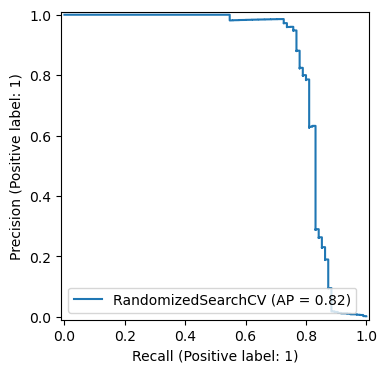

In [87]:
PrecisionRecallDisplay.from_estimator(xgb_rs_model, X_test, y_test);

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [88]:
# Model Evaluation: xgb_rs_model

from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, xgb_rs_model)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

deepchecks - WARNING - Could not find built-in feature importance on the model, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 6 seconds


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_CQLTHKD6N9LRTZGES946593IC">Model Evaluation S…

***vi. Calibrate your model predictions***
- https://webcache.googleusercontent.com/search?q=cache:https://ai.plainenglish.io/model-calibration-secret-sauce-of-super-accurate-models-b401d98d37e0&sca_esv=600219767&strip=1&vwsrc=0
- https://towardsdatascience.com/a-comprehensive-guide-on-model-calibration-part-1-of-4-73466eb5e09a

### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm.

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map.

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [89]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Input

***ii. Define Model***

In [90]:
batch_size = 64
trial_metric = "precision"

In [91]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [92]:
from tensorflow.keras.callbacks import EarlyStopping

In [93]:
# # Further split the training set into training and validation sets

# X_train, X_val, y_train, y_val = train_test_split(
#     X_train, y_train, stratify=y_train, test_size=0.10, random_state=seed
# )

In [94]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [95]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [96]:
def objective(trial):
    # Define hyperparameters to optimize
    n_layers = trial.suggest_int('n_layers', 1, 3)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])
    optimizer_name = trial.suggest_categorical('optimizer', ['adam', 'rmsprop'])
    
    # Define model architecture
    model = Sequential()
    model.add(Dense(trial.suggest_int('n_units_first', 32, 256), input_shape=(X_train.shape[1],), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    
    for i in range(n_layers - 1):
        model.add(Dense(trial.suggest_int(f'n_units_layer_{i}', 16, 128), activation='relu'))
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(1, activation='sigmoid'))

     # Compile model
    if optimizer_name == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    else:
        optimizer = RMSprop(learning_rate=learning_rate)
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['Precision'])
    
    # Train model
    model.fit(
        X_train, y_train,
        batch_size=batch_size,
        epochs=20,
        validation_data=(X_val, y_val),
        verbose=0,
        class_weight={0: 1, 1: 10}  # Higher weight for fraud class
    )
    
    # Evaluate on validation set
    y_pred = (model.predict(X_val) > 0.5).astype(int)
    precision = precision_score(y_val, y_pred)
    
    return precision  # Optuna maximizes this value

***iii. Run the Optuna Optimization***

In [97]:
# Define study
study = optuna.create_study(direction='maximize')  # We want to maximize precision
study.optimize(objective, n_trials=50)  # Run 50 trials

# Best hyperparameters
print("Best trial:")
trial = study.best_trial
print(f"Precision: {trial.value}")
print("Best hyperparameters:")
for key, value in trial.params.items():
    print(f"{key}: {value}")

[I 2025-04-17 13:52:29,999] A new study created in memory with name: no-name-a4fb528f-e120-409b-bb7d-e4f93734ee73


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 189us/step


[I 2025-04-17 13:53:15,423] Trial 0 finished with value: 0.0 and parameters: {'n_layers': 1, 'dropout_rate': 0.16011447652709698, 'learning_rate': 0.0023755443547323757, 'batch_size': 32, 'optimizer': 'adam', 'n_units_first': 105}. Best is trial 0 with value: 0.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 189us/step


[I 2025-04-17 13:54:02,935] Trial 1 finished with value: 0.0 and parameters: {'n_layers': 1, 'dropout_rate': 0.30926652574708235, 'learning_rate': 0.00043593570873337286, 'batch_size': 32, 'optimizer': 'adam', 'n_units_first': 154}. Best is trial 0 with value: 0.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step


[I 2025-04-17 13:54:34,929] Trial 2 finished with value: 0.0 and parameters: {'n_layers': 3, 'dropout_rate': 0.21485634699874978, 'learning_rate': 0.0009555454108195399, 'batch_size': 64, 'optimizer': 'adam', 'n_units_first': 44, 'n_units_layer_0': 99, 'n_units_layer_1': 76}. Best is trial 0 with value: 0.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 190us/step


[I 2025-04-17 13:54:59,369] Trial 3 finished with value: 0.0 and parameters: {'n_layers': 1, 'dropout_rate': 0.1118498498767882, 'learning_rate': 2.0276264965887156e-05, 'batch_size': 64, 'optimizer': 'rmsprop', 'n_units_first': 120}. Best is trial 0 with value: 0.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step


[I 2025-04-17 13:55:27,554] Trial 4 finished with value: 0.0 and parameters: {'n_layers': 2, 'dropout_rate': 0.3048444999998979, 'learning_rate': 0.0004084758009430895, 'batch_size': 64, 'optimizer': 'adam', 'n_units_first': 78, 'n_units_layer_0': 70}. Best is trial 0 with value: 0.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step


[I 2025-04-17 13:55:53,394] Trial 5 finished with value: 0.0 and parameters: {'n_layers': 1, 'dropout_rate': 0.2729092098257103, 'learning_rate': 0.00026251700002198733, 'batch_size': 64, 'optimizer': 'rmsprop', 'n_units_first': 175}. Best is trial 0 with value: 0.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step


[I 2025-04-17 13:56:20,854] Trial 6 finished with value: 0.0 and parameters: {'n_layers': 3, 'dropout_rate': 0.13921288322809386, 'learning_rate': 0.008296025512558113, 'batch_size': 64, 'optimizer': 'rmsprop', 'n_units_first': 77, 'n_units_layer_0': 17, 'n_units_layer_1': 84}. Best is trial 0 with value: 0.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 189us/step


[I 2025-04-17 13:57:07,166] Trial 7 finished with value: 0.0 and parameters: {'n_layers': 1, 'dropout_rate': 0.1783007005691547, 'learning_rate': 0.0003686127467742015, 'batch_size': 32, 'optimizer': 'rmsprop', 'n_units_first': 167}. Best is trial 0 with value: 0.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step


[I 2025-04-17 13:58:07,025] Trial 8 finished with value: 1.0 and parameters: {'n_layers': 2, 'dropout_rate': 0.11833309231600674, 'learning_rate': 6.136513889427666e-05, 'batch_size': 32, 'optimizer': 'adam', 'n_units_first': 252, 'n_units_layer_0': 66}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step


[I 2025-04-17 13:58:32,125] Trial 9 finished with value: 0.0 and parameters: {'n_layers': 1, 'dropout_rate': 0.35952477091195517, 'learning_rate': 0.0007209752578281968, 'batch_size': 64, 'optimizer': 'adam', 'n_units_first': 93}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step


[I 2025-04-17 13:58:56,241] Trial 10 finished with value: 0.0 and parameters: {'n_layers': 2, 'dropout_rate': 0.49822201099380375, 'learning_rate': 2.9549744104581884e-05, 'batch_size': 128, 'optimizer': 'adam', 'n_units_first': 250, 'n_units_layer_0': 57}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step


[I 2025-04-17 14:00:01,420] Trial 11 finished with value: 0.0 and parameters: {'n_layers': 2, 'dropout_rate': 0.10546320127567659, 'learning_rate': 9.315891462128246e-05, 'batch_size': 32, 'optimizer': 'adam', 'n_units_first': 245, 'n_units_layer_0': 116}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 203us/step


[I 2025-04-17 14:00:56,608] Trial 12 finished with value: 0.0 and parameters: {'n_layers': 2, 'dropout_rate': 0.21206120913032567, 'learning_rate': 0.002924050275368428, 'batch_size': 32, 'optimizer': 'adam', 'n_units_first': 215, 'n_units_layer_0': 40}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step


[I 2025-04-17 14:02:01,279] Trial 13 finished with value: 0.5 and parameters: {'n_layers': 3, 'dropout_rate': 0.1727796656944461, 'learning_rate': 7.463279429712228e-05, 'batch_size': 32, 'optimizer': 'adam', 'n_units_first': 200, 'n_units_layer_0': 85, 'n_units_layer_1': 19}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step


[I 2025-04-17 14:02:28,831] Trial 14 finished with value: 1.0 and parameters: {'n_layers': 3, 'dropout_rate': 0.23498541697520253, 'learning_rate': 7.245903978787691e-05, 'batch_size': 128, 'optimizer': 'adam', 'n_units_first': 203, 'n_units_layer_0': 90, 'n_units_layer_1': 16}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step


[I 2025-04-17 14:02:55,980] Trial 15 finished with value: 0.0 and parameters: {'n_layers': 3, 'dropout_rate': 0.3819023426656376, 'learning_rate': 1.0275892507455112e-05, 'batch_size': 128, 'optimizer': 'adam', 'n_units_first': 214, 'n_units_layer_0': 89, 'n_units_layer_1': 17}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step


[I 2025-04-17 14:03:22,455] Trial 16 finished with value: 1.0 and parameters: {'n_layers': 2, 'dropout_rate': 0.24846340426273814, 'learning_rate': 9.998229119381856e-05, 'batch_size': 128, 'optimizer': 'adam', 'n_units_first': 233, 'n_units_layer_0': 128}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 217us/step


[I 2025-04-17 14:03:49,554] Trial 17 finished with value: 1.0 and parameters: {'n_layers': 3, 'dropout_rate': 0.4091091542165795, 'learning_rate': 4.1898464616596496e-05, 'batch_size': 128, 'optimizer': 'adam', 'n_units_first': 193, 'n_units_layer_0': 68, 'n_units_layer_1': 128}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step


[I 2025-04-17 14:04:11,772] Trial 18 finished with value: 0.0 and parameters: {'n_layers': 2, 'dropout_rate': 0.23370999028435524, 'learning_rate': 0.00017271882912018224, 'batch_size': 128, 'optimizer': 'rmsprop', 'n_units_first': 226, 'n_units_layer_0': 48}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step


[I 2025-04-17 14:04:40,094] Trial 19 finished with value: 0.0 and parameters: {'n_layers': 3, 'dropout_rate': 0.4520846667484927, 'learning_rate': 1.1963271265268595e-05, 'batch_size': 128, 'optimizer': 'adam', 'n_units_first': 253, 'n_units_layer_0': 103, 'n_units_layer_1': 45}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step


[I 2025-04-17 14:04:58,641] Trial 20 finished with value: 0.875 and parameters: {'n_layers': 2, 'dropout_rate': 0.34155570271865976, 'learning_rate': 6.289643976114086e-05, 'batch_size': 128, 'optimizer': 'adam', 'n_units_first': 131, 'n_units_layer_0': 31}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step


[I 2025-04-17 14:05:26,113] Trial 21 finished with value: 1.0 and parameters: {'n_layers': 2, 'dropout_rate': 0.2621870793759466, 'learning_rate': 0.00014648792540984597, 'batch_size': 128, 'optimizer': 'adam', 'n_units_first': 234, 'n_units_layer_0': 119}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step


[I 2025-04-17 14:05:54,463] Trial 22 finished with value: 0.0 and parameters: {'n_layers': 2, 'dropout_rate': 0.25991984564858817, 'learning_rate': 0.00014121333405304903, 'batch_size': 128, 'optimizer': 'adam', 'n_units_first': 194, 'n_units_layer_0': 126}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step


[I 2025-04-17 14:06:21,083] Trial 23 finished with value: 0.9166666666666666 and parameters: {'n_layers': 2, 'dropout_rate': 0.1967085705526465, 'learning_rate': 3.864459095343636e-05, 'batch_size': 128, 'optimizer': 'adam', 'n_units_first': 222, 'n_units_layer_0': 80}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step


[I 2025-04-17 14:06:52,242] Trial 24 finished with value: 1.0 and parameters: {'n_layers': 3, 'dropout_rate': 0.23954110833944853, 'learning_rate': 2.3644237476075103e-05, 'batch_size': 128, 'optimizer': 'adam', 'n_units_first': 237, 'n_units_layer_0': 102, 'n_units_layer_1': 50}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 212us/step


[I 2025-04-17 14:07:52,899] Trial 25 finished with value: 0.0 and parameters: {'n_layers': 2, 'dropout_rate': 0.1426886059479373, 'learning_rate': 7.064356612985347e-05, 'batch_size': 32, 'optimizer': 'adam', 'n_units_first': 180, 'n_units_layer_0': 62}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 217us/step


[I 2025-04-17 14:08:18,236] Trial 26 finished with value: 0.0 and parameters: {'n_layers': 2, 'dropout_rate': 0.2853878760988319, 'learning_rate': 0.00011360015775481337, 'batch_size': 128, 'optimizer': 'rmsprop', 'n_units_first': 209, 'n_units_layer_0': 111}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step


[I 2025-04-17 14:09:25,096] Trial 27 finished with value: 0.0 and parameters: {'n_layers': 2, 'dropout_rate': 0.32949258070024895, 'learning_rate': 0.0002324915937004452, 'batch_size': 32, 'optimizer': 'adam', 'n_units_first': 256, 'n_units_layer_0': 78}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step


[I 2025-04-17 14:09:57,768] Trial 28 finished with value: 0.8333333333333334 and parameters: {'n_layers': 3, 'dropout_rate': 0.2360250321691485, 'learning_rate': 5.8165027064919536e-05, 'batch_size': 128, 'optimizer': 'adam', 'n_units_first': 233, 'n_units_layer_0': 128, 'n_units_layer_1': 101}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step


[I 2025-04-17 14:10:56,600] Trial 29 finished with value: 0.8461538461538461 and parameters: {'n_layers': 2, 'dropout_rate': 0.151486744468237, 'learning_rate': 1.7223524543100196e-05, 'batch_size': 32, 'optimizer': 'adam', 'n_units_first': 152, 'n_units_layer_0': 93}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 216us/step


[I 2025-04-17 14:11:21,841] Trial 30 finished with value: 0.8666666666666667 and parameters: {'n_layers': 3, 'dropout_rate': 0.18841896935410973, 'learning_rate': 4.706050719520044e-05, 'batch_size': 128, 'optimizer': 'adam', 'n_units_first': 183, 'n_units_layer_0': 54, 'n_units_layer_1': 43}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step


[I 2025-04-17 14:11:50,827] Trial 31 finished with value: 1.0 and parameters: {'n_layers': 3, 'dropout_rate': 0.41913708948229067, 'learning_rate': 3.841125601439306e-05, 'batch_size': 128, 'optimizer': 'adam', 'n_units_first': 195, 'n_units_layer_0': 70, 'n_units_layer_1': 128}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step


[I 2025-04-17 14:12:20,887] Trial 32 finished with value: 0.9 and parameters: {'n_layers': 3, 'dropout_rate': 0.4186363218146867, 'learning_rate': 3.2256777666595e-05, 'batch_size': 128, 'optimizer': 'adam', 'n_units_first': 202, 'n_units_layer_0': 75, 'n_units_layer_1': 125}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step


[I 2025-04-17 14:12:46,656] Trial 33 finished with value: 1.0 and parameters: {'n_layers': 3, 'dropout_rate': 0.38011047649775775, 'learning_rate': 0.00010854658157655684, 'batch_size': 128, 'optimizer': 'adam', 'n_units_first': 164, 'n_units_layer_0': 64, 'n_units_layer_1': 106}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step


[I 2025-04-17 14:13:51,203] Trial 34 finished with value: 0.0 and parameters: {'n_layers': 3, 'dropout_rate': 0.32309685494028406, 'learning_rate': 0.0002110890462654176, 'batch_size': 32, 'optimizer': 'adam', 'n_units_first': 225, 'n_units_layer_0': 65, 'n_units_layer_1': 58}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 218us/step


[I 2025-04-17 14:14:10,240] Trial 35 finished with value: 0.8 and parameters: {'n_layers': 2, 'dropout_rate': 0.12871176992535266, 'learning_rate': 5.129536455760855e-05, 'batch_size': 128, 'optimizer': 'adam', 'n_units_first': 138, 'n_units_layer_0': 45}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step


[I 2025-04-17 14:14:28,774] Trial 36 finished with value: 0.2222222222222222 and parameters: {'n_layers': 1, 'dropout_rate': 0.2872308100090008, 'learning_rate': 9.070789376864491e-05, 'batch_size': 128, 'optimizer': 'adam', 'n_units_first': 185}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step


[I 2025-04-17 14:15:01,732] Trial 37 finished with value: 0.0 and parameters: {'n_layers': 3, 'dropout_rate': 0.21188579579618547, 'learning_rate': 1.6905473263439304e-05, 'batch_size': 64, 'optimizer': 'rmsprop', 'n_units_first': 45, 'n_units_layer_0': 93, 'n_units_layer_1': 102}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 194us/step


[I 2025-04-17 14:15:52,165] Trial 38 finished with value: 0.0 and parameters: {'n_layers': 1, 'dropout_rate': 0.306192018279339, 'learning_rate': 0.0010106135394994922, 'batch_size': 32, 'optimizer': 'adam', 'n_units_first': 238}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step


[I 2025-04-17 14:16:29,429] Trial 39 finished with value: 0.0 and parameters: {'n_layers': 2, 'dropout_rate': 0.49062403044923036, 'learning_rate': 2.5390989327613185e-05, 'batch_size': 64, 'optimizer': 'rmsprop', 'n_units_first': 209, 'n_units_layer_0': 109}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 202us/step


[I 2025-04-17 14:16:49,083] Trial 40 finished with value: 0.0 and parameters: {'n_layers': 2, 'dropout_rate': 0.16841203955119743, 'learning_rate': 0.0005372541146659174, 'batch_size': 128, 'optimizer': 'adam', 'n_units_first': 111, 'n_units_layer_0': 83}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step


[I 2025-04-17 14:17:16,120] Trial 41 finished with value: 1.0 and parameters: {'n_layers': 2, 'dropout_rate': 0.25794171496594026, 'learning_rate': 0.0001505866936908611, 'batch_size': 128, 'optimizer': 'adam', 'n_units_first': 241, 'n_units_layer_0': 122}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 218us/step


[I 2025-04-17 14:17:42,375] Trial 42 finished with value: 0.0 and parameters: {'n_layers': 2, 'dropout_rate': 0.27031925370590476, 'learning_rate': 0.000315219981622093, 'batch_size': 128, 'optimizer': 'adam', 'n_units_first': 229, 'n_units_layer_0': 116}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step


[I 2025-04-17 14:18:08,609] Trial 43 finished with value: 0.0 and parameters: {'n_layers': 2, 'dropout_rate': 0.25162414066826333, 'learning_rate': 0.00012777615849352252, 'batch_size': 128, 'optimizer': 'adam', 'n_units_first': 219, 'n_units_layer_0': 120}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 212us/step


[I 2025-04-17 14:18:33,471] Trial 44 finished with value: 0.8 and parameters: {'n_layers': 2, 'dropout_rate': 0.2193695299951156, 'learning_rate': 7.547218231271188e-05, 'batch_size': 128, 'optimizer': 'adam', 'n_units_first': 245, 'n_units_layer_0': 73}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 217us/step


[I 2025-04-17 14:19:37,498] Trial 45 finished with value: 0.0 and parameters: {'n_layers': 2, 'dropout_rate': 0.28998172510823167, 'learning_rate': 0.00019745706166815065, 'batch_size': 32, 'optimizer': 'adam', 'n_units_first': 206, 'n_units_layer_0': 110}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 196us/step


[I 2025-04-17 14:20:04,183] Trial 46 finished with value: 0.6153846153846154 and parameters: {'n_layers': 1, 'dropout_rate': 0.11891692399169887, 'learning_rate': 4.410261529762623e-05, 'batch_size': 64, 'optimizer': 'rmsprop', 'n_units_first': 164}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step


[I 2025-04-17 14:20:32,012] Trial 47 finished with value: 1.0 and parameters: {'n_layers': 3, 'dropout_rate': 0.19421480796180096, 'learning_rate': 8.741354199956486e-05, 'batch_size': 128, 'optimizer': 'adam', 'n_units_first': 256, 'n_units_layer_0': 97, 'n_units_layer_1': 32}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step


[I 2025-04-17 14:21:30,870] Trial 48 finished with value: 0.0 and parameters: {'n_layers': 2, 'dropout_rate': 0.3595070282631124, 'learning_rate': 0.0026273469318202868, 'batch_size': 32, 'optimizer': 'adam', 'n_units_first': 230, 'n_units_layer_0': 58}. Best is trial 8 with value: 1.0.


710/710 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step


[I 2025-04-17 14:21:59,076] Trial 49 finished with value: 0.0 and parameters: {'n_layers': 3, 'dropout_rate': 0.3199911576829506, 'learning_rate': 0.00028104904247629295, 'batch_size': 128, 'optimizer': 'adam', 'n_units_first': 194, 'n_units_layer_0': 117, 'n_units_layer_1': 62}. Best is trial 8 with value: 1.0.


Best trial:
Precision: 1.0
Best hyperparameters:
n_layers: 2
dropout_rate: 0.11833309231600674
learning_rate: 6.136513889427666e-05
batch_size: 32
optimizer: adam
n_units_first: 252
n_units_layer_0: 66


***iv. Fit Model***

In [98]:
best_params = study.best_params

ann_model = Sequential()
ann_model.add(Dense(best_params['n_units_first'], input_shape=(X_train.shape[1],), activation='relu'))
ann_model.add(BatchNormalization())
ann_model.add(Dropout(best_params['dropout_rate']))

for i in range(best_params['n_layers'] - 1):
    ann_model.add(Dense(best_params[f'n_units_layer_{i}'], activation='relu'))
    ann_model.add(Dropout(best_params['dropout_rate']))

ann_model.add(Dense(1, activation='sigmoid'))

# Compile with best optimizer
if best_params['optimizer'] == 'adam':
    optimizer = Adam(learning_rate=best_params['learning_rate'])
else:
    optimizer = RMSprop(learning_rate=best_params['learning_rate'])

ann_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['Precision'])

# Train final ann_model
history = ann_model.fit(
    X_train, y_train,
    batch_size=best_params['batch_size'],
    epochs=50,
    validation_data=(X_val, y_val),
    class_weight={0: 1, 1: 10}  # Adjust based on imbalance
)

Epoch 1/50
6384/6384 ━━━━━━━━━━━━━━━━━━━━ 4s 509us/step - Precision: 0.0000e+00 - loss: 0.1346 - val_Precision: 0.0000e+00 - val_loss: 0.0189
Epoch 2/50
6384/6384 ━━━━━━━━━━━━━━━━━━━━ 3s 482us/step - Precision: 0.0000e+00 - loss: 0.0861 - val_Precision: 0.0000e+00 - val_loss: 0.0219
Epoch 3/50
6384/6384 ━━━━━━━━━━━━━━━━━━━━ 3s 525us/step - Precision: 0.0000e+00 - loss: 0.0901 - val_Precision: 0.0000e+00 - val_loss: 0.0209
Epoch 4/50
6384/6384 ━━━━━━━━━━━━━━━━━━━━ 3s 483us/step - Precision: 0.3523 - loss: 0.0907 - val_Precision: 0.8000 - val_loss: 0.0190
Epoch 5/50
6384/6384 ━━━━━━━━━━━━━━━━━━━━ 3s 484us/step - Precision: 0.3574 - loss: 0.0755 - val_Precision: 0.8333 - val_loss: 0.0213
Epoch 6/50
6384/6384 ━━━━━━━━━━━━━━━━━━━━ 3s 481us/step - Precision: 0.5792 - loss: 0.0754 - val_Precision: 1.0000 - val_loss: 0.0180
Epoch 7/50
6384/6384 ━━━━━━━━━━━━━━━━━━━━ 3s 477us/step - Precision: 0.5099 - loss: 0.0719 - val_Precision: 1.0000 - val_loss: 0.0161
Epoch 8/50
6384/6384 ━━━━━━━━━━━━━━━━━

In [99]:
y_pred_proba = ann_model.predict(X_test)
threshold = 0.8  # Adjust based on precision-recall tradeoff
y_pred = (y_pred_proba > threshold).astype(int)
precision = precision_score(y_test, y_pred)
print(f"Final Precision: {precision}")

1774/1774 ━━━━━━━━━━━━━━━━━━━━ 0s 192us/step
Final Precision: 0.6363636363636364


***v. Prediction and Model Evaluating***

In [100]:
# y_pred = (ann_model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56643     8]
 [   81    14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.64      0.15      0.24        95

    accuracy                           1.00     56746
   macro avg       0.82      0.57      0.62     56746
weighted avg       1.00      1.00      1.00     56746



***vi. Plot Precision and Recall Curve***

1774/1774 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step


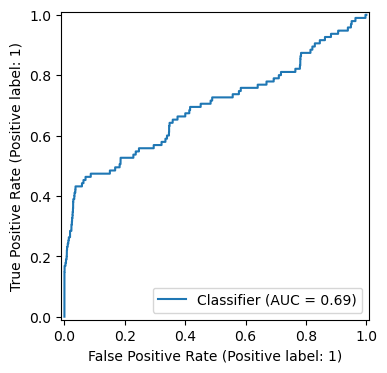

In [101]:
y_pred_proba = ann_model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [102]:
# Model Evaluation: ANN

from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, ann_model)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

7094/7094 ━━━━━━━━━━━━━━━━━━━━ 1s 185us/step
1774/1774 ━━━━━━━━━━━━━━━━━━━━ 0s 189us/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 1s 183us/step
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 1s 187us/step
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 1s 183us/step
1774/1774 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
1774/1774 ━━━━━━━━━━━━━━━━━━━━ 0s 191us/step
1774/1774 ━━━━━━━━━━━━━━━━━━━━ 0s 197us/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1s 185us/step
1774/1774 ━━━━━━━━━━━━━━━━━━━━ 0s 199us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1774/1774 ━━━━━━━━━━━━━━━━━━━━ 0s 218us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 212us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 1s 186us/step
1774/1774 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


deepchecks - WARNING - Could not find built-in feature importance on the model, using permutation feature importance calculation instead


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 198us/step


deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 93 seconds


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 201us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
313/313 ━━━━━

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_R65J0Z3IK4ENKD1W50KX73JH8">Model Evaluation S…

## 5. Model Deployement
- Finalize your model with whole dataset and prepare for the deployment.

### Save and Export the Best Model


In [103]:
import pickle

In [104]:
# pickle.dump(_model, open('_model.pkl', 'wb'))

### Save and Export Variables

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___